# Esercizio 11

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [3]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [4]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

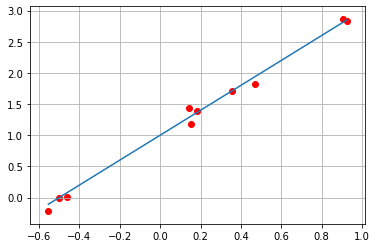

In [5]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [6]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [7]:
# get a summary of our composed model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [8]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
4/4 [==============================] - 0s 40ms/step - loss: 1.4230 - mse: 1.4230 - val_loss: 1.6357 - val_mse: 1.6357
Epoch 2/30
4/4 [==============================] - 0s 5ms/step - loss: 1.2455 - mse: 1.2455 - val_loss: 1.4803 - val_mse: 1.4803
Epoch 3/30
4/4 [==============================] - 0s 7ms/step - loss: 1.1287 - mse: 1.1287 - val_loss: 1.3128 - val_mse: 1.3128
Epoch 4/30
4/4 [==============================] - 0s 6ms/step - loss: 1.0048 - mse: 1.0048 - val_loss: 1.1766 - val_mse: 1.1766
Epoch 5/30
4/4 [==============================] - 0s 6ms/step - loss: 0.9051 - mse: 0.9051 - val_loss: 1.0703 - val_mse: 1.0703
Epoch 6/30
4/4 [==============================] - 0s 7ms/step - loss: 0.8271 - mse: 0.8271 - val_loss: 0.9812 - val_mse: 0.9812
Epoch 7/30
4/4 [==============================] - 0s 6ms/step - loss: 0.7622 - mse: 0.7622 - val_loss: 0.9009 - val_mse: 0.9009
Epoch 8/30
4/4 [==============================] - 0s 7ms/step - loss: 0.7025 - mse: 0.7025 - val_loss: 

In [9]:
# return weights
model.get_weights()

[array([[1.4116786]], dtype=float32), array([0.880053], dtype=float32)]

In [10]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 895us/step - loss: 0.1479 - mse: 0.1479

Test loss: 0.1479351669549942
Test accuracy: 0.1479351669549942


In [11]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 959us/step - loss: 0.1366 - mse: 0.1366

Test loss: 0.13662710785865784
Test accuracy: 0.13662710785865784


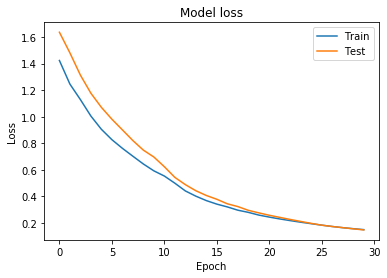

In [12]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

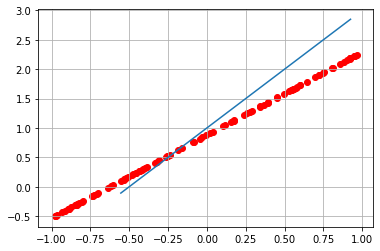

In [13]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

<span style="color:blue">

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.
</span>

Il primo parametro che viene fatto variare è il numero di dati totali. Il rapporto tra dataset di train e dei validation è mantenuto pari a 10:1

In [12]:
np.random.seed(0)
loss = np.zeros(20)
size = np.zeros(20)

for i in range(20):
    x_train = np.random.uniform(-1, 1, i*50 + 50)
    x_valid = np.random.uniform(-1, 1, i*10 + 10)
    x_valid.sort()

    sigma = 0.2
    y_train = np.random.normal(m * x_train + b, sigma) 
    y_valid = np.random.normal(m * x_valid + b, sigma)


    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))


    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])



    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))



    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
    
    loss[i] = score[0]
    size[i] = i*50 + 50

Epoch 1/30
2/2 [==============================] - 0s 50ms/step - loss: 1.5986 - mse: 1.5986 - val_loss: 1.2264 - val_mse: 1.2264
Epoch 2/30
2/2 [==============================] - 0s 11ms/step - loss: 1.4922 - mse: 1.4922 - val_loss: 1.1546 - val_mse: 1.1546
Epoch 3/30
2/2 [==============================] - 0s 11ms/step - loss: 1.3948 - mse: 1.3948 - val_loss: 1.0863 - val_mse: 1.0863
Epoch 4/30
2/2 [==============================] - 0s 10ms/step - loss: 1.3031 - mse: 1.3031 - val_loss: 1.0240 - val_mse: 1.0240
Epoch 5/30
2/2 [==============================] - 0s 13ms/step - loss: 1.2186 - mse: 1.2186 - val_loss: 0.9670 - val_mse: 0.9670
Epoch 6/30
2/2 [==============================] - 0s 12ms/step - loss: 1.1425 - mse: 1.1425 - val_loss: 0.9167 - val_mse: 0.9167
Epoch 7/30
2/2 [==============================] - 0s 11ms/step - loss: 1.0727 - mse: 1.0727 - val_loss: 0.8686 - val_mse: 0.8686
Epoch 8/30
2/2 [==============================] - 0s 13ms/step - loss: 1.0072 - mse: 1.0072 - val

8/8 [==============================] - 0s 4ms/step - loss: 0.9764 - mse: 0.9764 - val_loss: 0.7255 - val_mse: 0.7255
Epoch 6/30
8/8 [==============================] - 0s 4ms/step - loss: 0.8184 - mse: 0.8184 - val_loss: 0.6111 - val_mse: 0.6111
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6935 - mse: 0.6935 - val_loss: 0.5211 - val_mse: 0.5211
Epoch 8/30
8/8 [==============================] - 0s 5ms/step - loss: 0.5940 - mse: 0.5940 - val_loss: 0.4487 - val_mse: 0.4487
Epoch 9/30
8/8 [==============================] - 0s 4ms/step - loss: 0.5137 - mse: 0.5137 - val_loss: 0.3906 - val_mse: 0.3906
Epoch 10/30
8/8 [==============================] - 0s 4ms/step - loss: 0.4476 - mse: 0.4476 - val_loss: 0.3420 - val_mse: 0.3420
Epoch 11/30
8/8 [==============================] - 0s 4ms/step - loss: 0.3924 - mse: 0.3924 - val_loss: 0.3015 - val_mse: 0.3015
Epoch 12/30
8/8 [==============================] - 0s 3ms/step - loss: 0.3463 - mse: 0.3463 - val_loss: 0.2674 - 

Epoch 7/30
11/11 [==============================] - 0s 4ms/step - loss: 1.6698 - mse: 1.6698 - val_loss: 2.0601 - val_mse: 2.0601
Epoch 8/30
11/11 [==============================] - 0s 3ms/step - loss: 1.4351 - mse: 1.4351 - val_loss: 1.7669 - val_mse: 1.7669
Epoch 9/30
11/11 [==============================] - 0s 3ms/step - loss: 1.2374 - mse: 1.2374 - val_loss: 1.5185 - val_mse: 1.5185
Epoch 10/30
11/11 [==============================] - 0s 4ms/step - loss: 1.0693 - mse: 1.0693 - val_loss: 1.3075 - val_mse: 1.3075
Epoch 11/30
11/11 [==============================] - 0s 4ms/step - loss: 0.9258 - mse: 0.9258 - val_loss: 1.1265 - val_mse: 1.1265
Epoch 12/30
11/11 [==============================] - 0s 3ms/step - loss: 0.8022 - mse: 0.8022 - val_loss: 0.9722 - val_mse: 0.9722
Epoch 13/30
11/11 [==============================] - 0s 4ms/step - loss: 0.6964 - mse: 0.6964 - val_loss: 0.8402 - val_mse: 0.8402
Epoch 14/30
11/11 [==============================] - 0s 3ms/step - loss: 0.6057 - mse:

18/18 [==============================] - 0s 2ms/step - loss: 0.2509 - mse: 0.2509 - val_loss: 0.1820 - val_mse: 0.1820
Epoch 10/30
18/18 [==============================] - 0s 2ms/step - loss: 0.2026 - mse: 0.2026 - val_loss: 0.1482 - val_mse: 0.1482
Epoch 11/30
18/18 [==============================] - 0s 2ms/step - loss: 0.1658 - mse: 0.1658 - val_loss: 0.1227 - val_mse: 0.1227
Epoch 12/30
18/18 [==============================] - 0s 2ms/step - loss: 0.1380 - mse: 0.1380 - val_loss: 0.1034 - val_mse: 0.1034
Epoch 13/30
18/18 [==============================] - 0s 2ms/step - loss: 0.1168 - mse: 0.1168 - val_loss: 0.0878 - val_mse: 0.0878
Epoch 14/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0997 - mse: 0.0997 - val_loss: 0.0759 - val_mse: 0.0759
Epoch 15/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0866 - mse: 0.0866 - val_loss: 0.0668 - val_mse: 0.0668
Epoch 16/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0766 - mse: 0.0766 -

24/24 [==============================] - 0s 2ms/step - loss: 0.0806 - mse: 0.0806 - val_loss: 0.0723 - val_mse: 0.0723
Epoch 12/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0696 - mse: 0.0696 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 13/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0616 - mse: 0.0616 - val_loss: 0.0541 - val_mse: 0.0541
Epoch 14/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0486 - val_mse: 0.0486
Epoch 15/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0515 - mse: 0.0515 - val_loss: 0.0449 - val_mse: 0.0449
Epoch 16/30
24/24 [==============================] - 0s 1ms/step - loss: 0.0484 - mse: 0.0484 - val_loss: 0.0421 - val_mse: 0.0421
Epoch 17/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0461 - mse: 0.0461 - val_loss: 0.0402 - val_mse: 0.0402
Epoch 18/30
24/24 [==============================] - 0s 1ms/step - loss: 0.0444 - mse: 0.0444 -

30/30 [==============================] - 0s 1ms/step - loss: 0.0517 - mse: 0.0517 - val_loss: 0.0527 - val_mse: 0.0527
Epoch 14/30
30/30 [==============================] - 0s 1ms/step - loss: 0.0480 - mse: 0.0480 - val_loss: 0.0495 - val_mse: 0.0495
Epoch 15/30
30/30 [==============================] - 0s 1ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0472 - val_mse: 0.0472
Epoch 16/30
30/30 [==============================] - 0s 1ms/step - loss: 0.0439 - mse: 0.0439 - val_loss: 0.0458 - val_mse: 0.0458
Epoch 17/30
30/30 [==============================] - 0s 1ms/step - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0447 - val_mse: 0.0447
Epoch 18/30
30/30 [==============================] - 0s 1ms/step - loss: 0.0421 - mse: 0.0421 - val_loss: 0.0440 - val_mse: 0.0440
Epoch 19/30
30/30 [==============================] - 0s 1ms/step - loss: 0.0417 - mse: 0.0417 - val_loss: 0.0434 - val_mse: 0.0434
Epoch 20/30
30/30 [==============================] - 0s 1ms/step - loss: 0.0414 - mse: 0.0414 -

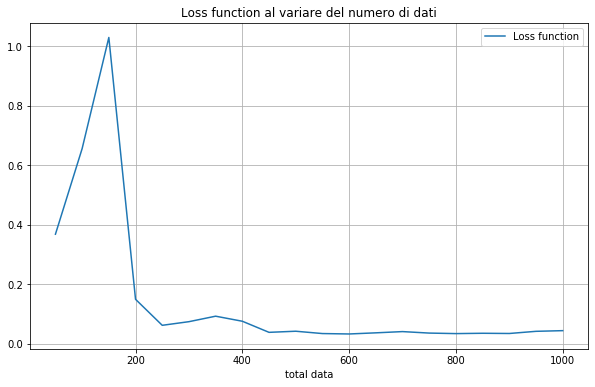

Loss Function con  500.0  dati:  0.042468875646591187


In [13]:
plt.figure(figsize=(10,6))

plt.plot(size,loss, label='Loss function')
plt.title('Loss function al variare del numero di dati')
plt.xlabel('total data')
plt.legend()
plt.grid(True)

plt.show()
print('Loss Function con ',size[9],' dati: ',loss[9])

Dal grafico si nota come dopo circa 500 punti la loss function rggiunga un valore costante minimo di circa 0.03. Viene quindi fissato a 500 il numero di dati totali

Il secondo parametro che viene fatto variare è la dispersione dei dati $\sigma$

In [14]:
np.random.seed(0)
sigma = np.linspace(0.02,0.5,25)
loss = np.zeros(25)
index = 0

for i in sigma:
    x_train = np.random.uniform(-1, 1, 500)
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()

    y_train = np.random.normal(m * x_train + b, i) 
    y_valid = np.random.normal(m * x_valid + b, i)

    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))

    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
    
    loss[index] = score[0]
    index += 1

Epoch 1/30
16/16 [==============================] - 0s 7ms/step - loss: 2.1346 - mse: 2.1346 - val_loss: 1.5548 - val_mse: 1.5548
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 1.5095 - mse: 1.5095 - val_loss: 1.1294 - val_mse: 1.1294
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 1.1098 - mse: 1.1098 - val_loss: 0.8479 - val_mse: 0.8479
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.8383 - mse: 0.8383 - val_loss: 0.6516 - val_mse: 0.6516
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6460 - mse: 0.6460 - val_loss: 0.5075 - val_mse: 0.5075
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.5039 - mse: 0.5039 - val_loss: 0.4007 - val_mse: 0.4007
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.3971 - mse: 0.3971 - val_loss: 0.3185 - val_mse: 0.3185
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.3150 - mse: 0.31

16/16 [==============================] - 0s 3ms/step - loss: 0.7752 - mse: 0.7752 - val_loss: 0.7723 - val_mse: 0.7723
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.5866 - val_mse: 0.5866
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.4394 - mse: 0.4394 - val_loss: 0.4575 - val_mse: 0.4575
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.3436 - mse: 0.3436 - val_loss: 0.3631 - val_mse: 0.3631
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.2719 - mse: 0.2719 - val_loss: 0.2922 - val_mse: 0.2922
Epoch 8/30
16/16 [==============================] - 0s 3ms/step - loss: 0.2181 - mse: 0.2181 - val_loss: 0.2379 - val_mse: 0.2379
Epoch 9/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1766 - mse: 0.1766 - val_loss: 0.1953 - val_mse: 0.1953
Epoch 10/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1436 - mse: 0.1436 - val_l

16/16 [==============================] - 0s 2ms/step - loss: 1.8929 - mse: 1.8929 - val_loss: 1.9641 - val_mse: 1.9641
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 1.5275 - mse: 1.5275 - val_loss: 1.5723 - val_mse: 1.5723
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 1.2394 - mse: 1.2394 - val_loss: 1.2622 - val_mse: 1.2622
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 1.0077 - mse: 1.0077 - val_loss: 1.0154 - val_mse: 1.0154
Epoch 9/30
16/16 [==============================] - 0s 2ms/step - loss: 0.8216 - mse: 0.8216 - val_loss: 0.8181 - val_mse: 0.8181
Epoch 10/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6712 - mse: 0.6712 - val_loss: 0.6606 - val_mse: 0.6606
Epoch 11/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5491 - mse: 0.5491 - val_loss: 0.5345 - val_mse: 0.5345
Epoch 12/30
16/16 [==============================] - 0s 2ms/step - loss: 0.4509 - mse: 0.4509 - val

16/16 [==============================] - 0s 2ms/step - loss: 0.0868 - mse: 0.0868 - val_loss: 0.0963 - val_mse: 0.0963
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0788 - mse: 0.0788 - val_loss: 0.0850 - val_mse: 0.0850
Epoch 9/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0740 - mse: 0.0740 - val_loss: 0.0777 - val_mse: 0.0777
Epoch 10/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0712 - mse: 0.0712 - val_loss: 0.0725 - val_mse: 0.0725
Epoch 11/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0695 - mse: 0.0695 - val_loss: 0.0690 - val_mse: 0.0690
Epoch 12/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0684 - mse: 0.0684 - val_loss: 0.0667 - val_mse: 0.0667
Epoch 13/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0677 - mse: 0.0677 - val_loss: 0.0648 - val_mse: 0.0648
Epoch 14/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0672 - mse: 0.0672 - v

16/16 [==============================] - 0s 2ms/step - loss: 0.1197 - mse: 0.1197 - val_loss: 0.1330 - val_mse: 0.1330
Epoch 10/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1160 - mse: 0.1160 - val_loss: 0.1338 - val_mse: 0.1338
Epoch 11/30
16/16 [==============================] - 0s 3ms/step - loss: 0.1136 - mse: 0.1136 - val_loss: 0.1346 - val_mse: 0.1346
Epoch 12/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1122 - mse: 0.1122 - val_loss: 0.1349 - val_mse: 0.1349
Epoch 13/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1111 - mse: 0.1111 - val_loss: 0.1357 - val_mse: 0.1357
Epoch 14/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1102 - mse: 0.1102 - val_loss: 0.1356 - val_mse: 0.1356
Epoch 15/30
16/16 [==============================] - 0s 3ms/step - loss: 0.1096 - mse: 0.1096 - val_loss: 0.1357 - val_mse: 0.1357
Epoch 16/30
16/16 [==============================] - 0s 3ms/step - loss: 0.1093 - mse: 0.1093 -

16/16 [==============================] - 0s 2ms/step - loss: 0.2449 - mse: 0.2449 - val_loss: 0.2767 - val_mse: 0.2767
Epoch 12/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2308 - mse: 0.2308 - val_loss: 0.2622 - val_mse: 0.2622
Epoch 13/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2194 - mse: 0.2194 - val_loss: 0.2511 - val_mse: 0.2511
Epoch 14/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2104 - mse: 0.2104 - val_loss: 0.2417 - val_mse: 0.2417
Epoch 15/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2030 - mse: 0.2030 - val_loss: 0.2344 - val_mse: 0.2344
Epoch 16/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1974 - mse: 0.1974 - val_loss: 0.2284 - val_mse: 0.2284
Epoch 17/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1925 - mse: 0.1925 - val_loss: 0.2233 - val_mse: 0.2233
Epoch 18/30
16/16 [==============================] - 0s 2ms/step - loss: 0.1886 - mse: 0.1886 -

16/16 [==============================] - 0s 2ms/step - loss: 0.2343 - mse: 0.2343 - val_loss: 0.2068 - val_mse: 0.2068
Epoch 14/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2325 - mse: 0.2325 - val_loss: 0.2065 - val_mse: 0.2065
Epoch 15/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2312 - mse: 0.2312 - val_loss: 0.2063 - val_mse: 0.2063
Epoch 16/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2299 - mse: 0.2299 - val_loss: 0.2056 - val_mse: 0.2056
Epoch 17/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2290 - mse: 0.2290 - val_loss: 0.2059 - val_mse: 0.2059
Epoch 18/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2282 - mse: 0.2282 - val_loss: 0.2061 - val_mse: 0.2061
Epoch 19/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2277 - mse: 0.2277 - val_loss: 0.2063 - val_mse: 0.2063
Epoch 20/30
16/16 [==============================] - 0s 2ms/step - loss: 0.2271 - mse: 0.2271 -

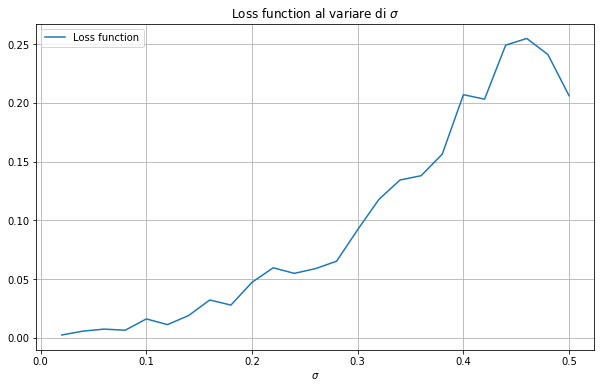

In [15]:
plt.figure(figsize=(10,6))

plt.plot(sigma,loss, label='Loss function')
plt.title('Loss function al variare di $\sigma$')
plt.xlabel('$\sigma$')
plt.legend()
plt.grid(True)

plt.show()

Come ci si poteva aspettare, diminuendo il valore di $\sigma$ migliora la disposizione dei dati attorno alla retta $y=2x +1$ e di conseguenza diminuisce la loss function

Gli ultimi 2 parametri che sono stati fatti variare sono il numero di epoche ed il batch-size

In [93]:
import seaborn as sns

In [16]:
np.random.seed(0)

batch_vals=np.linspace(10,100,10, dtype=int)
epoch_vals=np.linspace(10,100,10, dtype=int)

epoch_batch = np.zeros((len(batch_vals), len(epoch_vals)))

for i, batch in enumerate(batch_vals):
    for j, epoch in enumerate(epoch_vals):

        x_train = np.random.uniform(-1, 1, 500)
        x_valid = np.random.uniform(-1, 1, 50)
        x_valid.sort()

        sigma = 0.1
        y_train = np.random.normal(m * x_train + b, sigma) 
        y_valid = np.random.normal(m * x_valid + b, sigma)


        model = tf.keras.Sequential()
        model.add(Dense(1, input_shape=(1,)))


        model.compile(optimizer='sgd', loss='mse', metrics=['mse'])


        history = model.fit(x=x_train, y=y_train, batch_size=i, epochs=j, shuffle=True, validation_data=(x_valid, y_valid))


        score = model.evaluate(x_valid, y_valid, batch_size=i)
        
        sns.set()
        epoch_batch[i][j] = score[0]
        print(epoch_batch[i][j])

2/2 [==============================] - 0s 913us/step - loss: 4.1880 - mse: 4.1880
4.1880059242248535
2/2 [==============================] - 0s 2ms/step - loss: 0.8141 - mse: 0.8141
0.8140905499458313
Epoch 1/2
16/16 [==============================] - 0s 8ms/step - loss: 1.0681 - mse: 1.0681 - val_loss: 0.7825 - val_mse: 0.7825
Epoch 2/2
2/2 [==============================] - 0s 1ms/step - loss: 0.4783 - mse: 0.4783
0.4783182442188263
Epoch 1/3
16/16 [==============================] - 0s 6ms/step - loss: 1.6096 - mse: 1.6096 - val_loss: 1.4169 - val_mse: 1.4169
Epoch 2/3
16/16 [==============================] - 0s 2ms/step - loss: 1.1342 - mse: 1.1342 - val_loss: 1.0101 - val_mse: 1.0101
Epoch 3/3
2/2 [==============================] - 0s 890us/step - loss: 0.7464 - mse: 0.7464
0.7463638782501221
Epoch 1/4
16/16 [==============================] - 0s 6ms/step - loss: 2.5196 - mse: 2.5196 - val_loss: 2.4048 - val_mse: 2.4048
Epoch 2/4
16/16 [==============================] - 0s 2ms/step -

25/25 [==============================] - 0s 898us/step - loss: 0.0109 - mse: 0.0109
0.010850122198462486
Epoch 1/6
250/250 [==============================] - 0s 935us/step - loss: 0.8711 - mse: 0.8711 - val_loss: 0.1287 - val_mse: 0.1287
Epoch 2/6
250/250 [==============================] - 0s 727us/step - loss: 0.0417 - mse: 0.0417 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 3/6
250/250 [==============================] - 0s 745us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4/6
250/250 [==============================] - 0s 714us/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 5/6
250/250 [==============================] - 0s 759us/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 6/6
25/25 [==============================] - 0s 584us/step - loss: 0.0115 - mse: 0.0115  
0.011460981331765652
Epoch 1/7
250/250 [==============================] - 0s 988us/step - loss: 0.2731 - mse: 0.2731 - val_loss: 0.040

125/125 [==============================] - 0s 807us/step - loss: 0.0368 - mse: 0.0368 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 4/8
125/125 [==============================] - 0s 863us/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 5/8
125/125 [==============================] - 0s 810us/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 6/8
125/125 [==============================] - 0s 858us/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 7/8
125/125 [==============================] - 0s 879us/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 8/8
13/13 [==============================] - 0s 665us/step - loss: 0.0104 - mse: 0.0104
0.010421181097626686
Epoch 1/9
125/125 [==============================] - 0s 1ms/step - loss: 0.6079 - mse: 0.6079 - val_loss: 0.1873 - val_mse: 0.1873
Epoch 2/9
125/125 [==============================] - 0s 841us/step - loss: 0.0899 - mse: 0.0899 - v

72/72 [==============================] - 0s 2ms/step - loss: 2.0931 - mse: 2.0931 - val_loss: 0.9701 - val_mse: 0.9701
Epoch 2/2
8/8 [==============================] - 0s 755us/step - loss: 0.3563 - mse: 0.3563
0.3563465178012848
Epoch 1/3
72/72 [==============================] - 0s 4ms/step - loss: 3.2192 - mse: 3.2192 - val_loss: 1.5635 - val_mse: 1.5635
Epoch 2/3
72/72 [==============================] - 0s 2ms/step - loss: 1.1733 - mse: 1.1733 - val_loss: 0.6337 - val_mse: 0.6337
Epoch 3/3
8/8 [==============================] - 0s 1ms/step - loss: 0.2605 - mse: 0.2605
0.26053813099861145
Epoch 1/4
72/72 [==============================] - 0s 3ms/step - loss: 2.4309 - mse: 2.4309 - val_loss: 1.2622 - val_mse: 1.2622
Epoch 2/4
72/72 [==============================] - 0s 1ms/step - loss: 0.8200 - mse: 0.8200 - val_loss: 0.5032 - val_mse: 0.5032
Epoch 3/4
72/72 [==============================] - 0s 2ms/step - loss: 0.3195 - mse: 0.3195 - val_loss: 0.2073 - val_mse: 0.2073
Epoch 4/4
8/8 [

56/56 [==============================] - 0s 880us/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 5/6
56/56 [==============================] - 0s 883us/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 6/6
6/6 [==============================] - 0s 666us/step - loss: 0.0114 - mse: 0.0114
0.01137695275247097
Epoch 1/7
56/56 [==============================] - 0s 2ms/step - loss: 0.4370 - mse: 0.4370 - val_loss: 0.1323 - val_mse: 0.1323
Epoch 2/7
56/56 [==============================] - 0s 837us/step - loss: 0.0605 - mse: 0.0605 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 3/7
56/56 [==============================] - 0s 903us/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 4/7
56/56 [==============================] - 0s 905us/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 5/7
56/56 [==============================] - 0s 1ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0093 - v

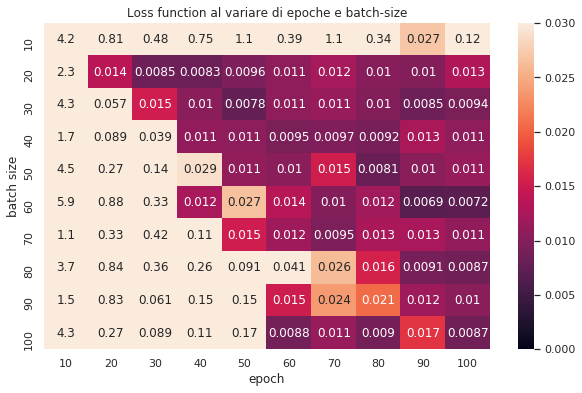

In [17]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(epoch_batch, annot=True,xticklabels=epoch_vals, yticklabels=batch_vals,vmin=0, vmax=0.03)
ax.set_title("Loss function al variare di epoche e batch-size")
ax.set_xlabel("epoch")
ax.set_ylabel("batch size")
plt.show()

Dalla heatmap si evince come la rete neurale performi meglio con un numero elevato di epoche e con batch-size ristretti.

I parametri scelti al fine di ottimizzare la rete neurale sono:
- $N_{train}$: 500
- $\sigma$: 0.1
- $N_{epoch}$: 90
- batch-size: 30

Di seguit sono riportati i risultati ottenuti con la rete FFNN ottimizzata:

In [18]:
np.random.seed(0)

x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()

sigma = 0.1
y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)
y_target = m * x_valid + b

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))

score = model.evaluate(x_valid, y_valid, batch_size=30, verbose=1)
    

Epoch 1/90
17/17 [==============================] - 0s 5ms/step - loss: 3.0195 - mse: 3.0195 - val_loss: 2.2923 - val_mse: 2.2923
Epoch 2/90
17/17 [==============================] - 0s 1ms/step - loss: 2.2045 - mse: 2.2045 - val_loss: 1.6940 - val_mse: 1.6940
Epoch 3/90
17/17 [==============================] - 0s 1ms/step - loss: 1.6426 - mse: 1.6426 - val_loss: 1.2868 - val_mse: 1.2868
Epoch 4/90
17/17 [==============================] - 0s 1ms/step - loss: 1.2531 - mse: 1.2531 - val_loss: 0.9943 - val_mse: 0.9943
Epoch 5/90
17/17 [==============================] - 0s 1ms/step - loss: 0.9705 - mse: 0.9705 - val_loss: 0.7768 - val_mse: 0.7768
Epoch 6/90
17/17 [==============================] - 0s 1ms/step - loss: 0.7592 - mse: 0.7592 - val_loss: 0.6107 - val_mse: 0.6107
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5972 - mse: 0.5972 - val_loss: 0.4829 - val_mse: 0.4829
Epoch 8/90
17/17 [==============================] - 0s 1ms/step - loss: 0.4727 - mse: 0.47

In [19]:
model.get_weights()

[array([[2.0105262]], dtype=float32), array([0.98962677], dtype=float32)]

In [20]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.0111 - mse: 0.0111

Test loss: 0.011120631359517574
Test accuracy: 0.011120631359517574


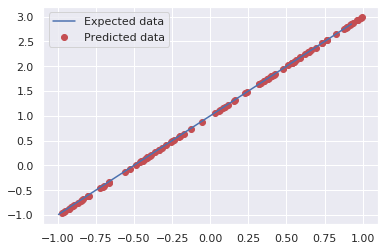

In [21]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r',label='Predicted data')
plt.plot(x_valid, y_target, label='Expected data')
plt.grid(True)
plt.legend()
plt.show()

### Exercise 11.2

<span style="color:blue">
Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
</span>

In [22]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = 4 -3* x_valid -2*x_valid*x_valid + 3*x_valid*x_valid*x_valid

sigma = 0.1 
y_train = np.random.normal(4 -3* x_train -2*x_train*x_train + 3*x_train*x_train*x_train, sigma) 
y_valid = np.random.normal(4 -3* x_valid -2*x_valid*x_valid + 3*x_valid*x_valid*x_valid, sigma)

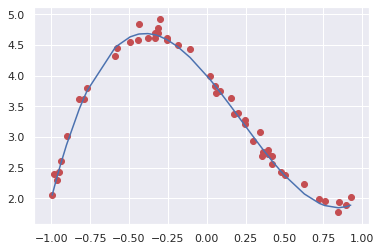

In [33]:
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

I primi due parametri che vengono fatti variare sono il numero di layers $N_{HL}$ ed il numero di perceptrons per layer $N_{p}$:

In [23]:
layers=np.linspace(1,12,12, dtype=int)
neurons=np.linspace(1,17,17, dtype=int)

layers_neurons = np.zeros((12, 17))

for i in layers:
    for j in neurons:

        model = tf.keras.Sequential()
        for k in range(i):
            model.add(Dense(j))


        model.compile(optimizer='sgd', loss='mse', metrics=['mse'])


        history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))


        score = model.evaluate(x_valid, y_valid, batch_size=30)
        
        sns.set()
        layers_neurons[i-1][j-1] = score[0]

Epoch 1/90
17/17 [==============================] - 0s 11ms/step - loss: 8.9183 - mse: 8.9183 - val_loss: 6.3016 - val_mse: 6.3016
Epoch 2/90
17/17 [==============================] - 0s 3ms/step - loss: 4.7900 - mse: 4.7900 - val_loss: 3.5263 - val_mse: 3.5263
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 2.7078 - mse: 2.7078 - val_loss: 2.1437 - val_mse: 2.1437
Epoch 4/90
17/17 [==============================] - 0s 3ms/step - loss: 1.6562 - mse: 1.6562 - val_loss: 1.4513 - val_mse: 1.4513
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1249 - mse: 1.1249 - val_loss: 1.1093 - val_mse: 1.1093
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8564 - mse: 0.8564 - val_loss: 0.9414 - val_mse: 0.9414
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7194 - mse: 0.7194 - val_loss: 0.8610 - val_mse: 0.8610
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6495 - mse: 0.6

17/17 [==============================] - 0s 2ms/step - loss: 0.5883 - mse: 0.5883 - val_loss: 0.7854 - val_mse: 0.7854
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5860 - mse: 0.5860 - val_loss: 0.7870 - val_mse: 0.7870
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5841 - mse: 0.5841 - val_loss: 0.7885 - val_mse: 0.7885
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5825 - mse: 0.5825 - val_loss: 0.7901 - val_mse: 0.7901
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5811 - mse: 0.5811 - val_loss: 0.7914 - val_mse: 0.7914
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5798 - mse: 0.5798 - val_loss: 0.7928 - val_mse: 0.7928
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5789 - mse: 0.5789 - val_loss: 0.7940 - val_mse: 0.7940
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5778 - mse: 0.5778 -

17/17 [==============================] - 0s 2ms/step - loss: 3.4463 - mse: 3.4463 - val_loss: 3.1579 - val_mse: 3.1579
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 2.8989 - mse: 2.8989 - val_loss: 2.6791 - val_mse: 2.6791
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4602 - mse: 2.4602 - val_loss: 2.2963 - val_mse: 2.2963
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1078 - mse: 2.1078 - val_loss: 1.9909 - val_mse: 1.9909
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 1.8248 - mse: 1.8248 - val_loss: 1.7460 - val_mse: 1.7460
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 1.5968 - mse: 1.5968 - val_loss: 1.5509 - val_mse: 1.5509
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 1.4134 - mse: 1.4134 - val_loss: 1.3949 - val_mse: 1.3949
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 1.2655 - mse: 1.2655 - v

17/17 [==============================] - 0s 2ms/step - loss: 0.6327 - mse: 0.6327 - val_loss: 0.7880 - val_mse: 0.7880
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6280 - mse: 0.6280 - val_loss: 0.7867 - val_mse: 0.7867
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6237 - mse: 0.6237 - val_loss: 0.7857 - val_mse: 0.7857
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6199 - mse: 0.6199 - val_loss: 0.7849 - val_mse: 0.7849
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6164 - mse: 0.6164 - val_loss: 0.7843 - val_mse: 0.7843
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6131 - mse: 0.6131 - val_loss: 0.7839 - val_mse: 0.7839
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6101 - mse: 0.6101 - val_loss: 0.7837 - val_mse: 0.7837
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6074 - mse: 0.6074 -

17/17 [==============================] - 0s 2ms/step - loss: 2.9068 - mse: 2.9068 - val_loss: 2.7873 - val_mse: 2.7873
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 2.6329 - mse: 2.6329 - val_loss: 2.5366 - val_mse: 2.5366
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3931 - mse: 2.3931 - val_loss: 2.3167 - val_mse: 2.3167
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1823 - mse: 2.1823 - val_loss: 2.1250 - val_mse: 2.1250
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9977 - mse: 1.9977 - val_loss: 1.9563 - val_mse: 1.9563
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 1.8348 - mse: 1.8348 - val_loss: 1.8093 - val_mse: 1.8093
Epoch 19/90
17/17 [==============================] - 0s 1ms/step - loss: 1.6922 - mse: 1.6922 - val_loss: 1.6805 - val_mse: 1.6805
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 1.5669 - mse: 1.5669 -

17/17 [==============================] - 0s 2ms/step - loss: 0.7328 - mse: 0.7328 - val_loss: 0.8379 - val_mse: 0.8379
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7226 - mse: 0.7226 - val_loss: 0.8312 - val_mse: 0.8312
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7132 - mse: 0.7132 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7046 - mse: 0.7046 - val_loss: 0.8197 - val_mse: 0.8197
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6967 - mse: 0.6967 - val_loss: 0.8149 - val_mse: 0.8149
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6893 - mse: 0.6893 - val_loss: 0.8106 - val_mse: 0.8106
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6825 - mse: 0.6825 - val_loss: 0.8068 - val_mse: 0.8068
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6762 - mse: 0.6762 -

17/17 [==============================] - 0s 2ms/step - loss: 2.7799 - mse: 2.7799 - val_loss: 2.6821 - val_mse: 2.6821
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 2.5956 - mse: 2.5956 - val_loss: 2.5090 - val_mse: 2.5090
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4275 - mse: 2.4275 - val_loss: 2.3514 - val_mse: 2.3514
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2743 - mse: 2.2743 - val_loss: 2.2089 - val_mse: 2.2089
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1352 - mse: 2.1352 - val_loss: 2.0791 - val_mse: 2.0791
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0084 - mse: 2.0084 - val_loss: 1.9616 - val_mse: 1.9616
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 1.8931 - mse: 1.8931 - val_loss: 1.8541 - val_mse: 1.8541
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 1.7873 - mse: 1.7873 -

17/17 [==============================] - 0s 2ms/step - loss: 0.8575 - mse: 0.8575 - val_loss: 0.9241 - val_mse: 0.9241
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8424 - mse: 0.8424 - val_loss: 0.9121 - val_mse: 0.9121
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8282 - mse: 0.8282 - val_loss: 0.9010 - val_mse: 0.9010
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8149 - mse: 0.8149 - val_loss: 0.8909 - val_mse: 0.8909
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8025 - mse: 0.8025 - val_loss: 0.8815 - val_mse: 0.8815
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7910 - mse: 0.7910 - val_loss: 0.8728 - val_mse: 0.8728
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7800 - mse: 0.7800 - val_loss: 0.8649 - val_mse: 0.8649
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7699 - mse: 0.7699 -

Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 2.7547 - mse: 2.7547 - val_loss: 2.6601 - val_mse: 2.6601
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 2.6152 - mse: 2.6152 - val_loss: 2.5275 - val_mse: 2.5275
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4854 - mse: 2.4854 - val_loss: 2.4043 - val_mse: 2.4043
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3645 - mse: 2.3645 - val_loss: 2.2896 - val_mse: 2.2896
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2518 - mse: 2.2518 - val_loss: 2.1832 - val_mse: 2.1832
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1471 - mse: 2.1471 - val_loss: 2.0847 - val_mse: 2.0847
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0497 - mse: 2.0497 - val_loss: 1.9931 - val_mse: 1.9931
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9592 - m

Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9548 - mse: 0.9548 - val_loss: 1.0070 - val_mse: 1.0070
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9370 - mse: 0.9370 - val_loss: 0.9920 - val_mse: 0.9920
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9202 - mse: 0.9202 - val_loss: 0.9778 - val_mse: 0.9778
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9042 - mse: 0.9042 - val_loss: 0.9646 - val_mse: 0.9646
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8893 - mse: 0.8893 - val_loss: 0.9523 - val_mse: 0.9523
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8752 - mse: 0.8752 - val_loss: 0.9407 - val_mse: 0.9407
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8619 - mse: 0.8619 - val_loss: 0.9298 - val_mse: 0.9298
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8491 - m

Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 2.5367 - mse: 2.5367 - val_loss: 2.5058 - val_mse: 2.5058
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4288 - mse: 2.4288 - val_loss: 2.4037 - val_mse: 2.4037
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3278 - mse: 2.3278 - val_loss: 2.3075 - val_mse: 2.3075
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2327 - mse: 2.2327 - val_loss: 2.2167 - val_mse: 2.2167
Epoch 35/90
17/17 [==============================] - 0s 1ms/step - loss: 2.1426 - mse: 2.1426 - val_loss: 2.1307 - val_mse: 2.1307
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0573 - mse: 2.0573 - val_loss: 2.0503 - val_mse: 2.0503
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9774 - mse: 1.9774 - val_loss: 1.9745 - val_mse: 1.9745
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9018 - m

Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 10.9008 - mse: 10.9008 - val_loss: 10.6200 - val_mse: 10.6200
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 10.3529 - mse: 10.3529 - val_loss: 10.0839 - val_mse: 10.0839
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 9.8332 - mse: 9.8332 - val_loss: 9.5765 - val_mse: 9.5765
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 9.3412 - mse: 9.3412 - val_loss: 9.0982 - val_mse: 9.0982
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 8.8774 - mse: 8.8774 - val_loss: 8.6464 - val_mse: 8.6464
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 8.4390 - mse: 8.4390 - val_loss: 8.2179 - val_mse: 8.2179
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 8.0230 - mse: 8.0230 - val_loss: 7.8131 - val_mse: 7.8131
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 7.6300 - 

Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 2.5545 - mse: 2.5545 - val_loss: 2.5144 - val_mse: 2.5144
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4640 - mse: 2.4640 - val_loss: 2.4272 - val_mse: 2.4272
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3776 - mse: 2.3776 - val_loss: 2.3448 - val_mse: 2.3448
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2958 - mse: 2.2958 - val_loss: 2.2664 - val_mse: 2.2664
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2179 - mse: 2.2179 - val_loss: 2.1921 - val_mse: 2.1921
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1439 - mse: 2.1439 - val_loss: 2.1209 - val_mse: 2.1209
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0730 - mse: 2.0730 - val_loss: 2.0541 - val_mse: 2.0541
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0063 - m

Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 8.4697 - mse: 8.4697 - val_loss: 8.2838 - val_mse: 8.2838
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 8.1085 - mse: 8.1085 - val_loss: 7.9309 - val_mse: 7.9309
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 7.7643 - mse: 7.7643 - val_loss: 7.5949 - val_mse: 7.5949
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 7.4366 - mse: 7.4366 - val_loss: 7.2749 - val_mse: 7.2749
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 7.1243 - mse: 7.1243 - val_loss: 6.9702 - val_mse: 6.9702
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 6.8271 - mse: 6.8271 - val_loss: 6.6794 - val_mse: 6.6794
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 6.5432 - mse: 6.5432 - val_loss: 6.4033 - val_mse: 6.4033
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 6.2736 - ms

Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4629 - mse: 2.4629 - val_loss: 2.4474 - val_mse: 2.4474
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3863 - mse: 2.3863 - val_loss: 2.3741 - val_mse: 2.3741
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3133 - mse: 2.3133 - val_loss: 2.3042 - val_mse: 2.3042
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2436 - mse: 2.2436 - val_loss: 2.2372 - val_mse: 2.2372
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1768 - mse: 2.1768 - val_loss: 2.1732 - val_mse: 2.1732
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1128 - mse: 2.1128 - val_loss: 2.1119 - val_mse: 2.1119
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0515 - mse: 2.0515 - val_loss: 2.0531 - val_mse: 2.0531
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9927 - m

17/17 [==============================] - 0s 2ms/step - loss: 1.2079 - mse: 1.2079 - val_loss: 1.2522 - val_mse: 1.2522
Epoch 77/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1865 - mse: 1.1865 - val_loss: 1.2328 - val_mse: 1.2328
Epoch 78/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1661 - mse: 1.1661 - val_loss: 1.2140 - val_mse: 1.2140
Epoch 79/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1463 - mse: 1.1463 - val_loss: 1.1957 - val_mse: 1.1957
Epoch 80/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1271 - mse: 1.1271 - val_loss: 1.1783 - val_mse: 1.1783
Epoch 81/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1086 - mse: 1.1086 - val_loss: 1.1617 - val_mse: 1.1617
Epoch 82/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0910 - mse: 1.0910 - val_loss: 1.1456 - val_mse: 1.1456
Epoch 83/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0740 - mse: 1.0740 -

Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 2.5008 - mse: 2.5008 - val_loss: 2.4902 - val_mse: 2.4902
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4319 - mse: 2.4319 - val_loss: 2.4232 - val_mse: 2.4232
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3650 - mse: 2.3650 - val_loss: 2.3594 - val_mse: 2.3594
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3013 - mse: 2.3013 - val_loss: 2.2977 - val_mse: 2.2977
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2397 - mse: 2.2397 - val_loss: 2.2384 - val_mse: 2.2384
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1804 - mse: 2.1804 - val_loss: 2.1811 - val_mse: 2.1811
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1231 - mse: 2.1231 - val_loss: 2.1267 - val_mse: 2.1267
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0685 - m

Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8283 - val_mse: 0.8283
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5728 - mse: 0.5728 - val_loss: 0.8272 - val_mse: 0.8272
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.8275 - val_mse: 0.8275
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5704 - mse: 0.5704 - val_loss: 0.8299 - val_mse: 0.8299
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5709 - mse: 0.5709 - val_loss: 0.8281 - val_mse: 0.8281
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5729 - mse: 0.5729 - val_loss: 0.8317 - val_mse: 0.8317
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.8296 - val_mse: 0.8296
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5712 - m

17/17 [==============================] - 0s 2ms/step - loss: 0.5707 - mse: 0.5707 - val_loss: 0.8238 - val_mse: 0.8238
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5700 - mse: 0.5700 - val_loss: 0.8311 - val_mse: 0.8311
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5717 - mse: 0.5717 - val_loss: 0.8281 - val_mse: 0.8281
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5714 - mse: 0.5714 - val_loss: 0.8250 - val_mse: 0.8250
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5700 - mse: 0.5700 - val_loss: 0.8252 - val_mse: 0.8252
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5715 - mse: 0.5715 - val_loss: 0.8250 - val_mse: 0.8250
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5728 - mse: 0.5728 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5706 - mse: 0.5706 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5791 - mse: 0.5791 - val_loss: 0.8288 - val_mse: 0.8288
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5791 - mse: 0.5791 - val_loss: 0.8289 - val_mse: 0.8289
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5777 - mse: 0.5777 - val_loss: 0.8298 - val_mse: 0.8298
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5791 - mse: 0.5791 - val_loss: 0.8299 - val_mse: 0.8299
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5774 - mse: 0.5774 - val_loss: 0.8302 - val_mse: 0.8302
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5779 - mse: 0.5779 - val_loss: 0.8287 - val_mse: 0.8287
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5770 - mse: 0.5770 - val_loss: 0.8280 - val_mse: 0.8280
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5764 - mse: 0.5764 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5708 - mse: 0.5708 - val_loss: 0.8275 - val_mse: 0.8275
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5706 - mse: 0.5706 - val_loss: 0.8256 - val_mse: 0.8256
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5709 - mse: 0.5709 - val_loss: 0.8261 - val_mse: 0.8261
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5704 - mse: 0.5704 - val_loss: 0.8250 - val_mse: 0.8250
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5710 - mse: 0.5710 - val_loss: 0.8244 - val_mse: 0.8244
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5717 - mse: 0.5717 - val_loss: 0.8258 - val_mse: 0.8258
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5705 - mse: 0.5705 - val_loss: 0.8270 - val_mse: 0.8270
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5705 - mse: 0.5705 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5748 - mse: 0.5748 - val_loss: 0.8248 - val_mse: 0.8248
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.8260 - val_mse: 0.8260
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5745 - mse: 0.5745 - val_loss: 0.8260 - val_mse: 0.8260
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.8259 - val_mse: 0.8259
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.8263 - val_mse: 0.8263
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.8259 - val_mse: 0.8259
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.8270 - val_mse: 0.8270
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 -

17/17 [==============================] - 0s 2ms/step - loss: 2.5265 - mse: 2.5265 - val_loss: 1.7712 - val_mse: 1.7712
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 1.3661 - mse: 1.3661 - val_loss: 1.1029 - val_mse: 1.1029
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8994 - mse: 0.8994 - val_loss: 0.8740 - val_mse: 0.8740
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7279 - mse: 0.7279 - val_loss: 0.8119 - val_mse: 0.8119
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6623 - mse: 0.6623 - val_loss: 0.7912 - val_mse: 0.7912
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6284 - mse: 0.6284 - val_loss: 0.7873 - val_mse: 0.7873
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6091 - mse: 0.6091 - val_loss: 0.7884 - val_mse: 0.7884
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5977 - mse: 0.5977 - val_

17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5722 - mse: 0.5722 - val_loss: 0.8260 - val_mse: 0.8260
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5725 - mse: 0.5725 - val_loss: 0.8248 - val_mse: 0.8248
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5717 - mse: 0.5717 - val_loss: 0.8260 - val_mse: 0.8260
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5726 - mse: 0.5726 - val_loss: 0.8264 - val_mse: 0.8264
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5714 - mse: 0.5714 - val_loss: 0.8260 - val_mse: 0.8260
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5720 - mse: 0.5720 -

Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7696 - mse: 0.7696 - val_loss: 0.8579 - val_mse: 0.8579
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6729 - mse: 0.6729 - val_loss: 0.8161 - val_mse: 0.8161
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6290 - mse: 0.6290 - val_loss: 0.8020 - val_mse: 0.8020
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6081 - mse: 0.6081 - val_loss: 0.7989 - val_mse: 0.7989
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5957 - mse: 0.5957 - val_loss: 0.7995 - val_mse: 0.7995
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5887 - mse: 0.5887 - val_loss: 0.8012 - val_mse: 0.8012
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5844 - mse: 0.5844 - val_loss: 0.8048 - val_mse: 0.8048
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5811 - m

17/17 [==============================] - 0s 2ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.8276 - val_mse: 0.8276
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8270 - val_mse: 0.8270
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.8264 - val_mse: 0.8264
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5748 - mse: 0.5748 - val_loss: 0.8259 - val_mse: 0.8259
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - mse: 0.5747 - val_loss: 0.8268 - val_mse: 0.8268
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5743 - mse: 0.5743 - val_loss: 0.8269 - val_mse: 0.8269
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.8267 - val_mse: 0.8267
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5744 - mse: 0.5744 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5988 - mse: 0.5988 - val_loss: 0.8215 - val_mse: 0.8215
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5955 - mse: 0.5955 - val_loss: 0.8230 - val_mse: 0.8230
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5934 - mse: 0.5934 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5919 - mse: 0.5919 - val_loss: 0.8268 - val_mse: 0.8268
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5901 - mse: 0.5901 - val_loss: 0.8268 - val_mse: 0.8268
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5887 - mse: 0.5887 - val_loss: 0.8285 - val_mse: 0.8285
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5871 - mse: 0.5871 - val_loss: 0.8292 - val_mse: 0.8292
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5857 - mse: 0.5857 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5722 - mse: 0.5722 - val_loss: 0.8275 - val_mse: 0.8275
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.8281 - val_mse: 0.8281
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5722 - mse: 0.5722 - val_loss: 0.8276 - val_mse: 0.8276
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5715 - mse: 0.5715 - val_loss: 0.8272 - val_mse: 0.8272
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 - val_loss: 0.8278 - val_mse: 0.8278
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5715 - mse: 0.5715 - val_loss: 0.8271 - val_mse: 0.8271
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5715 - mse: 0.5715 - val_loss: 0.8281 - val_mse: 0.8281
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5714 - mse: 0.5714 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5883 - mse: 0.5883 - val_loss: 0.8054 - val_mse: 0.8054
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5857 - mse: 0.5857 - val_loss: 0.8080 - val_mse: 0.8080
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5844 - mse: 0.5844 - val_loss: 0.8097 - val_mse: 0.8097
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5824 - mse: 0.5824 - val_loss: 0.8117 - val_mse: 0.8117
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5815 - mse: 0.5815 - val_loss: 0.8133 - val_mse: 0.8133
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5804 - mse: 0.5804 - val_loss: 0.8154 - val_mse: 0.8154
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5793 - mse: 0.5793 - val_loss: 0.8170 - val_mse: 0.8170
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5790 - mse: 0.5790 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5726 - mse: 0.5726 - val_loss: 0.8275 - val_mse: 0.8275
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5728 - mse: 0.5728 - val_loss: 0.8277 - val_mse: 0.8277
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5725 - mse: 0.5725 - val_loss: 0.8272 - val_mse: 0.8272
Epoch 59/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.8286 - val_mse: 0.8286
Epoch 60/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.8277 - val_mse: 0.8277
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.8272 - val_mse: 0.8272
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.8283 - val_mse: 0.8283
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5731 - mse: 0.5731 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5785 - mse: 0.5785 - val_loss: 0.8135 - val_mse: 0.8135
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5781 - mse: 0.5781 - val_loss: 0.8137 - val_mse: 0.8137
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5780 - mse: 0.5780 - val_loss: 0.8160 - val_mse: 0.8160
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5776 - mse: 0.5776 - val_loss: 0.8171 - val_mse: 0.8171
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5765 - mse: 0.5765 - val_loss: 0.8186 - val_mse: 0.8186
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5762 - mse: 0.5762 - val_loss: 0.8201 - val_mse: 0.8201
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5757 - mse: 0.5757 - val_loss: 0.8214 - val_mse: 0.8214
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5748 - mse: 0.5748 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5722 - mse: 0.5722 - val_loss: 0.8274 - val_mse: 0.8274
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 - val_loss: 0.8274 - val_mse: 0.8274
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.8279 - val_mse: 0.8279
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 - val_loss: 0.8281 - val_mse: 0.8281
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 - val_loss: 0.8278 - val_mse: 0.8278
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.8280 - val_mse: 0.8280
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8284 - val_mse: 0.8284
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5718 - mse: 0.5718 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5814 - mse: 0.5814 - val_loss: 0.8286 - val_mse: 0.8286
Epoch 35/90
17/17 [==============================] - 0s 1ms/step - loss: 0.5803 - mse: 0.5803 - val_loss: 0.8290 - val_mse: 0.8290
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5800 - mse: 0.5800 - val_loss: 0.8293 - val_mse: 0.8293
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5797 - mse: 0.5797 - val_loss: 0.8283 - val_mse: 0.8283
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5799 - mse: 0.5799 - val_loss: 0.8284 - val_mse: 0.8284
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5788 - mse: 0.5788 - val_loss: 0.8287 - val_mse: 0.8287
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5793 - mse: 0.5793 - val_loss: 0.8287 - val_mse: 0.8287
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5785 - mse: 0.5785 -

Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 5.5804 - mse: 5.5804 - val_loss: 4.7550 - val_mse: 4.7550
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 4.0399 - mse: 4.0399 - val_loss: 3.3230 - val_mse: 3.3230
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 2.7348 - mse: 2.7348 - val_loss: 2.2237 - val_mse: 2.2237
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 1.7933 - mse: 1.7933 - val_loss: 1.5062 - val_mse: 1.5062
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 1.2126 - mse: 1.2126 - val_loss: 1.1184 - val_mse: 1.1184
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9056 - mse: 0.9056 - val_loss: 0.9355 - val_mse: 0.9355
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7537 - mse: 0.7537 - val_loss: 0.8506 - val_mse: 0.8506
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6772 - mse: 

17/17 [==============================] - 0s 2ms/step - loss: 0.5721 - mse: 0.5721 - val_loss: 0.8478 - val_mse: 0.8478
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 - val_loss: 0.8253 - val_mse: 0.8253
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5735 - mse: 0.5735 - val_loss: 0.8232 - val_mse: 0.8232
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.8283 - val_mse: 0.8283
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5721 - mse: 0.5721 - val_loss: 0.8322 - val_mse: 0.8322
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5746 - mse: 0.5746 - val_loss: 0.8276 - val_mse: 0.8276
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5744 - mse: 0.5744 - val_loss: 0.8182 - val_mse: 0.8182
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5783 - mse: 0.5783 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5870 - mse: 0.5870 - val_loss: 0.8300 - val_mse: 0.8300
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5842 - mse: 0.5842 - val_loss: 0.8245 - val_mse: 0.8245
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5859 - mse: 0.5859 - val_loss: 0.8236 - val_mse: 0.8236
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5845 - mse: 0.5845 - val_loss: 0.8203 - val_mse: 0.8203
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5824 - mse: 0.5824 - val_loss: 0.8337 - val_mse: 0.8337
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - mse: 0.5827 - val_loss: 0.8418 - val_mse: 0.8418
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5801 - mse: 0.5801 - val_loss: 0.8234 - val_mse: 0.8234
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5806 - mse: 0.5806 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5738 - mse: 0.5738 - val_loss: 0.8218 - val_mse: 0.8218
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5730 - mse: 0.5730 - val_loss: 0.8232 - val_mse: 0.8232
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5758 - mse: 0.5758 - val_loss: 0.8250 - val_mse: 0.8250
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5715 - mse: 0.5715 - val_loss: 0.8218 - val_mse: 0.8218
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5725 - mse: 0.5725 - val_loss: 0.8184 - val_mse: 0.8184
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5764 - mse: 0.5764 - val_loss: 0.8182 - val_mse: 0.8182
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5733 - mse: 0.5733 - val_loss: 0.8193 - val_mse: 0.8193
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - mse: 0.5716 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5835 - mse: 0.5835 - val_loss: 0.8391 - val_mse: 0.8391
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5821 - mse: 0.5821 - val_loss: 0.8305 - val_mse: 0.8305
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5835 - mse: 0.5835 - val_loss: 0.8360 - val_mse: 0.8360
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5813 - mse: 0.5813 - val_loss: 0.8294 - val_mse: 0.8294
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5802 - mse: 0.5802 - val_loss: 0.8334 - val_mse: 0.8334
Epoch 23/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5803 - mse: 0.5803 - val_loss: 0.8277 - val_mse: 0.8277
Epoch 24/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5769 - mse: 0.5769 - val_loss: 0.8248 - val_mse: 0.8248
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5796 - mse: 0.5796 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5715 - mse: 0.5715 - val_loss: 0.8218 - val_mse: 0.8218
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8301 - val_mse: 0.8301
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5730 - mse: 0.5730 - val_loss: 0.8260 - val_mse: 0.8260
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5726 - mse: 0.5726 - val_loss: 0.8271 - val_mse: 0.8271
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5722 - mse: 0.5722 - val_loss: 0.8280 - val_mse: 0.8280
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8272 - val_mse: 0.8272
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5728 - mse: 0.5728 - val_loss: 0.8298 - val_mse: 0.8298
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5717 - mse: 0.5717 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5845 - mse: 0.5845 - val_loss: 0.8370 - val_mse: 0.8370
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5805 - mse: 0.5805 - val_loss: 0.8323 - val_mse: 0.8323
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5787 - mse: 0.5787 - val_loss: 0.8401 - val_mse: 0.8401
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5819 - mse: 0.5819 - val_loss: 0.8371 - val_mse: 0.8371
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5795 - mse: 0.5795 - val_loss: 0.8379 - val_mse: 0.8379
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5789 - mse: 0.5789 - val_loss: 0.8308 - val_mse: 0.8308
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5814 - mse: 0.5814 - val_loss: 0.8306 - val_mse: 0.8306
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5785 - mse: 0.5785 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5762 - mse: 0.5762 - val_loss: 0.8308 - val_mse: 0.8308
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5729 - mse: 0.5729 - val_loss: 0.8263 - val_mse: 0.8263
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5746 - mse: 0.5746 - val_loss: 0.8309 - val_mse: 0.8309
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.8276 - val_mse: 0.8276
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 - val_loss: 0.8208 - val_mse: 0.8208
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5746 - mse: 0.5746 - val_loss: 0.8274 - val_mse: 0.8274
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.8224 - val_mse: 0.8224
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - mse: 0.5760 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5744 - mse: 0.5744 - val_loss: 0.8243 - val_mse: 0.8243
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.8247 - val_mse: 0.8247
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5751 - mse: 0.5751 - val_loss: 0.8308 - val_mse: 0.8308
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5732 - mse: 0.5732 - val_loss: 0.8247 - val_mse: 0.8247
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.8310 - val_mse: 0.8310
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - mse: 0.5747 - val_loss: 0.8273 - val_mse: 0.8273
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5715 - mse: 0.5715 - val_loss: 0.8219 - val_mse: 0.8219
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5748 - mse: 0.5748 -

17/17 [==============================] - 0s 3ms/step - loss: 5.2121 - mse: 5.2121 - val_loss: 2.6415 - val_mse: 2.6415
Epoch 3/90
17/17 [==============================] - 0s 3ms/step - loss: 1.5718 - mse: 1.5718 - val_loss: 0.9805 - val_mse: 0.9805
Epoch 4/90
17/17 [==============================] - 0s 3ms/step - loss: 0.7778 - mse: 0.7778 - val_loss: 0.8202 - val_mse: 0.8202
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6489 - mse: 0.6489 - val_loss: 0.7961 - val_mse: 0.7961
Epoch 6/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6081 - mse: 0.6081 - val_loss: 0.8055 - val_mse: 0.8055
Epoch 7/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5939 - mse: 0.5939 - val_loss: 0.8085 - val_mse: 0.8085
Epoch 8/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5880 - mse: 0.5880 - val_loss: 0.8129 - val_mse: 0.8129
Epoch 9/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5816 - mse: 0.5816 - val_lo

Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5703 - mse: 0.5703 - val_loss: 0.8222 - val_mse: 0.8222
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5748 - mse: 0.5748 - val_loss: 0.8192 - val_mse: 0.8192
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5730 - mse: 0.5730 - val_loss: 0.8247 - val_mse: 0.8247
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5743 - mse: 0.5743 - val_loss: 0.8254 - val_mse: 0.8254
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5738 - mse: 0.5738 - val_loss: 0.8223 - val_mse: 0.8223
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5748 - mse: 0.5748 - val_loss: 0.8244 - val_mse: 0.8244
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5755 - mse: 0.5755 - val_loss: 0.8243 - val_mse: 0.8243
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - m

Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.8291 - val_mse: 0.8291
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5730 - mse: 0.5730 - val_loss: 0.8271 - val_mse: 0.8271
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.8231 - val_mse: 0.8231
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.8286 - val_mse: 0.8286
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5722 - mse: 0.5722 - val_loss: 0.8271 - val_mse: 0.8271
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5712 - mse: 0.5712 - val_loss: 0.8377 - val_mse: 0.8377
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5737 - mse: 0.5737 - val_loss: 0.8244 - val_mse: 0.8244
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5718 - m

Epoch 9/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5792 - mse: 0.5792 - val_loss: 0.8297 - val_mse: 0.8297
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5773 - mse: 0.5773 - val_loss: 0.8414 - val_mse: 0.8414
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5779 - mse: 0.5779 - val_loss: 0.8330 - val_mse: 0.8330
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5784 - mse: 0.5784 - val_loss: 0.8307 - val_mse: 0.8307
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5780 - mse: 0.5780 - val_loss: 0.8275 - val_mse: 0.8275
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8295 - val_mse: 0.8295
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5757 - mse: 0.5757 - val_loss: 0.8324 - val_mse: 0.8324
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - ms

17/17 [==============================] - 0s 2ms/step - loss: 0.5743 - mse: 0.5743 - val_loss: 0.8233 - val_mse: 0.8233
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5764 - mse: 0.5764 - val_loss: 0.8256 - val_mse: 0.8256
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5743 - mse: 0.5743 - val_loss: 0.8294 - val_mse: 0.8294
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8313 - val_mse: 0.8313
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5741 - mse: 0.5741 - val_loss: 0.8292 - val_mse: 0.8292
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5750 - mse: 0.5750 - val_loss: 0.8296 - val_mse: 0.8296
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5737 - mse: 0.5737 - val_loss: 0.8331 - val_mse: 0.8331
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5800 - mse: 0.5800 - val_loss: 0.8323 - val_mse: 0.8323
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5798 - mse: 0.5798 - val_loss: 0.8361 - val_mse: 0.8361
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5800 - mse: 0.5800 - val_loss: 0.8329 - val_mse: 0.8329
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5788 - mse: 0.5788 - val_loss: 0.8305 - val_mse: 0.8305
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5782 - mse: 0.5782 - val_loss: 0.8301 - val_mse: 0.8301
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5774 - mse: 0.5774 - val_loss: 0.8343 - val_mse: 0.8343
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5777 - mse: 0.5777 - val_loss: 0.8380 - val_mse: 0.8380
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5780 - mse: 0.5780 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8299 - val_mse: 0.8299
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5730 - mse: 0.5730 - val_loss: 0.8330 - val_mse: 0.8330
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8278 - val_mse: 0.8278
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5750 - mse: 0.5750 - val_loss: 0.8232 - val_mse: 0.8232
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.8255 - val_mse: 0.8255
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5743 - mse: 0.5743 - val_loss: 0.8228 - val_mse: 0.8228
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5751 - mse: 0.5751 - val_loss: 0.8276 - val_mse: 0.8276
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5737 - mse: 0.5737 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.8289 - val_mse: 0.8289
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5766 - mse: 0.5766 - val_loss: 0.8367 - val_mse: 0.8367
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5762 - mse: 0.5762 - val_loss: 0.8283 - val_mse: 0.8283
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5755 - mse: 0.5755 - val_loss: 0.8292 - val_mse: 0.8292
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5746 - mse: 0.5746 - val_loss: 0.8278 - val_mse: 0.8278
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5774 - mse: 0.5774 - val_loss: 0.8260 - val_mse: 0.8260
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8339 - val_mse: 0.8339
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5758 - mse: 0.5758 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5759 - mse: 0.5759 - val_loss: 0.8259 - val_mse: 0.8259
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5741 - mse: 0.5741 - val_loss: 0.8321 - val_mse: 0.8321
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - mse: 0.5747 - val_loss: 0.8265 - val_mse: 0.8265
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5728 - mse: 0.5728 - val_loss: 0.8253 - val_mse: 0.8253
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.8262 - val_mse: 0.8262
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5733 - mse: 0.5733 - val_loss: 0.8241 - val_mse: 0.8241
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - mse: 0.5747 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8248 - val_mse: 0.8248
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5738 - mse: 0.5738 - val_loss: 0.8277 - val_mse: 0.8277
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5746 - mse: 0.5746 - val_loss: 0.8232 - val_mse: 0.8232
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8221 - val_mse: 0.8221
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5743 - mse: 0.5743 - val_loss: 0.8271 - val_mse: 0.8271
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5728 - mse: 0.5728 - val_loss: 0.8208 - val_mse: 0.8208
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.8259 - val_mse: 0.8259
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5745 - mse: 0.5745 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5865 - mse: 0.5865 - val_loss: 0.8434 - val_mse: 0.8434
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5768 - mse: 0.5768 - val_loss: 0.8160 - val_mse: 0.8160
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5697 - mse: 0.5697 - val_loss: 0.8220 - val_mse: 0.8220
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5756 - mse: 0.5756 - val_loss: 0.8240 - val_mse: 0.8240
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5832 - mse: 0.5832 - val_loss: 0.8221 - val_mse: 0.8221
Epoch 66/90
17/17 [==============================] - 0s 1ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.8311 - val_mse: 0.8311
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5877 - mse: 0.5877 - val_loss: 0.8415 - val_mse: 0.8415
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5797 - mse: 0.5797 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5743 - mse: 0.5743 - val_loss: 0.8259 - val_mse: 0.8259
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8244 - val_mse: 0.8244
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.8216 - val_mse: 0.8216
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.8213 - val_mse: 0.8213
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 - val_loss: 0.8276 - val_mse: 0.8276
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5735 - mse: 0.5735 - val_loss: 0.8324 - val_mse: 0.8324
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8361 - val_mse: 0.8361
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5956 - mse: 0.5956 - val_loss: 0.8497 - val_mse: 0.8497
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5882 - mse: 0.5882 - val_loss: 0.8466 - val_mse: 0.8466
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5894 - mse: 0.5894 - val_loss: 0.8325 - val_mse: 0.8325
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5905 - mse: 0.5905 - val_loss: 0.8368 - val_mse: 0.8368
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5829 - mse: 0.5829 - val_loss: 0.8613 - val_mse: 0.8613
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - mse: 0.5827 - val_loss: 0.8545 - val_mse: 0.8545
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5814 - mse: 0.5814 - val_loss: 0.8423 - val_mse: 0.8423
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5813 - mse: 0.5813 - val

17/17 [==============================] - 0s 2ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.8305 - val_mse: 0.8305
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5750 - mse: 0.5750 - val_loss: 0.8280 - val_mse: 0.8280
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5807 - mse: 0.5807 - val_loss: 0.8203 - val_mse: 0.8203
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5791 - mse: 0.5791 - val_loss: 0.8307 - val_mse: 0.8307
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5715 - mse: 0.5715 - val_loss: 0.8186 - val_mse: 0.8186
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5808 - mse: 0.5808 - val_loss: 0.8145 - val_mse: 0.8145
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5748 - mse: 0.5748 - val_loss: 0.8276 - val_mse: 0.8276
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5733 - mse: 0.5733 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5797 - mse: 0.5797 - val_loss: 0.8098 - val_mse: 0.8098
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5765 - mse: 0.5765 - val_loss: 0.8221 - val_mse: 0.8221
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.8318 - val_mse: 0.8318
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8350 - val_mse: 0.8350
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - mse: 0.5747 - val_loss: 0.8292 - val_mse: 0.8292
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5759 - mse: 0.5759 - val_loss: 0.8433 - val_mse: 0.8433
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5763 - mse: 0.5763 - val_loss: 0.8558 - val_mse: 0.8558
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5804 - mse: 0.5804 -

17/17 [==============================] - 0s 1ms/step - loss: 0.5698 - mse: 0.5698 - val_loss: 0.8189 - val_mse: 0.8189
Epoch 46/90
17/17 [==============================] - 0s 1ms/step - loss: 0.5740 - mse: 0.5740 - val_loss: 0.8295 - val_mse: 0.8295
Epoch 47/90
17/17 [==============================] - 0s 1ms/step - loss: 0.5741 - mse: 0.5741 - val_loss: 0.8248 - val_mse: 0.8248
Epoch 48/90
17/17 [==============================] - 0s 1ms/step - loss: 0.5783 - mse: 0.5783 - val_loss: 0.8332 - val_mse: 0.8332
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5791 - mse: 0.5791 - val_loss: 0.8227 - val_mse: 0.8227
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5738 - mse: 0.5738 - val_loss: 0.8173 - val_mse: 0.8173
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5826 - mse: 0.5826 - val_loss: 0.8198 - val_mse: 0.8198
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5805 - mse: 0.5805 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5892 - mse: 0.5892 - val_loss: 0.8276 - val_mse: 0.8276
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5849 - mse: 0.5849 - val_loss: 0.8273 - val_mse: 0.8273
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5899 - mse: 0.5899 - val_loss: 0.8361 - val_mse: 0.8361
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5828 - mse: 0.5828 - val_loss: 0.8272 - val_mse: 0.8272
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5812 - mse: 0.5812 - val_loss: 0.8247 - val_mse: 0.8247
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5782 - mse: 0.5782 - val_loss: 0.8241 - val_mse: 0.8241
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5804 - mse: 0.5804 - val_loss: 0.8394 - val_mse: 0.8394
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5809 - mse: 0.5809 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5754 - mse: 0.5754 - val_loss: 0.8216 - val_mse: 0.8216
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5726 - mse: 0.5726 - val_loss: 0.8414 - val_mse: 0.8414
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5809 - mse: 0.5809 - val_loss: 0.8178 - val_mse: 0.8178
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5726 - mse: 0.5726 - val_loss: 0.8214 - val_mse: 0.8214
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5777 - mse: 0.5777 - val_loss: 0.8203 - val_mse: 0.8203
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5787 - mse: 0.5787 - val_loss: 0.8286 - val_mse: 0.8286
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5738 - mse: 0.5738 - val_loss: 0.8277 - val_mse: 0.8277
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5749 - mse: 0.5749 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5788 - mse: 0.5788 - val_loss: 0.8267 - val_mse: 0.8267
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5754 - mse: 0.5754 - val_loss: 0.8337 - val_mse: 0.8337
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - mse: 0.5827 - val_loss: 0.8427 - val_mse: 0.8427
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5768 - mse: 0.5768 - val_loss: 0.8254 - val_mse: 0.8254
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5768 - mse: 0.5768 - val_loss: 0.8205 - val_mse: 0.8205
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5776 - mse: 0.5776 - val_loss: 0.8351 - val_mse: 0.8351
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5733 - mse: 0.5733 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5756 - mse: 0.5756 - val_loss: 0.8286 - val_mse: 0.8286
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.8208 - val_mse: 0.8208
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5743 - mse: 0.5743 - val_loss: 0.8405 - val_mse: 0.8405
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5756 - mse: 0.5756 - val_loss: 0.8301 - val_mse: 0.8301
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8207 - val_mse: 0.8207
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 - val_loss: 0.8400 - val_mse: 0.8400
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5759 - mse: 0.5759 - val_loss: 0.8256 - val_mse: 0.8256
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5735 - mse: 0.5735 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8377 - val_mse: 0.8377
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - mse: 0.5747 - val_loss: 0.8246 - val_mse: 0.8246
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5741 - mse: 0.5741 - val_loss: 0.8218 - val_mse: 0.8218
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5768 - mse: 0.5768 - val_loss: 0.8190 - val_mse: 0.8190
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5768 - mse: 0.5768 - val_loss: 0.8360 - val_mse: 0.8360
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5769 - mse: 0.5769 - val_loss: 0.8254 - val_mse: 0.8254
Epoch 35/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5781 - mse: 0.5781 - val_loss: 0.8224 - val_mse: 0.8224
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5746 - mse: 0.5746 -

17/17 [==============================] - 0s 7ms/step - loss: 11.3822 - mse: 11.3822 - val_loss: 10.1668 - val_mse: 10.1668
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 8.5401 - mse: 8.5401 - val_loss: 6.1047 - val_mse: 6.1047
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 3.6420 - mse: 3.6420 - val_loss: 1.6047 - val_mse: 1.6047
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9885 - mse: 0.9885 - val_loss: 0.8944 - val_mse: 0.8944
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6468 - mse: 0.6468 - val_loss: 0.8315 - val_mse: 0.8315
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5972 - mse: 0.5972 - val_loss: 0.8358 - val_mse: 0.8358
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5927 - mse: 0.5927 - val_loss: 0.8341 - val_mse: 0.8341
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5884 - mse: 0.5884 - va

17/17 [==============================] - 0s 2ms/step - loss: 0.5754 - mse: 0.5754 - val_loss: 0.8243 - val_mse: 0.8243
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5762 - mse: 0.5762 - val_loss: 0.8349 - val_mse: 0.8349
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5762 - mse: 0.5762 - val_loss: 0.8307 - val_mse: 0.8307
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5767 - mse: 0.5767 - val_loss: 0.8272 - val_mse: 0.8272
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5784 - mse: 0.5784 - val_loss: 0.8316 - val_mse: 0.8316
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5759 - mse: 0.5759 - val_loss: 0.8426 - val_mse: 0.8426
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5767 - mse: 0.5767 - val_loss: 0.8306 - val_mse: 0.8306
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5782 - mse: 0.5782 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5934 - mse: 0.5934 - val_loss: 0.8349 - val_mse: 0.8349
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5840 - mse: 0.5840 - val_loss: 0.8441 - val_mse: 0.8441
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5891 - mse: 0.5891 - val_loss: 0.8374 - val_mse: 0.8374
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5850 - mse: 0.5850 - val_loss: 0.8719 - val_mse: 0.8719
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5895 - mse: 0.5895 - val_loss: 0.8424 - val_mse: 0.8424
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5838 - mse: 0.5838 - val_loss: 0.8360 - val_mse: 0.8360
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5784 - mse: 0.5784 - val_loss: 0.8298 - val_mse: 0.8298
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5788 - mse: 0.5788 - v

17/17 [==============================] - 0s 2ms/step - loss: 0.5782 - mse: 0.5782 - val_loss: 0.8308 - val_mse: 0.8308
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8280 - val_mse: 0.8280
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5743 - mse: 0.5743 - val_loss: 0.8256 - val_mse: 0.8256
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.8486 - val_mse: 0.8486
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5758 - mse: 0.5758 - val_loss: 0.8286 - val_mse: 0.8286
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5789 - mse: 0.5789 - val_loss: 0.8221 - val_mse: 0.8221
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.8472 - val_mse: 0.8472
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5735 - mse: 0.5735 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5775 - mse: 0.5775 - val_loss: 0.8473 - val_mse: 0.8473
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5808 - mse: 0.5808 - val_loss: 0.8428 - val_mse: 0.8428
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5767 - mse: 0.5767 - val_loss: 0.8648 - val_mse: 0.8648
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5802 - mse: 0.5802 - val_loss: 0.8310 - val_mse: 0.8310
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.8285 - val_mse: 0.8285
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5748 - mse: 0.5748 - val_loss: 0.8234 - val_mse: 0.8234
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5779 - mse: 0.5779 - val_loss: 0.8349 - val_mse: 0.8349
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5755 - mse: 0.5755 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8170 - val_mse: 0.8170
Epoch 48/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5781 - mse: 0.5781 - val_loss: 0.8183 - val_mse: 0.8183
Epoch 49/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5707 - mse: 0.5707 - val_loss: 0.8314 - val_mse: 0.8314
Epoch 50/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5748 - mse: 0.5748 - val_loss: 0.8638 - val_mse: 0.8638
Epoch 51/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5813 - mse: 0.5813 - val_loss: 0.8318 - val_mse: 0.8318
Epoch 52/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5719 - mse: 0.5719 - val_loss: 0.8399 - val_mse: 0.8399
Epoch 53/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5781 - mse: 0.5781 - val_loss: 0.8334 - val_mse: 0.8334
Epoch 54/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5730 - mse: 0.5730 -

17/17 [==============================] - 0s 2ms/step - loss: 0.7203 - mse: 0.7203 - val_loss: 0.7849 - val_mse: 0.7849
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6527 - mse: 0.6527 - val_loss: 0.7777 - val_mse: 0.7777
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6077 - mse: 0.6077 - val_loss: 0.7893 - val_mse: 0.7893
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5842 - mse: 0.5842 - val_loss: 0.7962 - val_mse: 0.7962
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5748 - mse: 0.5748 - val_loss: 0.8168 - val_mse: 0.8168
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5735 - mse: 0.5735 - val_loss: 0.8119 - val_mse: 0.8119
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5732 - mse: 0.5732 - val_loss: 0.8314 - val_mse: 0.8314
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5709 - mse: 0.5709 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5729 - mse: 0.5729 - val_loss: 0.8413 - val_mse: 0.8413
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5759 - mse: 0.5759 - val_loss: 0.8306 - val_mse: 0.8306
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5755 - mse: 0.5755 - val_loss: 0.8168 - val_mse: 0.8168
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.8181 - val_mse: 0.8181
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.8186 - val_mse: 0.8186
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5730 - mse: 0.5730 - val_loss: 0.8438 - val_mse: 0.8438
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5673 - mse: 0.5673 - val_loss: 0.8204 - val_mse: 0.8204
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5785 - mse: 0.5785 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5852 - mse: 0.5852 - val_loss: 0.8242 - val_mse: 0.8242
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5877 - mse: 0.5877 - val_loss: 0.8415 - val_mse: 0.8415
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6067 - mse: 0.6067 - val_loss: 0.8043 - val_mse: 0.8043
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5806 - mse: 0.5806 - val_loss: 0.8283 - val_mse: 0.8283
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5815 - mse: 0.5815 - val_loss: 0.8462 - val_mse: 0.8462
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5962 - mse: 0.5962 - val_loss: 0.8243 - val_mse: 0.8243
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5867 - mse: 0.5867 - val_loss: 0.8111 - val_mse: 0.8111
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5768 - mse: 0.5768 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5937 - mse: 0.5937 - val_loss: 0.8425 - val_mse: 0.8425
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5775 - mse: 0.5775 - val_loss: 0.8167 - val_mse: 0.8167
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5778 - mse: 0.5778 - val_loss: 0.8212 - val_mse: 0.8212
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5859 - mse: 0.5859 - val_loss: 0.8153 - val_mse: 0.8153
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5782 - mse: 0.5782 - val_loss: 0.8277 - val_mse: 0.8277
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5784 - mse: 0.5784 - val_loss: 0.8213 - val_mse: 0.8213
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5809 - mse: 0.5809 - val_loss: 0.8193 - val_mse: 0.8193
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5850 - mse: 0.5850 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5770 - mse: 0.5770 - val_loss: 0.8349 - val_mse: 0.8349
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5838 - mse: 0.5838 - val_loss: 0.8196 - val_mse: 0.8196
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5739 - mse: 0.5739 - val_loss: 0.8160 - val_mse: 0.8160
Epoch 34/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5811 - mse: 0.5811 - val_loss: 0.8183 - val_mse: 0.8183
Epoch 35/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5746 - mse: 0.5746 - val_loss: 0.8778 - val_mse: 0.8778
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5764 - mse: 0.5764 - val_loss: 0.8207 - val_mse: 0.8207
Epoch 37/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5818 - mse: 0.5818 - val_loss: 0.8226 - val_mse: 0.8226
Epoch 38/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5823 - mse: 0.5823 -

17/17 [==============================] - 0s 3ms/step - loss: 0.6623 - mse: 0.6623 - val_loss: 0.8257 - val_mse: 0.8257
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5989 - mse: 0.5989 - val_loss: 0.8660 - val_mse: 0.8660
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5943 - mse: 0.5943 - val_loss: 0.8367 - val_mse: 0.8367
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5892 - mse: 0.5892 - val_loss: 0.8305 - val_mse: 0.8305
Epoch 7/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5841 - mse: 0.5841 - val_loss: 0.8504 - val_mse: 0.8504
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5826 - mse: 0.5826 - val_loss: 0.8367 - val_mse: 0.8367
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5828 - mse: 0.5828 - val_loss: 0.8507 - val_mse: 0.8507
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5871 - mse: 0.5871 - val_l

17/17 [==============================] - 0s 2ms/step - loss: 0.5849 - mse: 0.5849 - val_loss: 0.8311 - val_mse: 0.8311
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5828 - mse: 0.5828 - val_loss: 0.8230 - val_mse: 0.8230
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5779 - mse: 0.5779 - val_loss: 0.8213 - val_mse: 0.8213
Epoch 40/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5807 - mse: 0.5807 - val_loss: 0.8182 - val_mse: 0.8182
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - mse: 0.5827 - val_loss: 0.8186 - val_mse: 0.8186
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5763 - mse: 0.5763 - val_loss: 0.8379 - val_mse: 0.8379
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5790 - mse: 0.5790 - val_loss: 0.8337 - val_mse: 0.8337
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5775 - mse: 0.5775 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5763 - mse: 0.5763 - val_loss: 0.8484 - val_mse: 0.8484
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5843 - mse: 0.5843 - val_loss: 0.8319 - val_mse: 0.8319
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5838 - mse: 0.5838 - val_loss: 0.8343 - val_mse: 0.8343
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5806 - mse: 0.5806 - val_loss: 0.8494 - val_mse: 0.8494
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.8319 - val_mse: 0.8319
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5823 - mse: 0.5823 - val_loss: 0.8223 - val_mse: 0.8223
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5759 - mse: 0.5759 - val_loss: 0.8638 - val_mse: 0.8638
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5781 - mse: 0.5781 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5779 - mse: 0.5779 - val_loss: 0.8235 - val_mse: 0.8235
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5758 - mse: 0.5758 - val_loss: 0.8206 - val_mse: 0.8206
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5765 - mse: 0.5765 - val_loss: 0.8233 - val_mse: 0.8233
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5820 - mse: 0.5820 - val_loss: 0.8234 - val_mse: 0.8234
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.8216 - val_mse: 0.8216
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5779 - mse: 0.5779 - val_loss: 0.8265 - val_mse: 0.8265
Epoch 49/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5813 - mse: 0.5813 - val_loss: 0.8210 - val_mse: 0.8210
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5830 - mse: 0.5830 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5846 - mse: 0.5846 - val_loss: 0.8224 - val_mse: 0.8224
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5794 - mse: 0.5794 - val_loss: 0.8132 - val_mse: 0.8132
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5821 - mse: 0.5821 - val_loss: 0.8449 - val_mse: 0.8449
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5860 - mse: 0.5860 - val_loss: 0.8353 - val_mse: 0.8353
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5767 - mse: 0.5767 - val_loss: 0.8748 - val_mse: 0.8748
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - mse: 0.5827 - val_loss: 0.8217 - val_mse: 0.8217
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5783 - mse: 0.5783 - val_loss: 0.8500 - val_mse: 0.8500
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5796 - mse: 0.5796 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5770 - mse: 0.5770 - val_loss: 0.8238 - val_mse: 0.8238
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5730 - mse: 0.5730 - val_loss: 0.8512 - val_mse: 0.8512
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5780 - mse: 0.5780 - val_loss: 0.8133 - val_mse: 0.8133
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5759 - mse: 0.5759 - val_loss: 0.8568 - val_mse: 0.8568
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5805 - mse: 0.5805 - val_loss: 0.8201 - val_mse: 0.8201
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5766 - mse: 0.5766 - val_loss: 0.8261 - val_mse: 0.8261
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5778 - mse: 0.5778 - val_loss: 0.8306 - val_mse: 0.8306
Epoch 56/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5756 - mse: 0.5756 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5821 - mse: 0.5821 - val_loss: 0.8337 - val_mse: 0.8337
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5944 - mse: 0.5944 - val_loss: 0.8190 - val_mse: 0.8190
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5859 - mse: 0.5859 - val_loss: 0.8378 - val_mse: 0.8378
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5837 - mse: 0.5837 - val_loss: 0.8429 - val_mse: 0.8429
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5820 - mse: 0.5820 - val_loss: 0.8660 - val_mse: 0.8660
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5784 - mse: 0.5784 - val_loss: 0.8330 - val_mse: 0.8330
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5823 - mse: 0.5823 - val_loss: 0.8475 - val_mse: 0.8475
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5845 - mse: 0.5845 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8221 - val_mse: 0.8221
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5784 - mse: 0.5784 - val_loss: 0.8266 - val_mse: 0.8266
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5759 - mse: 0.5759 - val_loss: 0.8275 - val_mse: 0.8275
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5745 - mse: 0.5745 - val_loss: 0.8201 - val_mse: 0.8201
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5765 - mse: 0.5765 - val_loss: 0.8289 - val_mse: 0.8289
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5750 - mse: 0.5750 - val_loss: 0.8406 - val_mse: 0.8406
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5781 - mse: 0.5781 - val_loss: 0.8473 - val_mse: 0.8473
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5780 - mse: 0.5780 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.8315 - val_mse: 0.8315
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5848 - mse: 0.5848 - val_loss: 0.8428 - val_mse: 0.8428
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5793 - mse: 0.5793 - val_loss: 0.8437 - val_mse: 0.8437
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5812 - mse: 0.5812 - val_loss: 0.8391 - val_mse: 0.8391
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5788 - mse: 0.5788 - val_loss: 0.8258 - val_mse: 0.8258
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5823 - mse: 0.5823 - val_loss: 0.8520 - val_mse: 0.8520
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5768 - mse: 0.5768 - val_loss: 0.8214 - val_mse: 0.8214
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5810 - mse: 0.5810 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5728 - mse: 0.5728 - val_loss: 0.8239 - val_mse: 0.8239
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5779 - mse: 0.5779 - val_loss: 0.8248 - val_mse: 0.8248
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5750 - mse: 0.5750 - val_loss: 0.8284 - val_mse: 0.8284
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5751 - mse: 0.5751 - val_loss: 0.8396 - val_mse: 0.8396
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5808 - mse: 0.5808 - val_loss: 0.8355 - val_mse: 0.8355
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5794 - mse: 0.5794 - val_loss: 0.8435 - val_mse: 0.8435
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5735 - mse: 0.5735 - val_loss: 0.8198 - val_mse: 0.8198
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5779 - mse: 0.5779 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5721 - mse: 0.5721 - val_loss: 0.8696 - val_mse: 0.8696
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8391 - val_mse: 0.8391
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5785 - mse: 0.5785 - val_loss: 0.8550 - val_mse: 0.8550
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5770 - mse: 0.5770 - val_loss: 0.8634 - val_mse: 0.8634
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.8252 - val_mse: 0.8252
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5733 - mse: 0.5733 - val_loss: 0.8218 - val_mse: 0.8218
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5800 - mse: 0.5800 - val_loss: 0.8531 - val_mse: 0.8531
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5786 - mse: 0.5786 -

17/17 [==============================] - 0s 3ms/step - loss: 0.6944 - mse: 0.6944 - val_loss: 0.8499 - val_mse: 0.8499
Epoch 6/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5972 - mse: 0.5972 - val_loss: 0.8208 - val_mse: 0.8208
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5871 - mse: 0.5871 - val_loss: 0.8230 - val_mse: 0.8230
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5821 - mse: 0.5821 - val_loss: 0.8255 - val_mse: 0.8255
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5776 - mse: 0.5776 - val_loss: 0.8309 - val_mse: 0.8309
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5706 - mse: 0.5706 - val_loss: 0.8298 - val_mse: 0.8298
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5825 - mse: 0.5825 - val_loss: 0.8261 - val_mse: 0.8261
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5802 - mse: 0.5802 - val

17/17 [==============================] - 0s 2ms/step - loss: 0.5982 - mse: 0.5982 - val_loss: 0.8375 - val_mse: 0.8375
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5834 - mse: 0.5834 - val_loss: 0.8164 - val_mse: 0.8164
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5942 - mse: 0.5942 - val_loss: 0.8161 - val_mse: 0.8161
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5891 - mse: 0.5891 - val_loss: 0.8473 - val_mse: 0.8473
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6015 - mse: 0.6015 - val_loss: 0.8804 - val_mse: 0.8804
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.8634 - val_mse: 0.8634
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.8442 - val_mse: 0.8442
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5763 - mse: 0.5763 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5912 - mse: 0.5912 - val_loss: 0.8196 - val_mse: 0.8196
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5828 - mse: 0.5828 - val_loss: 0.8282 - val_mse: 0.8282
Epoch 13/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5834 - mse: 0.5834 - val_loss: 0.8099 - val_mse: 0.8099
Epoch 14/90
17/17 [==============================] - 0s 5ms/step - loss: 0.5909 - mse: 0.5909 - val_loss: 0.8158 - val_mse: 0.8158
Epoch 15/90
17/17 [==============================] - 0s 5ms/step - loss: 0.5834 - mse: 0.5834 - val_loss: 0.8144 - val_mse: 0.8144
Epoch 16/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5894 - mse: 0.5894 - val_loss: 0.8338 - val_mse: 0.8338
Epoch 17/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5926 - mse: 0.5926 - val_loss: 0.8322 - val_mse: 0.8322
Epoch 18/90
17/17 [==============================] - 0s 5ms/step - loss: 0.5848 - mse: 0.5848 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5792 - mse: 0.5792 - val_loss: 0.8418 - val_mse: 0.8418
Epoch 46/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5809 - mse: 0.5809 - val_loss: 0.8675 - val_mse: 0.8675
Epoch 47/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5737 - mse: 0.5737 - val_loss: 0.8400 - val_mse: 0.8400
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5870 - mse: 0.5870 - val_loss: 0.8110 - val_mse: 0.8110
Epoch 49/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5899 - mse: 0.5899 - val_loss: 0.8325 - val_mse: 0.8325
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5820 - mse: 0.5820 - val_loss: 0.8455 - val_mse: 0.8455
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5890 - mse: 0.5890 - val_loss: 0.8173 - val_mse: 0.8173
Epoch 52/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5814 - mse: 0.5814 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5886 - mse: 0.5886 - val_loss: 0.8234 - val_mse: 0.8234
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5785 - mse: 0.5785 - val_loss: 0.8392 - val_mse: 0.8392
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.8119 - val_mse: 0.8119
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6026 - mse: 0.6026 - val_loss: 0.8234 - val_mse: 0.8234
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5796 - mse: 0.5796 - val_loss: 0.9569 - val_mse: 0.9569
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6132 - mse: 0.6132 - val_loss: 0.8393 - val_mse: 0.8393
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5954 - mse: 0.5954 - val_loss: 0.8355 - val_mse: 0.8355
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5840 - mse: 0.5840 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5897 - mse: 0.5897 - val_loss: 0.8125 - val_mse: 0.8125
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5815 - mse: 0.5815 - val_loss: 0.8339 - val_mse: 0.8339
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5809 - mse: 0.5809 - val_loss: 0.8697 - val_mse: 0.8697
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5739 - mse: 0.5739 - val_loss: 0.8160 - val_mse: 0.8160
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5802 - mse: 0.5802 - val_loss: 0.8357 - val_mse: 0.8357
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.8616 - val_mse: 0.8616
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5854 - mse: 0.5854 - val_loss: 0.8388 - val_mse: 0.8388
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5784 - mse: 0.5784 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5849 - mse: 0.5849 - val_loss: 0.8310 - val_mse: 0.8310
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5809 - mse: 0.5809 - val_loss: 0.8219 - val_mse: 0.8219
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5818 - mse: 0.5818 - val_loss: 0.8191 - val_mse: 0.8191
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5843 - mse: 0.5843 - val_loss: 0.8666 - val_mse: 0.8666
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5759 - mse: 0.5759 - val_loss: 0.8965 - val_mse: 0.8965
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5791 - mse: 0.5791 - val_loss: 0.8551 - val_mse: 0.8551
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5822 - mse: 0.5822 - val_loss: 0.8594 - val_mse: 0.8594
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5860 - mse: 0.5860 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5828 - mse: 0.5828 - val_loss: 0.8340 - val_mse: 0.8340
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5886 - mse: 0.5886 - val_loss: 0.8220 - val_mse: 0.8220
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5879 - mse: 0.5879 - val_loss: 0.8676 - val_mse: 0.8676
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8130 - val_mse: 0.8130
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5865 - mse: 0.5865 - val_loss: 0.8133 - val_mse: 0.8133
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5801 - mse: 0.5801 - val_loss: 0.8217 - val_mse: 0.8217
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5816 - mse: 0.5816 - val_loss: 0.8691 - val_mse: 0.8691
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5857 - mse: 0.5857 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5733 - mse: 0.5733 - val_loss: 0.8504 - val_mse: 0.8504
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5880 - mse: 0.5880 - val_loss: 0.8629 - val_mse: 0.8629
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5788 - mse: 0.5788 - val_loss: 0.8210 - val_mse: 0.8210
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5770 - mse: 0.5770 - val_loss: 0.8147 - val_mse: 0.8147
Epoch 33/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8332 - val_mse: 0.8332
Epoch 34/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5763 - mse: 0.5763 - val_loss: 0.8748 - val_mse: 0.8748
Epoch 35/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5970 - mse: 0.5970 - val_loss: 0.8293 - val_mse: 0.8293
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5844 - mse: 0.5844 -

17/17 [==============================] - 0s 8ms/step - loss: 8.7208 - mse: 8.7208 - val_loss: 3.0856 - val_mse: 3.0856
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 1.2445 - mse: 1.2445 - val_loss: 0.8817 - val_mse: 0.8817
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6068 - mse: 0.6068 - val_loss: 0.8265 - val_mse: 0.8265
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5894 - mse: 0.5894 - val_loss: 0.8193 - val_mse: 0.8193
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5924 - mse: 0.5924 - val_loss: 0.8528 - val_mse: 0.8528
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5770 - mse: 0.5770 - val_loss: 1.0131 - val_mse: 1.0131
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6032 - mse: 0.6032 - val_loss: 0.8514 - val_mse: 0.8514
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5929 - mse: 0.5929 - val_lo

Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5784 - mse: 0.5784 - val_loss: 0.8395 - val_mse: 0.8395
Epoch 65/90
17/17 [==============================] - 0s 5ms/step - loss: 0.5807 - mse: 0.5807 - val_loss: 0.8381 - val_mse: 0.8381
Epoch 66/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5783 - mse: 0.5783 - val_loss: 0.8459 - val_mse: 0.8459
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5869 - mse: 0.5869 - val_loss: 0.8345 - val_mse: 0.8345
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5991 - mse: 0.5991 - val_loss: 0.8493 - val_mse: 0.8493
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5870 - mse: 0.5870 - val_loss: 0.9042 - val_mse: 0.9042
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5737 - mse: 0.5737 - val_loss: 0.8222 - val_mse: 0.8222
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5764 - m

Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5842 - mse: 0.5842 - val_loss: 0.8377 - val_mse: 0.8377
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5849 - mse: 0.5849 - val_loss: 0.8414 - val_mse: 0.8414
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5849 - mse: 0.5849 - val_loss: 0.8189 - val_mse: 0.8189
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5804 - mse: 0.5804 - val_loss: 0.8136 - val_mse: 0.8136
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5820 - mse: 0.5820 - val_loss: 0.8223 - val_mse: 0.8223
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5798 - mse: 0.5798 - val_loss: 0.8685 - val_mse: 0.8685
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5744 - mse: 0.5744 - val_loss: 0.8114 - val_mse: 0.8114
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5709 - m

Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5963 - mse: 0.5963 - val_loss: 0.8178 - val_mse: 0.8178
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5699 - mse: 0.5699 - val_loss: 0.8617 - val_mse: 0.8617
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5917 - mse: 0.5917 - val_loss: 0.8246 - val_mse: 0.8246
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5799 - mse: 0.5799 - val_loss: 0.8293 - val_mse: 0.8293
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5904 - mse: 0.5904 - val_loss: 0.8182 - val_mse: 0.8182
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6036 - mse: 0.6036 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 14/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5708 - mse: 0.5708 - val_loss: 0.8635 - val_mse: 0.8635
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5805 - mse

17/17 [==============================] - 0s 2ms/step - loss: 0.6021 - mse: 0.6021 - val_loss: 0.8552 - val_mse: 0.8552
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5892 - mse: 0.5892 - val_loss: 0.8386 - val_mse: 0.8386
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5861 - mse: 0.5861 - val_loss: 0.8186 - val_mse: 0.8186
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5869 - mse: 0.5869 - val_loss: 0.8155 - val_mse: 0.8155
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5823 - mse: 0.5823 - val_loss: 0.8282 - val_mse: 0.8282
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - mse: 0.5827 - val_loss: 0.8488 - val_mse: 0.8488
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5707 - mse: 0.5707 - val_loss: 0.8316 - val_mse: 0.8316
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5846 - mse: 0.5846 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5771 - mse: 0.5771 - val_loss: 0.8257 - val_mse: 0.8257
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5797 - mse: 0.5797 - val_loss: 0.8440 - val_mse: 0.8440
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5820 - mse: 0.5820 - val_loss: 0.8290 - val_mse: 0.8290
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6067 - mse: 0.6067 - val_loss: 0.8129 - val_mse: 0.8129
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5850 - mse: 0.5850 - val_loss: 0.8198 - val_mse: 0.8198
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5814 - mse: 0.5814 - val_loss: 0.8192 - val_mse: 0.8192
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5833 - mse: 0.5833 - val_loss: 0.8647 - val_mse: 0.8647
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5982 - mse: 0.5982 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5929 - mse: 0.5929 - val_loss: 0.8221 - val_mse: 0.8221
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5857 - mse: 0.5857 - val_loss: 0.8288 - val_mse: 0.8288
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5879 - mse: 0.5879 - val_loss: 0.9030 - val_mse: 0.9030
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5781 - mse: 0.5781 - val_loss: 0.8173 - val_mse: 0.8173
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5738 - mse: 0.5738 - val_loss: 0.8300 - val_mse: 0.8300
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5815 - mse: 0.5815 - val_loss: 0.8237 - val_mse: 0.8237
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5807 - mse: 0.5807 - val_loss: 0.8216 - val_mse: 0.8216
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5762 - mse: 0.5762 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5729 - mse: 0.5729 - val_loss: 0.8176 - val_mse: 0.8176
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.9588 - val_mse: 0.9588
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5971 - mse: 0.5971 - val_loss: 0.8297 - val_mse: 0.8297
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5836 - mse: 0.5836 - val_loss: 0.8299 - val_mse: 0.8299
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8341 - val_mse: 0.8341
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5846 - mse: 0.5846 - val_loss: 0.8430 - val_mse: 0.8430
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6034 - mse: 0.6034 - val_loss: 0.8438 - val_mse: 0.8438
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5933 - mse: 0.5933 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5807 - mse: 0.5807 - val_loss: 0.8599 - val_mse: 0.8599
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5821 - mse: 0.5821 - val_loss: 0.8794 - val_mse: 0.8794
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5842 - mse: 0.5842 - val_loss: 0.8277 - val_mse: 0.8277
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5690 - mse: 0.5690 - val_loss: 0.8440 - val_mse: 0.8440
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5894 - mse: 0.5894 - val_loss: 0.8269 - val_mse: 0.8269
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5759 - mse: 0.5759 - val_loss: 0.8365 - val_mse: 0.8365
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5831 - mse: 0.5831 - val_loss: 0.8452 - val_mse: 0.8452
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5823 - mse: 0.5823 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5825 - mse: 0.5825 - val_loss: 0.8436 - val_mse: 0.8436
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5829 - mse: 0.5829 - val_loss: 0.8578 - val_mse: 0.8578
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 1.0046 - val_mse: 1.0046
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5995 - mse: 0.5995 - val_loss: 0.8215 - val_mse: 0.8215
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5800 - mse: 0.5800 - val_loss: 0.8350 - val_mse: 0.8350
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5958 - mse: 0.5958 - val_loss: 0.8193 - val_mse: 0.8193
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5829 - mse: 0.5829 - val_loss: 0.8198 - val_mse: 0.8198
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5814 - mse: 0.5814 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5891 - mse: 0.5891 - val_loss: 0.8135 - val_mse: 0.8135
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5783 - mse: 0.5783 - val_loss: 0.8572 - val_mse: 0.8572
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5861 - mse: 0.5861 - val_loss: 0.8238 - val_mse: 0.8238
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5831 - mse: 0.5831 - val_loss: 0.8143 - val_mse: 0.8143
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5837 - mse: 0.5837 - val_loss: 0.8149 - val_mse: 0.8149
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5938 - mse: 0.5938 - val_loss: 0.8607 - val_mse: 0.8607
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5857 - mse: 0.5857 - val_loss: 0.8293 - val_mse: 0.8293
Epoch 67/90
17/17 [==============================] - 0s 1ms/step - loss: 0.5787 - mse: 0.5787 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5824 - mse: 0.5824 - val_loss: 0.8318 - val_mse: 0.8318
Epoch 33/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5784 - mse: 0.5784 - val_loss: 0.8275 - val_mse: 0.8275
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5886 - mse: 0.5886 - val_loss: 0.8203 - val_mse: 0.8203
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5873 - mse: 0.5873 - val_loss: 0.8290 - val_mse: 0.8290
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5756 - mse: 0.5756 - val_loss: 0.8152 - val_mse: 0.8152
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5820 - mse: 0.5820 - val_loss: 0.8184 - val_mse: 0.8184
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5745 - mse: 0.5745 - val_loss: 0.8185 - val_mse: 0.8185
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5662 - mse: 0.5662 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5885 - mse: 0.5885 - val_loss: 0.8312 - val_mse: 0.8312
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5908 - mse: 0.5908 - val_loss: 0.8296 - val_mse: 0.8296
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5916 - mse: 0.5916 - val_loss: 0.8585 - val_mse: 0.8585
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6009 - mse: 0.6009 - val_loss: 0.8611 - val_mse: 0.8611
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5934 - mse: 0.5934 - val_loss: 0.8327 - val_mse: 0.8327
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5812 - mse: 0.5812 - val_loss: 0.8287 - val_mse: 0.8287
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5944 - mse: 0.5944 - val_loss: 0.8542 - val_mse: 0.8542
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5829 - mse: 0.5829 - val_

17/17 [==============================] - 0s 2ms/step - loss: 0.5851 - mse: 0.5851 - val_loss: 0.8442 - val_mse: 0.8442
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5895 - mse: 0.5895 - val_loss: 0.8763 - val_mse: 0.8763
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5839 - mse: 0.5839 - val_loss: 0.8734 - val_mse: 0.8734
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5843 - mse: 0.5843 - val_loss: 0.8230 - val_mse: 0.8230
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5887 - mse: 0.5887 - val_loss: 0.8252 - val_mse: 0.8252
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5831 - mse: 0.5831 - val_loss: 0.8604 - val_mse: 0.8604
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5860 - mse: 0.5860 - val_loss: 0.8323 - val_mse: 0.8323
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5821 - mse: 0.5821 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5958 - mse: 0.5958 - val_loss: 0.8715 - val_mse: 0.8715
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5817 - mse: 0.5817 - val_loss: 0.8261 - val_mse: 0.8261
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5906 - mse: 0.5906 - val_loss: 0.8633 - val_mse: 0.8633
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5773 - mse: 0.5773 - val_loss: 0.8596 - val_mse: 0.8596
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5839 - mse: 0.5839 - val_loss: 0.8112 - val_mse: 0.8112
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5801 - mse: 0.5801 - val_loss: 0.8663 - val_mse: 0.8663
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5954 - mse: 0.5954 - val_loss: 0.8093 - val_mse: 0.8093
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5832 - mse: 0.5832 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5835 - mse: 0.5835 - val_loss: 0.8195 - val_mse: 0.8195
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5940 - mse: 0.5940 - val_loss: 0.8293 - val_mse: 0.8293
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5773 - mse: 0.5773 - val_loss: 0.8043 - val_mse: 0.8043
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5800 - mse: 0.5800 - val_loss: 0.8182 - val_mse: 0.8182
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5869 - mse: 0.5869 - val_loss: 0.8221 - val_mse: 0.8221
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6071 - mse: 0.6071 - val_loss: 0.9695 - val_mse: 0.9695
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5992 - mse: 0.5992 - val_loss: 0.8713 - val_mse: 0.8713
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5867 - mse: 0.5867 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5842 - mse: 0.5842 - val_loss: 0.9030 - val_mse: 0.9030
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5934 - mse: 0.5934 - val_loss: 0.8235 - val_mse: 0.8235
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5885 - mse: 0.5885 - val_loss: 0.8756 - val_mse: 0.8756
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5926 - mse: 0.5926 - val_loss: 0.8278 - val_mse: 0.8278
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5829 - mse: 0.5829 - val_loss: 0.9098 - val_mse: 0.9098
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5877 - mse: 0.5877 - val_loss: 0.9197 - val_mse: 0.9197
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5878 - mse: 0.5878 - val_loss: 0.8126 - val_mse: 0.8126
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5849 - mse: 0.5849 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6043 - mse: 0.6043 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6151 - mse: 0.6151 - val_loss: 0.8404 - val_mse: 0.8404
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5904 - mse: 0.5904 - val_loss: 0.8493 - val_mse: 0.8493
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5850 - mse: 0.5850 - val_loss: 0.9105 - val_mse: 0.9105
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5875 - mse: 0.5875 - val_loss: 0.8685 - val_mse: 0.8685
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5848 - mse: 0.5848 - val_loss: 0.8117 - val_mse: 0.8117
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6371 - mse: 0.6371 - val_loss: 0.8043 - val_mse: 0.8043
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5886 - mse: 0.5886 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5870 - mse: 0.5870 - val_loss: 0.9225 - val_mse: 0.9225
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5861 - mse: 0.5861 - val_loss: 0.8451 - val_mse: 0.8451
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5861 - mse: 0.5861 - val_loss: 0.8227 - val_mse: 0.8227
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5843 - mse: 0.5843 - val_loss: 0.8490 - val_mse: 0.8490
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5908 - mse: 0.5908 - val_loss: 0.8352 - val_mse: 0.8352
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5995 - mse: 0.5995 - val_loss: 0.8768 - val_mse: 0.8768
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5801 - mse: 0.5801 - val_loss: 0.8576 - val_mse: 0.8576
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6118 - mse: 0.6118 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5833 - mse: 0.5833 - val_loss: 0.8489 - val_mse: 0.8489
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5947 - mse: 0.5947 - val_loss: 0.8198 - val_mse: 0.8198
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5787 - mse: 0.5787 - val_loss: 0.8496 - val_mse: 0.8496
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5811 - mse: 0.5811 - val_loss: 0.8444 - val_mse: 0.8444
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5774 - mse: 0.5774 - val_loss: 0.8690 - val_mse: 0.8690
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5867 - mse: 0.5867 - val_loss: 0.8395 - val_mse: 0.8395
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5802 - mse: 0.5802 - val_loss: 0.8198 - val_mse: 0.8198
Epoch 63/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5951 - mse: 0.5951 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5916 - mse: 0.5916 - val_loss: 0.8376 - val_mse: 0.8376
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5924 - mse: 0.5924 - val_loss: 0.8189 - val_mse: 0.8189
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5758 - mse: 0.5758 - val_loss: 0.8192 - val_mse: 0.8192
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5877 - mse: 0.5877 - val_loss: 0.8329 - val_mse: 0.8329
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.8492 - val_mse: 0.8492
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5978 - mse: 0.5978 - val_loss: 0.8596 - val_mse: 0.8596
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5864 - mse: 0.5864 - val_loss: 0.8496 - val_mse: 0.8496
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5856 - mse: 0.5856 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5802 - mse: 0.5802 - val_loss: 0.8341 - val_mse: 0.8341
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5890 - mse: 0.5890 - val_loss: 0.8661 - val_mse: 0.8661
Epoch 64/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5896 - mse: 0.5896 - val_loss: 0.8196 - val_mse: 0.8196
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5780 - mse: 0.5780 - val_loss: 0.8639 - val_mse: 0.8639
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5969 - mse: 0.5969 - val_loss: 0.8136 - val_mse: 0.8136
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6047 - mse: 0.6047 - val_loss: 0.8396 - val_mse: 0.8396
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5911 - mse: 0.5911 - val_loss: 0.8268 - val_mse: 0.8268
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5900 - mse: 0.5900 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5929 - mse: 0.5929 - val_loss: 0.8461 - val_mse: 0.8461
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5935 - mse: 0.5935 - val_loss: 0.8126 - val_mse: 0.8126
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5809 - mse: 0.5809 - val_loss: 0.8372 - val_mse: 0.8372
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5797 - mse: 0.5797 - val_loss: 0.8455 - val_mse: 0.8455
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5915 - mse: 0.5915 - val_loss: 0.8764 - val_mse: 0.8764
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5923 - mse: 0.5923 - val_loss: 0.8132 - val_mse: 0.8132
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5806 - mse: 0.5806 - val_loss: 0.8486 - val_mse: 0.8486
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5863 - mse: 0.5863 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6056 - mse: 0.6056 - val_loss: 0.8440 - val_mse: 0.8440
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5921 - mse: 0.5921 - val_loss: 0.8409 - val_mse: 0.8409
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5846 - mse: 0.5846 - val_loss: 0.8164 - val_mse: 0.8164
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5921 - mse: 0.5921 - val_loss: 0.8281 - val_mse: 0.8281
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6047 - mse: 0.6047 - val_loss: 0.8419 - val_mse: 0.8419
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5798 - mse: 0.5798 - val_loss: 0.8452 - val_mse: 0.8452
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5972 - mse: 0.5972 - val_loss: 0.8387 - val_mse: 0.8387
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5904 - mse: 0.5904 - va

17/17 [==============================] - 0s 2ms/step - loss: 0.5882 - mse: 0.5882 - val_loss: 0.8667 - val_mse: 0.8667
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5881 - mse: 0.5881 - val_loss: 0.8542 - val_mse: 0.8542
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5889 - mse: 0.5889 - val_loss: 0.8465 - val_mse: 0.8465
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5911 - mse: 0.5911 - val_loss: 0.8782 - val_mse: 0.8782
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5839 - mse: 0.5839 - val_loss: 0.8083 - val_mse: 0.8083
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5876 - mse: 0.5876 - val_loss: 0.8436 - val_mse: 0.8436
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5864 - mse: 0.5864 - val_loss: 0.8465 - val_mse: 0.8465
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5917 - mse: 0.5917 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5871 - mse: 0.5871 - val_loss: 0.8157 - val_mse: 0.8157
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5792 - mse: 0.5792 - val_loss: 0.8314 - val_mse: 0.8314
Epoch 14/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5863 - mse: 0.5863 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5854 - mse: 0.5854 - val_loss: 0.8479 - val_mse: 0.8479
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5831 - mse: 0.5831 - val_loss: 0.8261 - val_mse: 0.8261
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5866 - mse: 0.5866 - val_loss: 0.8595 - val_mse: 0.8595
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5968 - mse: 0.5968 - val_loss: 0.9153 - val_mse: 0.9153
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5949 - mse: 0.5949 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5971 - mse: 0.5971 - val_loss: 0.8190 - val_mse: 0.8190
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5771 - mse: 0.5771 - val_loss: 0.8455 - val_mse: 0.8455
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5837 - mse: 0.5837 - val_loss: 0.8773 - val_mse: 0.8773
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6049 - mse: 0.6049 - val_loss: 0.8286 - val_mse: 0.8286
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5948 - mse: 0.5948 - val_loss: 0.8116 - val_mse: 0.8116
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5847 - mse: 0.5847 - val_loss: 0.8581 - val_mse: 0.8581
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5869 - mse: 0.5869 - val_loss: 0.8279 - val_mse: 0.8279
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5966 - mse: 0.5966 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5896 - mse: 0.5896 - val_loss: 0.8324 - val_mse: 0.8324
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5833 - mse: 0.5833 - val_loss: 0.8110 - val_mse: 0.8110
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8600 - val_mse: 0.8600
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6074 - mse: 0.6074 - val_loss: 0.8884 - val_mse: 0.8884
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5981 - mse: 0.5981 - val_loss: 0.8155 - val_mse: 0.8155
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5798 - mse: 0.5798 - val_loss: 0.8416 - val_mse: 0.8416
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5889 - mse: 0.5889 - val_loss: 0.9245 - val_mse: 0.9245
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5810 - mse: 0.5810 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5868 - mse: 0.5868 - val_loss: 0.8284 - val_mse: 0.8284
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5800 - mse: 0.5800 - val_loss: 0.8202 - val_mse: 0.8202
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5900 - mse: 0.5900 - val_loss: 0.8599 - val_mse: 0.8599
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5921 - mse: 0.5921 - val_loss: 0.8539 - val_mse: 0.8539
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5888 - mse: 0.5888 - val_loss: 0.8407 - val_mse: 0.8407
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5881 - mse: 0.5881 - val_loss: 0.8231 - val_mse: 0.8231
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5999 - mse: 0.5999 - val_loss: 0.9731 - val_mse: 0.9731
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6083 - mse: 0.6083 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5825 - mse: 0.5825 - val_loss: 0.8046 - val_mse: 0.8046
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5849 - mse: 0.5849 - val_loss: 0.8429 - val_mse: 0.8429
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5886 - mse: 0.5886 - val_loss: 0.8662 - val_mse: 0.8662
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5931 - mse: 0.5931 - val_loss: 0.8361 - val_mse: 0.8361
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5810 - mse: 0.5810 - val_loss: 0.8463 - val_mse: 0.8463
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5816 - mse: 0.5816 - val_loss: 0.8862 - val_mse: 0.8862
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5897 - mse: 0.5897 - val_loss: 0.8801 - val_mse: 0.8801
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5920 - mse: 0.5920 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5810 - mse: 0.5810 - val_loss: 0.8768 - val_mse: 0.8768
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5810 - mse: 0.5810 - val_loss: 0.8510 - val_mse: 0.8510
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6009 - mse: 0.6009 - val_loss: 0.8449 - val_mse: 0.8449
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5888 - mse: 0.5888 - val_loss: 0.8115 - val_mse: 0.8115
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5873 - mse: 0.5873 - val_loss: 0.8223 - val_mse: 0.8223
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5813 - mse: 0.5813 - val_loss: 0.8512 - val_mse: 0.8512
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5997 - mse: 0.5997 - val_loss: 0.8275 - val_mse: 0.8275
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6091 - mse: 0.6091 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6111 - mse: 0.6111 - val_loss: 0.8448 - val_mse: 0.8448
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5849 - mse: 0.5849 - val_loss: 0.8145 - val_mse: 0.8145
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5735 - mse: 0.5735 - val_loss: 0.8456 - val_mse: 0.8456
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5796 - mse: 0.5796 - val_loss: 0.8558 - val_mse: 0.8558
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5826 - mse: 0.5826 - val_loss: 0.8291 - val_mse: 0.8291
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5892 - mse: 0.5892 - val_loss: 0.8190 - val_mse: 0.8190
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5861 - mse: 0.5861 - val_loss: 0.8928 - val_mse: 0.8928
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5763 - mse: 0.5763 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6233 - mse: 0.6233 - val_loss: 0.9718 - val_mse: 0.9718
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6062 - mse: 0.6062 - val_loss: 0.9645 - val_mse: 0.9645
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6315 - mse: 0.6315 - val_loss: 0.8185 - val_mse: 0.8185
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5933 - mse: 0.5933 - val_loss: 0.8296 - val_mse: 0.8296
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6023 - mse: 0.6023 - val_loss: 0.8187 - val_mse: 0.8187
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6007 - mse: 0.6007 - val_loss: 0.8324 - val_mse: 0.8324
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.9827 - val_mse: 0.9827
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5973 - mse: 0.5973 - val_lo

Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5830 - mse: 0.5830 - val_loss: 0.8324 - val_mse: 0.8324
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5846 - mse: 0.5846 - val_loss: 0.8801 - val_mse: 0.8801
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5946 - mse: 0.5946 - val_loss: 0.8435 - val_mse: 0.8435
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5862 - mse: 0.5862 - val_loss: 0.9249 - val_mse: 0.9249
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5949 - mse: 0.5949 - val_loss: 0.8220 - val_mse: 0.8220
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5862 - mse: 0.5862 - val_loss: 0.8767 - val_mse: 0.8767
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6100 - mse: 0.6100 - val_loss: 0.8554 - val_mse: 0.8554
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5942 - m

Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6107 - mse: 0.6107 - val_loss: 0.8263 - val_mse: 0.8263
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6035 - mse: 0.6035 - val_loss: 0.8267 - val_mse: 0.8267
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5870 - mse: 0.5870 - val_loss: 0.8450 - val_mse: 0.8450
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5971 - mse: 0.5971 - val_loss: 0.8138 - val_mse: 0.8138
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6196 - mse: 0.6196 - val_loss: 0.9148 - val_mse: 0.9148
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6089 - mse: 0.6089 - val_loss: 0.9049 - val_mse: 0.9049
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5983 - mse: 0.5983 - val_loss: 0.8226 - val_mse: 0.8226
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6189 - m

Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6023 - mse: 0.6023 - val_loss: 0.9823 - val_mse: 0.9823
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6083 - mse: 0.6083 - val_loss: 0.9725 - val_mse: 0.9725
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6072 - mse: 0.6072 - val_loss: 0.8266 - val_mse: 0.8266
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5904 - mse: 0.5904 - val_loss: 0.8426 - val_mse: 0.8426
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5833 - mse: 0.5833 - val_loss: 0.8257 - val_mse: 0.8257
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5934 - mse: 0.5934 - val_loss: 0.9584 - val_mse: 0.9584
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6001 - mse: 0.6001 - val_loss: 0.8656 - val_mse: 0.8656
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6180 - ms

17/17 [==============================] - 0s 2ms/step - loss: 0.6110 - mse: 0.6110 - val_loss: 0.8373 - val_mse: 0.8373
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5863 - mse: 0.5863 - val_loss: 0.8197 - val_mse: 0.8197
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5984 - mse: 0.5984 - val_loss: 0.8190 - val_mse: 0.8190
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6029 - mse: 0.6029 - val_loss: 0.8102 - val_mse: 0.8102
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6084 - mse: 0.6084 - val_loss: 0.8710 - val_mse: 0.8710
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6037 - mse: 0.6037 - val_loss: 0.8194 - val_mse: 0.8194
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6118 - mse: 0.6118 - val_loss: 0.8973 - val_mse: 0.8973
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5847 - mse: 0.5847 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5906 - mse: 0.5906 - val_loss: 0.8556 - val_mse: 0.8556
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6047 - mse: 0.6047 - val_loss: 0.8208 - val_mse: 0.8208
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5867 - mse: 0.5867 - val_loss: 0.8191 - val_mse: 0.8191
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6022 - mse: 0.6022 - val_loss: 0.8424 - val_mse: 0.8424
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5893 - mse: 0.5893 - val_loss: 0.8456 - val_mse: 0.8456
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6119 - mse: 0.6119 - val_loss: 0.8490 - val_mse: 0.8490
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5910 - mse: 0.5910 - val_loss: 0.9120 - val_mse: 0.9120
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6265 - mse: 0.6265 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6286 - mse: 0.6286 - val_loss: 0.8529 - val_mse: 0.8529
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5892 - mse: 0.5892 - val_loss: 0.8227 - val_mse: 0.8227
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6006 - mse: 0.6006 - val_loss: 0.8178 - val_mse: 0.8178
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.8575 - val_mse: 0.8575
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5892 - mse: 0.5892 - val_loss: 0.8228 - val_mse: 0.8228
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6105 - mse: 0.6105 - val_loss: 0.8881 - val_mse: 0.8881
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5947 - mse: 0.5947 - val_loss: 0.8757 - val_mse: 0.8757
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5927 - mse: 0.5927 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5946 - mse: 0.5946 - val_loss: 0.8198 - val_mse: 0.8198
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5885 - mse: 0.5885 - val_loss: 0.8163 - val_mse: 0.8163
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6004 - mse: 0.6004 - val_loss: 0.8934 - val_mse: 0.8934
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5969 - mse: 0.5969 - val_loss: 0.8526 - val_mse: 0.8526
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6103 - mse: 0.6103 - val_loss: 0.8768 - val_mse: 0.8768
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5854 - mse: 0.5854 - val_loss: 0.9896 - val_mse: 0.9896
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5931 - mse: 0.5931 - val_loss: 0.8546 - val_mse: 0.8546
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5862 - mse: 0.5862 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5986 - mse: 0.5986 - val_loss: 0.8472 - val_mse: 0.8472
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5868 - mse: 0.5868 - val_loss: 0.8213 - val_mse: 0.8213
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - mse: 0.5827 - val_loss: 0.8263 - val_mse: 0.8263
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5862 - mse: 0.5862 - val_loss: 0.8362 - val_mse: 0.8362
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5933 - mse: 0.5933 - val_loss: 0.8377 - val_mse: 0.8377
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5776 - mse: 0.5776 - val_loss: 0.8601 - val_mse: 0.8601
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6150 - mse: 0.6150 - val_loss: 0.9346 - val_mse: 0.9346
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5746 - mse: 0.5746 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6362 - mse: 0.6362 - val_loss: 0.8370 - val_mse: 0.8370
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6003 - mse: 0.6003 - val_loss: 0.8486 - val_mse: 0.8486
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5852 - mse: 0.5852 - val_loss: 0.8295 - val_mse: 0.8295
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5884 - mse: 0.5884 - val_loss: 0.8119 - val_mse: 0.8119
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5843 - mse: 0.5843 - val_loss: 0.9007 - val_mse: 0.9007
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5814 - mse: 0.5814 - val_loss: 0.8090 - val_mse: 0.8090
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5977 - mse: 0.5977 - val_loss: 0.8312 - val_mse: 0.8312
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5798 - mse: 0.5798 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5828 - mse: 0.5828 - val_loss: 0.8140 - val_mse: 0.8140
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6098 - mse: 0.6098 - val_loss: 0.8170 - val_mse: 0.8170
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5939 - mse: 0.5939 - val_loss: 0.8242 - val_mse: 0.8242
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6037 - mse: 0.6037 - val_loss: 0.8250 - val_mse: 0.8250
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5887 - mse: 0.5887 - val_loss: 0.8224 - val_mse: 0.8224
Epoch 66/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5927 - mse: 0.5927 - val_loss: 0.8760 - val_mse: 0.8760
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6123 - mse: 0.6123 - val_loss: 0.9477 - val_mse: 0.9477
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6115 - mse: 0.6115 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5961 - mse: 0.5961 - val_loss: 0.8178 - val_mse: 0.8178
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5994 - mse: 0.5994 - val_loss: 0.8817 - val_mse: 0.8817
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5859 - mse: 0.5859 - val_loss: 0.9323 - val_mse: 0.9323
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5906 - mse: 0.5906 - val_loss: 0.8468 - val_mse: 0.8468
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.9293 - val_mse: 0.9293
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5903 - mse: 0.5903 - val_loss: 0.8344 - val_mse: 0.8344
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5782 - mse: 0.5782 - val_loss: 0.8392 - val_mse: 0.8392
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6072 - mse: 0.6072 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - mse: 0.5827 - val_loss: 0.8290 - val_mse: 0.8290
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5867 - mse: 0.5867 - val_loss: 0.8515 - val_mse: 0.8515
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6228 - mse: 0.6228 - val_loss: 0.8755 - val_mse: 0.8755
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6178 - mse: 0.6178 - val_loss: 0.8536 - val_mse: 0.8536
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5943 - mse: 0.5943 - val_loss: 0.8178 - val_mse: 0.8178
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5876 - mse: 0.5876 - val_loss: 0.9352 - val_mse: 0.9352
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6147 - mse: 0.6147 - val_loss: 0.8832 - val_mse: 0.8832
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6080 - mse: 0.6080 - val

17/17 [==============================] - 0s 2ms/step - loss: 0.5867 - mse: 0.5867 - val_loss: 0.8560 - val_mse: 0.8560
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5830 - mse: 0.5830 - val_loss: 0.8443 - val_mse: 0.8443
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6150 - mse: 0.6150 - val_loss: 0.8498 - val_mse: 0.8498
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5907 - mse: 0.5907 - val_loss: 0.8341 - val_mse: 0.8341
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5825 - mse: 0.5825 - val_loss: 0.8520 - val_mse: 0.8520
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6098 - mse: 0.6098 - val_loss: 0.9381 - val_mse: 0.9381
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5953 - mse: 0.5953 - val_loss: 0.8235 - val_mse: 0.8235
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6079 - mse: 0.6079 -

17/17 [==============================] - 0s 3ms/step - loss: 0.5801 - mse: 0.5801 - val_loss: 0.8525 - val_mse: 0.8525
Epoch 12/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6071 - mse: 0.6071 - val_loss: 0.8262 - val_mse: 0.8262
Epoch 13/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5912 - mse: 0.5912 - val_loss: 0.8227 - val_mse: 0.8227
Epoch 14/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.8169 - val_mse: 0.8169
Epoch 15/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5784 - mse: 0.5784 - val_loss: 0.8289 - val_mse: 0.8289
Epoch 16/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5801 - mse: 0.5801 - val_loss: 0.8959 - val_mse: 0.8959
Epoch 17/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6001 - mse: 0.6001 - val_loss: 0.8201 - val_mse: 0.8201
Epoch 18/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5782 - mse: 0.5782 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5805 - mse: 0.5805 - val_loss: 0.8192 - val_mse: 0.8192
Epoch 46/90
17/17 [==============================] - 0s 4ms/step - loss: 0.6205 - mse: 0.6205 - val_loss: 0.8622 - val_mse: 0.8622
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6021 - mse: 0.6021 - val_loss: 0.8361 - val_mse: 0.8361
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5986 - mse: 0.5986 - val_loss: 0.8162 - val_mse: 0.8162
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6142 - mse: 0.6142 - val_loss: 0.8185 - val_mse: 0.8185
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5951 - mse: 0.5951 - val_loss: 0.8310 - val_mse: 0.8310
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6204 - mse: 0.6204 - val_loss: 0.8630 - val_mse: 0.8630
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6259 - mse: 0.6259 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6234 - mse: 0.6234 - val_loss: 0.9190 - val_mse: 0.9190
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6144 - mse: 0.6144 - val_loss: 0.8186 - val_mse: 0.8186
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5903 - mse: 0.5903 - val_loss: 0.8828 - val_mse: 0.8828
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5889 - mse: 0.5889 - val_loss: 0.8220 - val_mse: 0.8220
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5946 - mse: 0.5946 - val_loss: 0.8559 - val_mse: 0.8559
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5807 - mse: 0.5807 - val_loss: 0.8425 - val_mse: 0.8425
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5881 - mse: 0.5881 - val_loss: 0.8556 - val_mse: 0.8556
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5830 - mse: 0.5830 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6118 - mse: 0.6118 - val_loss: 0.8117 - val_mse: 0.8117
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5854 - mse: 0.5854 - val_loss: 0.8279 - val_mse: 0.8279
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5817 - mse: 0.5817 - val_loss: 0.8303 - val_mse: 0.8303
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5986 - mse: 0.5986 - val_loss: 0.8566 - val_mse: 0.8566
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5996 - mse: 0.5996 - val_loss: 0.8124 - val_mse: 0.8124
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5806 - mse: 0.5806 - val_loss: 0.8320 - val_mse: 0.8320
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5854 - mse: 0.5854 - val_loss: 0.8150 - val_mse: 0.8150
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6007 - mse: 0.6007 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5946 - mse: 0.5946 - val_loss: 0.8801 - val_mse: 0.8801
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6057 - mse: 0.6057 - val_loss: 0.8344 - val_mse: 0.8344
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5921 - mse: 0.5921 - val_loss: 0.8065 - val_mse: 0.8065
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5891 - mse: 0.5891 - val_loss: 0.8404 - val_mse: 0.8404
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5861 - mse: 0.5861 - val_loss: 0.8181 - val_mse: 0.8181
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6003 - mse: 0.6003 - val_loss: 0.8691 - val_mse: 0.8691
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5900 - mse: 0.5900 - val_loss: 0.8169 - val_mse: 0.8169
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5872 - mse: 0.5872 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5926 - mse: 0.5926 - val_loss: 0.8249 - val_mse: 0.8249
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6550 - mse: 0.6550 - val_loss: 0.8345 - val_mse: 0.8345
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6126 - mse: 0.6126 - val_loss: 0.8134 - val_mse: 0.8134
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5908 - mse: 0.5908 - val_loss: 0.8798 - val_mse: 0.8798
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6020 - mse: 0.6020 - val_loss: 0.8200 - val_mse: 0.8200
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6117 - mse: 0.6117 - val_loss: 0.8447 - val_mse: 0.8447
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6317 - mse: 0.6317 - val_loss: 0.8509 - val_mse: 0.8509
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5930 - mse: 0.5930 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5805 - mse: 0.5805 - val_loss: 0.9140 - val_mse: 0.9140
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6213 - mse: 0.6213 - val_loss: 0.8280 - val_mse: 0.8280
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5990 - mse: 0.5990 - val_loss: 0.8460 - val_mse: 0.8460
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5980 - mse: 0.5980 - val_loss: 0.9079 - val_mse: 0.9079
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6084 - mse: 0.6084 - val_loss: 0.8217 - val_mse: 0.8217
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5721 - mse: 0.5721 - val_loss: 0.9001 - val_mse: 0.9001
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6149 - mse: 0.6149 - val_loss: 0.8271 - val_mse: 0.8271
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6288 - mse: 0.6288 -

17/17 [==============================] - 0s 9ms/step - loss: 8.2036 - mse: 8.2036 - val_loss: 2.1037 - val_mse: 2.1037
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0184 - mse: 1.0184 - val_loss: 1.0063 - val_mse: 1.0063
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6073 - mse: 0.6073 - val_loss: 0.8223 - val_mse: 0.8223
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6306 - mse: 0.6306 - val_loss: 0.8350 - val_mse: 0.8350
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6395 - mse: 0.6395 - val_loss: 1.0908 - val_mse: 1.0908
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6035 - mse: 0.6035 - val_loss: 0.8788 - val_mse: 0.8788
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6515 - mse: 0.6515 - val_loss: 0.8718 - val_mse: 0.8718
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6128 - mse: 0.6128 - val_lo

Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6139 - mse: 0.6139 - val_loss: 0.8288 - val_mse: 0.8288
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5824 - mse: 0.5824 - val_loss: 1.0042 - val_mse: 1.0042
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5908 - mse: 0.5908 - val_loss: 0.8296 - val_mse: 0.8296
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5910 - mse: 0.5910 - val_loss: 0.8341 - val_mse: 0.8341
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5926 - mse: 0.5926 - val_loss: 0.8261 - val_mse: 0.8261
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6095 - mse: 0.6095 - val_loss: 0.8209 - val_mse: 0.8209
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5868 - mse: 0.5868 - val_loss: 0.8476 - val_mse: 0.8476
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6180 - m

Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6023 - mse: 0.6023 - val_loss: 0.8412 - val_mse: 0.8412
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6017 - mse: 0.6017 - val_loss: 0.8412 - val_mse: 0.8412
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5966 - mse: 0.5966 - val_loss: 1.0740 - val_mse: 1.0740
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6058 - mse: 0.6058 - val_loss: 0.8686 - val_mse: 0.8686
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6013 - mse: 0.6013 - val_loss: 0.8373 - val_mse: 0.8373
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5943 - mse: 0.5943 - val_loss: 0.8570 - val_mse: 0.8570
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5955 - mse: 0.5955 - val_loss: 0.8256 - val_mse: 0.8256
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5796 - m

Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6273 - mse: 0.6273 - val_loss: 0.8198 - val_mse: 0.8198
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6435 - mse: 0.6435 - val_loss: 0.8505 - val_mse: 0.8505
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6271 - mse: 0.6271 - val_loss: 0.8129 - val_mse: 0.8129
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6212 - mse: 0.6212 - val_loss: 0.8794 - val_mse: 0.8794
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6336 - mse: 0.6336 - val_loss: 0.8434 - val_mse: 0.8434
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6118 - mse: 0.6118 - val_loss: 0.8539 - val_mse: 0.8539
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6146 - mse: 0.6146 - val_loss: 0.8436 - val_mse: 0.8436
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6034 - mse

17/17 [==============================] - 0s 2ms/step - loss: 0.6055 - mse: 0.6055 - val_loss: 0.8164 - val_mse: 0.8164
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6216 - mse: 0.6216 - val_loss: 0.8619 - val_mse: 0.8619
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5985 - mse: 0.5985 - val_loss: 0.8025 - val_mse: 0.8025
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5796 - mse: 0.5796 - val_loss: 1.0665 - val_mse: 1.0665
Epoch 46/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5915 - mse: 0.5915 - val_loss: 0.8583 - val_mse: 0.8583
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5843 - mse: 0.5843 - val_loss: 0.8526 - val_mse: 0.8526
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6207 - mse: 0.6207 - val_loss: 0.8003 - val_mse: 0.8003
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6311 - mse: 0.6311 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6312 - mse: 0.6312 - val_loss: 0.8300 - val_mse: 0.8300
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6214 - mse: 0.6214 - val_loss: 1.2159 - val_mse: 1.2159
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6409 - mse: 0.6409 - val_loss: 0.8680 - val_mse: 0.8680
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6135 - mse: 0.6135 - val_loss: 1.1726 - val_mse: 1.1726
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6173 - mse: 0.6173 - val_loss: 0.8199 - val_mse: 0.8199
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5993 - mse: 0.5993 - val_loss: 0.9011 - val_mse: 0.9011
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5938 - mse: 0.5938 - val_loss: 0.8340 - val_mse: 0.8340
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5801 - mse: 0.5801 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6124 - mse: 0.6124 - val_loss: 0.9586 - val_mse: 0.9586
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6152 - mse: 0.6152 - val_loss: 0.8414 - val_mse: 0.8414
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5918 - mse: 0.5918 - val_loss: 0.8527 - val_mse: 0.8527
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5897 - mse: 0.5897 - val_loss: 0.8129 - val_mse: 0.8129
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6011 - mse: 0.6011 - val_loss: 0.8348 - val_mse: 0.8348
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6186 - mse: 0.6186 - val_loss: 0.8413 - val_mse: 0.8413
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6045 - mse: 0.6045 - val_loss: 0.8781 - val_mse: 0.8781
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6256 - mse: 0.6256 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6012 - mse: 0.6012 - val_loss: 0.8365 - val_mse: 0.8365
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5949 - mse: 0.5949 - val_loss: 0.9335 - val_mse: 0.9335
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5935 - mse: 0.5935 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5955 - mse: 0.5955 - val_loss: 0.8259 - val_mse: 0.8259
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6286 - mse: 0.6286 - val_loss: 0.8897 - val_mse: 0.8897
Epoch 25/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6094 - mse: 0.6094 - val_loss: 0.8226 - val_mse: 0.8226
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - mse: 0.5827 - val_loss: 0.8346 - val_mse: 0.8346
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6083 - mse: 0.6083 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5938 - mse: 0.5938 - val_loss: 0.8167 - val_mse: 0.8167
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6039 - mse: 0.6039 - val_loss: 0.8235 - val_mse: 0.8235
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5853 - mse: 0.5853 - val_loss: 0.8415 - val_mse: 0.8415
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6075 - mse: 0.6075 - val_loss: 0.9548 - val_mse: 0.9548
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6099 - mse: 0.6099 - val_loss: 0.9384 - val_mse: 0.9384
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5921 - mse: 0.5921 - val_loss: 0.8180 - val_mse: 0.8180
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6053 - mse: 0.6053 - val_loss: 0.8137 - val_mse: 0.8137
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5952 - mse: 0.5952 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6623 - mse: 0.6623 - val_loss: 0.8305 - val_mse: 0.8305
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5989 - mse: 0.5989 - val_loss: 0.9474 - val_mse: 0.9474
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6887 - mse: 0.6887 - val_loss: 0.8337 - val_mse: 0.8337
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5909 - mse: 0.5909 - val_loss: 0.8159 - val_mse: 0.8159
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6040 - mse: 0.6040 - val_loss: 0.9371 - val_mse: 0.9371
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6038 - mse: 0.6038 - val_loss: 0.8654 - val_mse: 0.8654
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6083 - mse: 0.6083 - val_loss: 0.8104 - val_mse: 0.8104
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6155 - mse: 0.6155 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5815 - mse: 0.5815 - val_loss: 0.8080 - val_mse: 0.8080
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5861 - mse: 0.5861 - val_loss: 0.8213 - val_mse: 0.8213
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5780 - mse: 0.5780 - val_loss: 0.8214 - val_mse: 0.8214
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5874 - mse: 0.5874 - val_loss: 0.8393 - val_mse: 0.8393
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5858 - mse: 0.5858 - val_loss: 0.8371 - val_mse: 0.8371
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5887 - mse: 0.5887 - val_loss: 0.8418 - val_mse: 0.8418
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5801 - mse: 0.5801 - val_loss: 0.8165 - val_mse: 0.8165
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5784 - mse: 0.5784 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6311 - mse: 0.6311 - val_loss: 0.8688 - val_mse: 0.8688
Epoch 33/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6024 - mse: 0.6024 - val_loss: 0.8722 - val_mse: 0.8722
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6040 - mse: 0.6040 - val_loss: 0.8247 - val_mse: 0.8247
Epoch 35/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5818 - mse: 0.5818 - val_loss: 0.8142 - val_mse: 0.8142
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5934 - mse: 0.5934 - val_loss: 0.8086 - val_mse: 0.8086
Epoch 37/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5948 - mse: 0.5948 - val_loss: 0.9321 - val_mse: 0.9321
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5953 - mse: 0.5953 - val_loss: 0.8751 - val_mse: 0.8751
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5824 - mse: 0.5824 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6038 - mse: 0.6038 - val_loss: 0.8135 - val_mse: 0.8135
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5633 - mse: 0.5633 - val_loss: 0.8666 - val_mse: 0.8666
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5877 - mse: 0.5877 - val_loss: 0.9266 - val_mse: 0.9266
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5754 - mse: 0.5754 - val_loss: 0.8184 - val_mse: 0.8184
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5837 - mse: 0.5837 - val_loss: 0.8245 - val_mse: 0.8245
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6043 - mse: 0.6043 - val_loss: 0.8169 - val_mse: 0.8169
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6053 - mse: 0.6053 - val_loss: 0.9225 - val_mse: 0.9225
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6010 - mse: 0.6010 - val_

17/17 [==============================] - 0s 2ms/step - loss: 0.6028 - mse: 0.6028 - val_loss: 0.8210 - val_mse: 0.8210
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6325 - mse: 0.6325 - val_loss: 0.8893 - val_mse: 0.8893
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7220 - mse: 0.7220 - val_loss: 0.8287 - val_mse: 0.8287
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5963 - mse: 0.5963 - val_loss: 0.9336 - val_mse: 0.9336
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6071 - mse: 0.6071 - val_loss: 0.8251 - val_mse: 0.8251
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6644 - mse: 0.6644 - val_loss: 0.8671 - val_mse: 0.8671
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6066 - mse: 0.6066 - val_loss: 0.8815 - val_mse: 0.8815
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6032 - mse: 0.6032 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6291 - mse: 0.6291 - val_loss: 0.8408 - val_mse: 0.8408
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6261 - mse: 0.6261 - val_loss: 0.9477 - val_mse: 0.9477
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5976 - mse: 0.5976 - val_loss: 0.8513 - val_mse: 0.8513
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6407 - mse: 0.6407 - val_loss: 1.0085 - val_mse: 1.0085
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6185 - mse: 0.6185 - val_loss: 0.8944 - val_mse: 0.8944
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6497 - mse: 0.6497 - val_loss: 0.9853 - val_mse: 0.9853
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6451 - mse: 0.6451 - val_loss: 1.0712 - val_mse: 1.0712
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6397 - mse: 0.6397 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5857 - mse: 0.5857 - val_loss: 0.8517 - val_mse: 0.8517
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5987 - mse: 0.5987 - val_loss: 0.8282 - val_mse: 0.8282
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5939 - mse: 0.5939 - val_loss: 0.8383 - val_mse: 0.8383
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5980 - mse: 0.5980 - val_loss: 0.8788 - val_mse: 0.8788
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5762 - mse: 0.5762 - val_loss: 0.8202 - val_mse: 0.8202
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5993 - mse: 0.5993 - val_loss: 0.8318 - val_mse: 0.8318
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5835 - mse: 0.5835 - val_loss: 0.8237 - val_mse: 0.8237
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5840 - mse: 0.5840 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6308 - mse: 0.6308 - val_loss: 0.8117 - val_mse: 0.8117
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5919 - mse: 0.5919 - val_loss: 0.8574 - val_mse: 0.8574
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6215 - mse: 0.6215 - val_loss: 0.8309 - val_mse: 0.8309
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5933 - mse: 0.5933 - val_loss: 0.8698 - val_mse: 0.8698
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6144 - mse: 0.6144 - val_loss: 0.8944 - val_mse: 0.8944
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6350 - mse: 0.6350 - val_loss: 0.8605 - val_mse: 0.8605
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6007 - mse: 0.6007 - val_loss: 0.9913 - val_mse: 0.9913
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6017 - mse: 0.6017 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6217 - mse: 0.6217 - val_loss: 0.8283 - val_mse: 0.8283
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6007 - mse: 0.6007 - val_loss: 0.8172 - val_mse: 0.8172
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5910 - mse: 0.5910 - val_loss: 0.9125 - val_mse: 0.9125
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6675 - mse: 0.6675 - val_loss: 0.8471 - val_mse: 0.8471
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6184 - mse: 0.6184 - val_loss: 0.8349 - val_mse: 0.8349
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5957 - mse: 0.5957 - val_loss: 0.8139 - val_mse: 0.8139
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6108 - mse: 0.6108 - val_loss: 0.8844 - val_mse: 0.8844
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6312 - mse: 0.6312 -

17/17 [==============================] - 0s 2ms/step - loss: 0.7063 - mse: 0.7063 - val_loss: 0.8143 - val_mse: 0.8143
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5936 - mse: 0.5936 - val_loss: 0.9434 - val_mse: 0.9434
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6672 - mse: 0.6672 - val_loss: 0.8766 - val_mse: 0.8766
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6151 - mse: 0.6151 - val_loss: 0.8461 - val_mse: 0.8461
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6197 - mse: 0.6197 - val_loss: 0.8502 - val_mse: 0.8502
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5994 - mse: 0.5994 - val_loss: 0.8163 - val_mse: 0.8163
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5889 - mse: 0.5889 - val_loss: 1.1208 - val_mse: 1.1208
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5886 - mse: 0.5886 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6208 - mse: 0.6208 - val_loss: 0.8303 - val_mse: 0.8303
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6315 - mse: 0.6315 - val_loss: 0.8290 - val_mse: 0.8290
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6252 - mse: 0.6252 - val_loss: 0.8298 - val_mse: 0.8298
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5670 - mse: 0.5670 - val_loss: 0.8398 - val_mse: 0.8398
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5910 - mse: 0.5910 - val_loss: 0.9505 - val_mse: 0.9505
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5921 - mse: 0.5921 - val_loss: 0.8162 - val_mse: 0.8162
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5885 - mse: 0.5885 - val_loss: 0.8195 - val_mse: 0.8195
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6312 - mse: 0.6312 -

17/17 [==============================] - 0s 4ms/step - loss: 0.6011 - mse: 0.6011 - val_loss: 0.8282 - val_mse: 0.8282
Epoch 29/90
17/17 [==============================] - 0s 4ms/step - loss: 0.6101 - mse: 0.6101 - val_loss: 1.0039 - val_mse: 1.0039
Epoch 30/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6156 - mse: 0.6156 - val_loss: 0.8508 - val_mse: 0.8508
Epoch 31/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6040 - mse: 0.6040 - val_loss: 0.8242 - val_mse: 0.8242
Epoch 32/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6094 - mse: 0.6094 - val_loss: 0.8572 - val_mse: 0.8572
Epoch 33/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5885 - mse: 0.5885 - val_loss: 0.8041 - val_mse: 0.8041
Epoch 34/90
17/17 [==============================] - 0s 4ms/step - loss: 0.6121 - mse: 0.6121 - val_loss: 0.8832 - val_mse: 0.8832
Epoch 35/90
17/17 [==============================] - 0s 4ms/step - loss: 0.6068 - mse: 0.6068 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6170 - mse: 0.6170 - val_loss: 0.8181 - val_mse: 0.8181
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5902 - mse: 0.5902 - val_loss: 0.8440 - val_mse: 0.8440
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6074 - mse: 0.6074 - val_loss: 0.9883 - val_mse: 0.9883
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5945 - mse: 0.5945 - val_loss: 0.8692 - val_mse: 0.8692
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5936 - mse: 0.5936 - val_loss: 0.8264 - val_mse: 0.8264
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6352 - mse: 0.6352 - val_loss: 0.8971 - val_mse: 0.8971
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5966 - mse: 0.5966 - val_loss: 0.9524 - val_mse: 0.9524
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5965 - mse: 0.5965 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6000 - mse: 0.6000 - val_loss: 0.8478 - val_mse: 0.8478
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.8357 - val_mse: 0.8357
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6147 - mse: 0.6147 - val_loss: 0.8211 - val_mse: 0.8211
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5927 - mse: 0.5927 - val_loss: 1.0154 - val_mse: 1.0154
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6105 - mse: 0.6105 - val_loss: 0.8347 - val_mse: 0.8347
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6221 - mse: 0.6221 - val_loss: 0.8494 - val_mse: 0.8494
Epoch 40/90
17/17 [==============================] - 0s 4ms/step - loss: 0.6414 - mse: 0.6414 - val_loss: 1.1240 - val_mse: 1.1240
Epoch 41/90
17/17 [==============================] - 0s 4ms/step - loss: 0.6365 - mse: 0.6365 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6199 - mse: 0.6199 - val_loss: 0.8329 - val_mse: 0.8329
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6413 - mse: 0.6413 - val_loss: 0.8183 - val_mse: 0.8183
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6230 - mse: 0.6230 - val_loss: 0.9903 - val_mse: 0.9903
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5867 - mse: 0.5867 - val_loss: 0.8563 - val_mse: 0.8563
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6058 - mse: 0.6058 - val_loss: 0.8501 - val_mse: 0.8501
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5786 - mse: 0.5786 - val_loss: 1.0045 - val_mse: 1.0045
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6155 - mse: 0.6155 - val_loss: 0.8562 - val_mse: 0.8562
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6439 - mse: 0.6439 - va

17/17 [==============================] - 0s 2ms/step - loss: 0.6220 - mse: 0.6220 - val_loss: 1.0742 - val_mse: 1.0742
Epoch 41/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6354 - mse: 0.6354 - val_loss: 0.8666 - val_mse: 0.8666
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6538 - mse: 0.6538 - val_loss: 1.1451 - val_mse: 1.1451
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6161 - mse: 0.6161 - val_loss: 0.8487 - val_mse: 0.8487
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5991 - mse: 0.5991 - val_loss: 0.8226 - val_mse: 0.8226
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6136 - mse: 0.6136 - val_loss: 0.8388 - val_mse: 0.8388
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6067 - mse: 0.6067 - val_loss: 0.9429 - val_mse: 0.9429
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5787 - mse: 0.5787 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6303 - mse: 0.6303 - val_loss: 0.8399 - val_mse: 0.8399
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5982 - mse: 0.5982 - val_loss: 0.8745 - val_mse: 0.8745
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5930 - mse: 0.5930 - val_loss: 0.8770 - val_mse: 0.8770
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6073 - mse: 0.6073 - val_loss: 1.2527 - val_mse: 1.2527
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6359 - mse: 0.6359 - val_loss: 0.8826 - val_mse: 0.8826
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5895 - mse: 0.5895 - val_loss: 0.8226 - val_mse: 0.8226
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6371 - mse: 0.6371 - val_loss: 0.8310 - val_mse: 0.8310
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6156 - mse: 0.6156 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6373 - mse: 0.6373 - val_loss: 0.8667 - val_mse: 0.8667
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5917 - mse: 0.5917 - val_loss: 0.8237 - val_mse: 0.8237
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6161 - mse: 0.6161 - val_loss: 0.8098 - val_mse: 0.8098
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6103 - mse: 0.6103 - val_loss: 0.8048 - val_mse: 0.8048
Epoch 50/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6050 - mse: 0.6050 - val_loss: 0.8956 - val_mse: 0.8956
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5866 - mse: 0.5866 - val_loss: 0.8448 - val_mse: 0.8448
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5894 - mse: 0.5894 - val_loss: 0.8171 - val_mse: 0.8171
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6078 - mse: 0.6078 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5787 - mse: 0.5787 - val_loss: 0.8259 - val_mse: 0.8259
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 - val_loss: 0.8233 - val_mse: 0.8233
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5786 - mse: 0.5786 - val_loss: 0.8244 - val_mse: 0.8244
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5750 - mse: 0.5750 - val_loss: 0.8351 - val_mse: 0.8351
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5736 - mse: 0.5736 - val_loss: 0.8070 - val_mse: 0.8070
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5719 - mse: 0.5719 - val_loss: 0.8209 - val_mse: 0.8209
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5782 - mse: 0.5782 - val_loss: 0.8163 - val_mse: 0.8163
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5745 - mse: 0.5745 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5802 - mse: 0.5802 - val_loss: 0.8768 - val_mse: 0.8768
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5849 - mse: 0.5849 - val_loss: 0.8973 - val_mse: 0.8973
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5860 - mse: 0.5860 - val_loss: 0.9012 - val_mse: 0.9012
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5831 - mse: 0.5831 - val_loss: 0.8091 - val_mse: 0.8091
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5828 - mse: 0.5828 - val_loss: 0.8200 - val_mse: 0.8200
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5763 - mse: 0.5763 - val_loss: 0.8214 - val_mse: 0.8214
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - mse: 0.5752 - val_loss: 0.8501 - val_mse: 0.8501
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5797 - mse: 0.5797 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5905 - mse: 0.5905 - val_loss: 0.8500 - val_mse: 0.8500
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6204 - mse: 0.6204 - val_loss: 0.8143 - val_mse: 0.8143
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5910 - mse: 0.5910 - val_loss: 0.8042 - val_mse: 0.8042
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5798 - mse: 0.5798 - val_loss: 0.8903 - val_mse: 0.8903
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5879 - mse: 0.5879 - val_loss: 0.8751 - val_mse: 0.8751
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6093 - mse: 0.6093 - val_loss: 0.8834 - val_mse: 0.8834
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5988 - mse: 0.5988 - val_loss: 0.8548 - val_mse: 0.8548
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5796 - mse: 0.5796 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6282 - mse: 0.6282 - val_loss: 0.8208 - val_mse: 0.8208
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5833 - mse: 0.5833 - val_loss: 0.8191 - val_mse: 0.8191
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6008 - mse: 0.6008 - val_loss: 0.9762 - val_mse: 0.9762
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6229 - mse: 0.6229 - val_loss: 0.9003 - val_mse: 0.9003
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6182 - mse: 0.6182 - val_loss: 0.8661 - val_mse: 0.8661
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5817 - mse: 0.5817 - val_loss: 0.8650 - val_mse: 0.8650
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5833 - mse: 0.5833 - val_loss: 0.8679 - val_mse: 0.8679
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5927 - mse: 0.5927 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6576 - mse: 0.6576 - val_loss: 1.1022 - val_mse: 1.1022
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6691 - mse: 0.6691 - val_loss: 1.0310 - val_mse: 1.0310
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6428 - mse: 0.6428 - val_loss: 0.8319 - val_mse: 0.8319
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6199 - mse: 0.6199 - val_loss: 0.8150 - val_mse: 0.8150
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6208 - mse: 0.6208 - val_loss: 0.8116 - val_mse: 0.8116
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6143 - mse: 0.6143 - val_loss: 0.8347 - val_mse: 0.8347
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6462 - mse: 0.6462 - val_loss: 0.8971 - val_mse: 0.8971
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5805 - mse: 0.5805 -

17/17 [==============================] - 0s 2ms/step - loss: 0.7202 - mse: 0.7202 - val_loss: 1.0853 - val_mse: 1.0853
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7426 - mse: 0.7426 - val_loss: 0.9330 - val_mse: 0.9330
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7073 - mse: 0.7073 - val_loss: 0.9730 - val_mse: 0.9730
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6714 - mse: 0.6714 - val_loss: 0.8216 - val_mse: 0.8216
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6570 - mse: 0.6570 - val_loss: 1.0365 - val_mse: 1.0365
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6108 - mse: 0.6108 - val_loss: 0.8158 - val_mse: 0.8158
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6235 - mse: 0.6235 - val_loss: 0.9719 - val_mse: 0.9719
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5968 - mse: 0.5968 - val_lo

Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6025 - mse: 0.6025 - val_loss: 0.8750 - val_mse: 0.8750
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5845 - mse: 0.5845 - val_loss: 0.8279 - val_mse: 0.8279
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6137 - mse: 0.6137 - val_loss: 0.8277 - val_mse: 0.8277
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5900 - mse: 0.5900 - val_loss: 0.8604 - val_mse: 0.8604
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5909 - mse: 0.5909 - val_loss: 0.9529 - val_mse: 0.9529
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5921 - mse: 0.5921 - val_loss: 0.8394 - val_mse: 0.8394
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5982 - mse: 0.5982 - val_loss: 0.8244 - val_mse: 0.8244
Epoch 72/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5905 - m

Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5892 - mse: 0.5892 - val_loss: 0.8464 - val_mse: 0.8464
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5891 - mse: 0.5891 - val_loss: 0.8729 - val_mse: 0.8729
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5911 - mse: 0.5911 - val_loss: 0.8215 - val_mse: 0.8215
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5787 - mse: 0.5787 - val_loss: 0.8595 - val_mse: 0.8595
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5846 - mse: 0.5846 - val_loss: 0.8293 - val_mse: 0.8293
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5735 - mse: 0.5735 - val_loss: 0.9435 - val_mse: 0.9435
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5833 - mse: 0.5833 - val_loss: 0.8229 - val_mse: 0.8229
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5876 - m

Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6160 - mse: 0.6160 - val_loss: 0.8227 - val_mse: 0.8227
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6015 - mse: 0.6015 - val_loss: 0.8966 - val_mse: 0.8966
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6591 - mse: 0.6591 - val_loss: 0.7939 - val_mse: 0.7939
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5986 - mse: 0.5986 - val_loss: 0.9867 - val_mse: 0.9867
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6481 - mse: 0.6481 - val_loss: 0.9725 - val_mse: 0.9725
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6136 - mse: 0.6136 - val_loss: 0.9318 - val_mse: 0.9318
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6641 - mse: 0.6641 - val_loss: 0.8900 - val_mse: 0.8900
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6300 - ms

17/17 [==============================] - 0s 2ms/step - loss: 0.6106 - mse: 0.6106 - val_loss: 0.8202 - val_mse: 0.8202
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5970 - mse: 0.5970 - val_loss: 1.0055 - val_mse: 1.0055
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6111 - mse: 0.6111 - val_loss: 0.8118 - val_mse: 0.8118
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6254 - mse: 0.6254 - val_loss: 1.0135 - val_mse: 1.0135
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6299 - mse: 0.6299 - val_loss: 0.8791 - val_mse: 0.8791
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - mse: 0.5827 - val_loss: 0.9372 - val_mse: 0.9372
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5951 - mse: 0.5951 - val_loss: 1.0402 - val_mse: 1.0402
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6386 - mse: 0.6386 -

17/17 [==============================] - 0s 2ms/step - loss: 0.7145 - mse: 0.7145 - val_loss: 0.8658 - val_mse: 0.8658
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6360 - mse: 0.6360 - val_loss: 0.8257 - val_mse: 0.8257
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6804 - mse: 0.6804 - val_loss: 0.8506 - val_mse: 0.8506
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6445 - mse: 0.6445 - val_loss: 1.1736 - val_mse: 1.1736
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6087 - mse: 0.6087 - val_loss: 0.8783 - val_mse: 0.8783
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6812 - mse: 0.6812 - val_loss: 0.8363 - val_mse: 0.8363
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5961 - mse: 0.5961 - val_loss: 0.9068 - val_mse: 0.9068
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6690 - mse: 0.6690 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5931 - mse: 0.5931 - val_loss: 0.8354 - val_mse: 0.8354
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6267 - mse: 0.6267 - val_loss: 0.8407 - val_mse: 0.8407
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6045 - mse: 0.6045 - val_loss: 0.8304 - val_mse: 0.8304
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6134 - mse: 0.6134 - val_loss: 0.8211 - val_mse: 0.8211
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5942 - mse: 0.5942 - val_loss: 0.8840 - val_mse: 0.8840
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5976 - mse: 0.5976 - val_loss: 0.8087 - val_mse: 0.8087
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6094 - mse: 0.6094 - val_loss: 0.8149 - val_mse: 0.8149
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6006 - mse: 0.6006 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5996 - mse: 0.5996 - val_loss: 0.9696 - val_mse: 0.9696
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5751 - mse: 0.5751 - val_loss: 1.0421 - val_mse: 1.0421
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6410 - mse: 0.6410 - val_loss: 0.7972 - val_mse: 0.7972
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6175 - mse: 0.6175 - val_loss: 0.9918 - val_mse: 0.9918
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6036 - mse: 0.6036 - val_loss: 0.8591 - val_mse: 0.8591
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6429 - mse: 0.6429 - val_loss: 0.8215 - val_mse: 0.8215
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5989 - mse: 0.5989 - val_loss: 0.8294 - val_mse: 0.8294
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5869 - mse: 0.5869 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5773 - mse: 0.5773 - val_loss: 0.8289 - val_mse: 0.8289
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5831 - mse: 0.5831 - val_loss: 0.9538 - val_mse: 0.9538
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5947 - mse: 0.5947 - val_loss: 0.8041 - val_mse: 0.8041
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6050 - mse: 0.6050 - val_loss: 0.8882 - val_mse: 0.8882
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6130 - mse: 0.6130 - val_loss: 0.8151 - val_mse: 0.8151
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5920 - mse: 0.5920 - val_loss: 1.0222 - val_mse: 1.0222
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6116 - mse: 0.6116 - val_loss: 0.8096 - val_mse: 0.8096
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5946 - mse: 0.5946 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5941 - mse: 0.5941 - val_loss: 0.9697 - val_mse: 0.9697
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6265 - mse: 0.6265 - val_loss: 0.8269 - val_mse: 0.8269
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6868 - mse: 0.6868 - val_loss: 0.8368 - val_mse: 0.8368
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6121 - mse: 0.6121 - val_loss: 0.8049 - val_mse: 0.8049
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5876 - mse: 0.5876 - val_loss: 0.8567 - val_mse: 0.8567
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6178 - mse: 0.6178 - val_loss: 0.9445 - val_mse: 0.9445
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6032 - mse: 0.6032 - val_loss: 0.8337 - val_mse: 0.8337
Epoch 34/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5985 - mse: 0.5985 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6393 - mse: 0.6393 - val_loss: 0.8410 - val_mse: 0.8410
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6036 - mse: 0.6036 - val_loss: 0.8312 - val_mse: 0.8312
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6126 - mse: 0.6126 - val_loss: 0.9577 - val_mse: 0.9577
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5992 - mse: 0.5992 - val_loss: 0.8242 - val_mse: 0.8242
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5974 - mse: 0.5974 - val_loss: 0.9094 - val_mse: 0.9094
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6177 - mse: 0.6177 - val_loss: 0.9032 - val_mse: 0.9032
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6152 - mse: 0.6152 - val_loss: 0.9143 - val_mse: 0.9143
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6078 - mse: 0.6078 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5965 - mse: 0.5965 - val_loss: 1.1900 - val_mse: 1.1900
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5992 - mse: 0.5992 - val_loss: 0.8145 - val_mse: 0.8145
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5872 - mse: 0.5872 - val_loss: 0.9451 - val_mse: 0.9451
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6100 - mse: 0.6100 - val_loss: 0.8388 - val_mse: 0.8388
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5969 - mse: 0.5969 - val_loss: 0.8833 - val_mse: 0.8833
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6389 - mse: 0.6389 - val_loss: 0.8272 - val_mse: 0.8272
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6536 - mse: 0.6536 - val_loss: 0.8949 - val_mse: 0.8949
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6480 - mse: 0.6480 -

17/17 [==============================] - 0s 3ms/step - loss: 0.6060 - mse: 0.6060 - val_loss: 0.8557 - val_mse: 0.8557
Epoch 6/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6701 - mse: 0.6701 - val_loss: 1.6491 - val_mse: 1.6491
Epoch 7/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6695 - mse: 0.6695 - val_loss: 0.9183 - val_mse: 0.9183
Epoch 8/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5880 - mse: 0.5880 - val_loss: 0.9358 - val_mse: 0.9358
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5962 - mse: 0.5962 - val_loss: 0.7924 - val_mse: 0.7924
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6181 - mse: 0.6181 - val_loss: 0.8476 - val_mse: 0.8476
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5878 - mse: 0.5878 - val_loss: 0.8677 - val_mse: 0.8677
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5951 - mse: 0.5951 - val

17/17 [==============================] - 0s 2ms/step - loss: 0.5945 - mse: 0.5945 - val_loss: 0.8196 - val_mse: 0.8196
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5950 - mse: 0.5950 - val_loss: 0.8287 - val_mse: 0.8287
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5848 - mse: 0.5848 - val_loss: 0.8043 - val_mse: 0.8043
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5869 - mse: 0.5869 - val_loss: 0.8715 - val_mse: 0.8715
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5830 - mse: 0.5830 - val_loss: 0.8450 - val_mse: 0.8450
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5910 - mse: 0.5910 - val_loss: 0.8212 - val_mse: 0.8212
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5909 - mse: 0.5909 - val_loss: 0.8611 - val_mse: 0.8611
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5887 - mse: 0.5887 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6513 - mse: 0.6513 - val_loss: 1.0041 - val_mse: 1.0041
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6406 - mse: 0.6406 - val_loss: 0.8185 - val_mse: 0.8185
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6388 - mse: 0.6388 - val_loss: 0.8129 - val_mse: 0.8129
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6451 - mse: 0.6451 - val_loss: 0.8461 - val_mse: 0.8461
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6451 - mse: 0.6451 - val_loss: 0.9626 - val_mse: 0.9626
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6082 - mse: 0.6082 - val_loss: 1.1124 - val_mse: 1.1124
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5832 - mse: 0.5832 - val_loss: 1.0392 - val_mse: 1.0392
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6653 - mse: 0.6653 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6122 - mse: 0.6122 - val_loss: 0.8285 - val_mse: 0.8285
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6342 - mse: 0.6342 - val_loss: 0.8075 - val_mse: 0.8075
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6145 - mse: 0.6145 - val_loss: 0.8951 - val_mse: 0.8951
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6007 - mse: 0.6007 - val_loss: 0.8188 - val_mse: 0.8188
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6124 - mse: 0.6124 - val_loss: 0.8446 - val_mse: 0.8446
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6414 - mse: 0.6414 - val_loss: 0.8146 - val_mse: 0.8146
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6060 - mse: 0.6060 - val_loss: 0.8226 - val_mse: 0.8226
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5889 - mse: 0.5889 -

17/17 [==============================] - 0s 4ms/step - loss: 0.6769 - mse: 0.6769 - val_loss: 0.8286 - val_mse: 0.8286
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5859 - mse: 0.5859 - val_loss: 0.8681 - val_mse: 0.8681
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6108 - mse: 0.6108 - val_loss: 0.8384 - val_mse: 0.8384
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6940 - mse: 0.6940 - val_loss: 0.8407 - val_mse: 0.8407
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5828 - mse: 0.5828 - val_loss: 0.8403 - val_mse: 0.8403
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7050 - mse: 0.7050 - val_loss: 0.9031 - val_mse: 0.9031
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6751 - mse: 0.6751 - val_loss: 0.8886 - val_mse: 0.8886
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6096 - mse: 0.6096 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5885 - mse: 0.5885 - val_loss: 0.8451 - val_mse: 0.8451
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5948 - mse: 0.5948 - val_loss: 0.8202 - val_mse: 0.8202
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6120 - mse: 0.6120 - val_loss: 0.8220 - val_mse: 0.8220
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6124 - mse: 0.6124 - val_loss: 0.8139 - val_mse: 0.8139
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5932 - mse: 0.5932 - val_loss: 0.8385 - val_mse: 0.8385
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6184 - mse: 0.6184 - val_loss: 0.8221 - val_mse: 0.8221
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5915 - mse: 0.5915 - val_loss: 0.8493 - val_mse: 0.8493
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6042 - mse: 0.6042 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6316 - mse: 0.6316 - val_loss: 0.8310 - val_mse: 0.8310
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6064 - mse: 0.6064 - val_loss: 1.3073 - val_mse: 1.3073
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6609 - mse: 0.6609 - val_loss: 1.0827 - val_mse: 1.0827
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5942 - mse: 0.5942 - val_loss: 0.8496 - val_mse: 0.8496
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5881 - mse: 0.5881 - val_loss: 0.8190 - val_mse: 0.8190
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6121 - mse: 0.6121 - val_loss: 1.0915 - val_mse: 1.0915
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6519 - mse: 0.6519 - val_loss: 0.9398 - val_mse: 0.9398
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6110 - mse: 0.6110 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6065 - mse: 0.6065 - val_loss: 0.8254 - val_mse: 0.8254
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5973 - mse: 0.5973 - val_loss: 0.8139 - val_mse: 0.8139
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5940 - mse: 0.5940 - val_loss: 0.8230 - val_mse: 0.8230
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5933 - mse: 0.5933 - val_loss: 0.8636 - val_mse: 0.8636
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5889 - mse: 0.5889 - val_loss: 0.8546 - val_mse: 0.8546
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5873 - mse: 0.5873 - val_loss: 0.8207 - val_mse: 0.8207
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5944 - mse: 0.5944 - val_loss: 1.1023 - val_mse: 1.1023
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6136 - mse: 0.6136 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5908 - mse: 0.5908 - val_loss: 0.9313 - val_mse: 0.9313
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6200 - mse: 0.6200 - val_loss: 0.8296 - val_mse: 0.8296
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6083 - mse: 0.6083 - val_loss: 0.8252 - val_mse: 0.8252
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6026 - mse: 0.6026 - val_loss: 0.8150 - val_mse: 0.8150
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6110 - mse: 0.6110 - val_loss: 0.8626 - val_mse: 0.8626
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6108 - mse: 0.6108 - val_loss: 0.9159 - val_mse: 0.9159
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6309 - mse: 0.6309 - val_loss: 0.8385 - val_mse: 0.8385
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6170 - mse: 0.6170 -

17/17 [==============================] - 0s 10ms/step - loss: 5.4124 - mse: 5.4124 - val_loss: 2.3615 - val_mse: 2.3615
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8528 - mse: 0.8528 - val_loss: 0.9627 - val_mse: 0.9627
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7564 - mse: 0.7564 - val_loss: 1.3496 - val_mse: 1.3496
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6690 - mse: 0.6690 - val_loss: 0.8158 - val_mse: 0.8158
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7327 - mse: 0.7327 - val_loss: 0.8687 - val_mse: 0.8687
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6616 - mse: 0.6616 - val_loss: 1.1859 - val_mse: 1.1859
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8271 - mse: 0.8271 - val_loss: 0.8150 - val_mse: 0.8150
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6339 - mse: 0.6339 - val_l

Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5850 - mse: 0.5850 - val_loss: 0.8340 - val_mse: 0.8340
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6231 - mse: 0.6231 - val_loss: 0.8188 - val_mse: 0.8188
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5848 - mse: 0.5848 - val_loss: 1.0239 - val_mse: 1.0239
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6333 - mse: 0.6333 - val_loss: 0.8208 - val_mse: 0.8208
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - mse: 0.5827 - val_loss: 0.8785 - val_mse: 0.8785
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5872 - mse: 0.5872 - val_loss: 0.8658 - val_mse: 0.8658
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6016 - mse: 0.6016 - val_loss: 0.8282 - val_mse: 0.8282
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6134 - m

Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6027 - mse: 0.6027 - val_loss: 0.8266 - val_mse: 0.8266
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6265 - mse: 0.6265 - val_loss: 0.8122 - val_mse: 0.8122
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5945 - mse: 0.5945 - val_loss: 0.8988 - val_mse: 0.8988
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6021 - mse: 0.6021 - val_loss: 0.8419 - val_mse: 0.8419
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6217 - mse: 0.6217 - val_loss: 0.8323 - val_mse: 0.8323
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6160 - mse: 0.6160 - val_loss: 0.8207 - val_mse: 0.8207
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6669 - mse: 0.6669 - val_loss: 0.8950 - val_mse: 0.8950
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6285 - m

Epoch 8/90
17/17 [==============================] - 0s 3ms/step - loss: 0.7537 - mse: 0.7537 - val_loss: 0.8221 - val_mse: 0.8221
Epoch 9/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6521 - mse: 0.6521 - val_loss: 0.8879 - val_mse: 0.8879
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6824 - mse: 0.6824 - val_loss: 0.8324 - val_mse: 0.8324
Epoch 11/90
17/17 [==============================] - 0s 3ms/step - loss: 0.7449 - mse: 0.7449 - val_loss: 0.8418 - val_mse: 0.8418
Epoch 12/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6558 - mse: 0.6558 - val_loss: 0.8310 - val_mse: 0.8310
Epoch 13/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6373 - mse: 0.6373 - val_loss: 0.8282 - val_mse: 0.8282
Epoch 14/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6772 - mse: 0.6772 - val_loss: 1.0765 - val_mse: 1.0765
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6540 - mse

17/17 [==============================] - 0s 2ms/step - loss: 0.5993 - mse: 0.5993 - val_loss: 0.8564 - val_mse: 0.8564
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6300 - mse: 0.6300 - val_loss: 0.8477 - val_mse: 0.8477
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5975 - mse: 0.5975 - val_loss: 0.8223 - val_mse: 0.8223
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5794 - mse: 0.5794 - val_loss: 0.8331 - val_mse: 0.8331
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5857 - mse: 0.5857 - val_loss: 0.8287 - val_mse: 0.8287
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6098 - mse: 0.6098 - val_loss: 0.8461 - val_mse: 0.8461
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6187 - mse: 0.6187 - val_loss: 0.8538 - val_mse: 0.8538
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6034 - mse: 0.6034 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5859 - mse: 0.5859 - val_loss: 0.9090 - val_mse: 0.9090
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6340 - mse: 0.6340 - val_loss: 0.9582 - val_mse: 0.9582
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7060 - mse: 0.7060 - val_loss: 1.6400 - val_mse: 1.6400
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7255 - mse: 0.7255 - val_loss: 1.0218 - val_mse: 1.0218
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6705 - mse: 0.6705 - val_loss: 1.0147 - val_mse: 1.0147
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6132 - mse: 0.6132 - val_loss: 0.8386 - val_mse: 0.8386
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6786 - mse: 0.6786 - val_loss: 0.8100 - val_mse: 0.8100
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6294 - mse: 0.6294 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6544 - mse: 0.6544 - val_loss: 0.8243 - val_mse: 0.8243
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6131 - mse: 0.6131 - val_loss: 0.8126 - val_mse: 0.8126
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5982 - mse: 0.5982 - val_loss: 0.8802 - val_mse: 0.8802
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6001 - mse: 0.6001 - val_loss: 0.8746 - val_mse: 0.8746
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5813 - mse: 0.5813 - val_loss: 0.8588 - val_mse: 0.8588
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5805 - mse: 0.5805 - val_loss: 0.8105 - val_mse: 0.8105
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6211 - mse: 0.6211 - val_loss: 0.8889 - val_mse: 0.8889
Epoch 55/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6154 - mse: 0.6154 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6299 - mse: 0.6299 - val_loss: 0.8604 - val_mse: 0.8604
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6059 - mse: 0.6059 - val_loss: 0.9853 - val_mse: 0.9853
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6088 - mse: 0.6088 - val_loss: 0.9083 - val_mse: 0.9083
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6418 - mse: 0.6418 - val_loss: 0.8096 - val_mse: 0.8096
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5904 - mse: 0.5904 - val_loss: 0.8221 - val_mse: 0.8221
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6058 - mse: 0.6058 - val_loss: 0.8231 - val_mse: 0.8231
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6483 - mse: 0.6483 - val_loss: 0.9249 - val_mse: 0.9249
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6307 - mse: 0.6307 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6126 - mse: 0.6126 - val_loss: 0.8138 - val_mse: 0.8138
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6316 - mse: 0.6316 - val_loss: 0.8709 - val_mse: 0.8709
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6146 - mse: 0.6146 - val_loss: 0.8443 - val_mse: 0.8443
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5957 - mse: 0.5957 - val_loss: 0.8428 - val_mse: 0.8428
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6159 - mse: 0.6159 - val_loss: 0.8779 - val_mse: 0.8779
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6103 - mse: 0.6103 - val_loss: 0.8531 - val_mse: 0.8531
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5937 - mse: 0.5937 - val_loss: 0.7939 - val_mse: 0.7939
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5882 - mse: 0.5882 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6097 - mse: 0.6097 - val_loss: 0.8532 - val_mse: 0.8532
Epoch 89/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5933 - mse: 0.5933 - val_loss: 0.8792 - val_mse: 0.8792
Epoch 90/90
2/2 [==============================] - 0s 3ms/step - loss: 0.9031 - mse: 0.9031


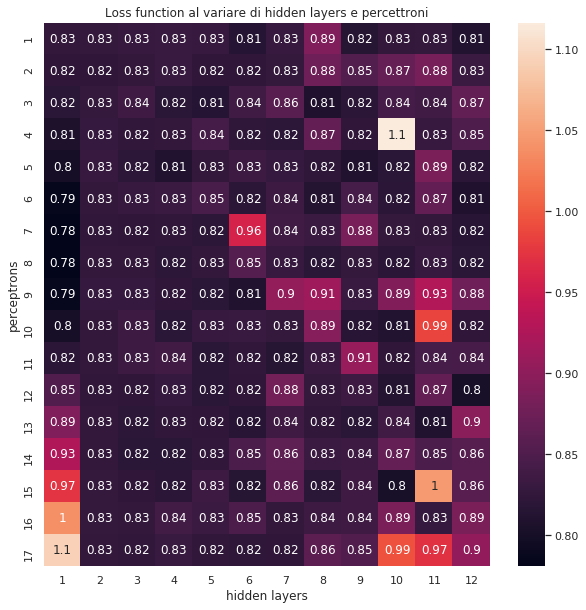

In [24]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(layers_neurons.T, annot=True,xticklabels=layers, yticklabels=neurons)
ax.set_title("Loss function al variare di hidden layers e percettroni")
ax.set_xlabel("hidden layers")
ax.set_ylabel("perceptrons")
plt.show()

Da questa prima analisi si nota come i valori leggermente più bassi di funzione di costo si ottengano nel caso di reti ad un singolo layer contenente più percettroni (6-8). Nelle analisi successive viene fissato a 7 il numero di percettroni per layer (singolo layer)

Successivamente, fissati $N_{HL}$ e $N_{p}$, vengono variate le funzioni di attivazione ed i metodi di discesa del gradiente. Il metro di paragone per stabilire il metodo più performante è il Mean Squared Error:

In [34]:
activation = np.zeros(5)

model = tf.keras.Sequential()

model.add(Dense(7, input_shape=(1,), activation='relu'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
activation[0] = score[0]

for i in range(7):
    model.add(Dense(1, input_shape=(1,), activation='elu'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
activation[1] = score[0]

for i in range(7):
    model.add(Dense(1, input_shape=(1,), activation='softplus'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
activation[2] = score[0]

for i in range(7):
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
activation[3] = score[0]

for i in range(7):
    model.add(Dense(1, input_shape=(1,), activation='tanh'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
activation[4] = score[0]

Epoch 1/90
17/17 [==============================] - 0s 6ms/step - loss: 11.5049 - mse: 11.5049 - val_loss: 11.3533 - val_mse: 11.3533
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 11.0861 - mse: 11.0861 - val_loss: 10.8607 - val_mse: 10.8607
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 10.5597 - mse: 10.5597 - val_loss: 10.3077 - val_mse: 10.3077
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 10.0124 - mse: 10.0124 - val_loss: 9.7343 - val_mse: 9.7343
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 9.4488 - mse: 9.4488 - val_loss: 9.1440 - val_mse: 9.1440
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 8.8568 - mse: 8.8568 - val_loss: 8.5238 - val_mse: 8.5238
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 8.2397 - mse: 8.2397 - val_loss: 7.9012 - val_mse: 7.9012
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 7.62

17/17 [==============================] - 0s 2ms/step - loss: 1.0555 - mse: 1.0555 - val_loss: 0.9747 - val_mse: 0.9747
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0535 - mse: 1.0535 - val_loss: 0.9748 - val_mse: 0.9748
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0536 - mse: 1.0536 - val_loss: 0.9748 - val_mse: 0.9748
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0534 - mse: 1.0534 - val_loss: 0.9747 - val_mse: 0.9747
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0535 - mse: 1.0535 - val_loss: 0.9743 - val_mse: 0.9743
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0535 - mse: 1.0535 - val_loss: 0.9748 - val_mse: 0.9748
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0540 - mse: 1.0540 - val_loss: 0.9748 - val_mse: 0.9748
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0529 - mse: 1.0529 -

17/17 [==============================] - 0s 3ms/step - loss: 1.0589 - mse: 1.0589 - val_loss: 0.9764 - val_mse: 0.9764
Epoch 8/90
17/17 [==============================] - 0s 3ms/step - loss: 1.0581 - mse: 1.0581 - val_loss: 0.9766 - val_mse: 0.9766
Epoch 9/90
17/17 [==============================] - 0s 3ms/step - loss: 1.0587 - mse: 1.0587 - val_loss: 0.9765 - val_mse: 0.9765
Epoch 10/90
17/17 [==============================] - 0s 3ms/step - loss: 1.0572 - mse: 1.0572 - val_loss: 0.9778 - val_mse: 0.9778
Epoch 11/90
17/17 [==============================] - 0s 3ms/step - loss: 1.0570 - mse: 1.0570 - val_loss: 0.9770 - val_mse: 0.9770
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0577 - mse: 1.0577 - val_loss: 0.9773 - val_mse: 0.9773
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0594 - mse: 1.0594 - val_loss: 0.9775 - val_mse: 0.9775
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0586 - mse: 1.0586 - v

17/17 [==============================] - 0s 2ms/step - loss: 6.6573 - mse: 6.6573 - val_loss: 6.6559 - val_mse: 6.6559
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 6.6544 - mse: 6.6544 - val_loss: 6.6531 - val_mse: 6.6531
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 6.6516 - mse: 6.6516 - val_loss: 6.6504 - val_mse: 6.6504
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 6.6490 - mse: 6.6490 - val_loss: 6.6478 - val_mse: 6.6478
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 6.6465 - mse: 6.6465 - val_loss: 6.6454 - val_mse: 6.6454
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 6.6442 - mse: 6.6442 - val_loss: 6.6431 - val_mse: 6.6431
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 6.6419 - mse: 6.6419 - val_loss: 6.6409 - val_mse: 6.6409
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 6.6398 - mse: 6.6398 -

17/17 [==============================] - 0s 3ms/step - loss: 6.6168 - mse: 6.6168 - val_loss: 6.6140 - val_mse: 6.6140
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 6.6120 - mse: 6.6120 - val_loss: 6.6096 - val_mse: 6.6096
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 6.6078 - mse: 6.6078 - val_loss: 6.6057 - val_mse: 6.6057
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 6.6042 - mse: 6.6042 - val_loss: 6.6023 - val_mse: 6.6023
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 6.6011 - mse: 6.6011 - val_loss: 6.5994 - val_mse: 6.5994
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 6.5983 - mse: 6.5983 - val_loss: 6.5967 - val_mse: 6.5967
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 6.5958 - mse: 6.5958 - val_loss: 6.5944 - val_mse: 6.5944
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 6.5936 - mse: 6.5936 -

In [35]:
print('MSE, activation RELU: ', activation[0])
print('MSE, activation ELU: ', activation[1])
print('MSE, activation SOFTPLUS: ', activation[2])
print('MSE, activation SIGMOID: ', activation[3])
print('MSE, activation TANH: ', activation[4])
print('')
print('Best activation function: ELU')

MSE, activation RELU:  0.7845451235771179
MSE, activation ELU:  0.44319018721580505
MSE, activation SOFTPLUS:  0.9765017628669739
MSE, activation SIGMOID:  6.595235824584961
MSE, activation TANH:  6.561872482299805

Best activation function: ELU


In [36]:
opt = np.zeros(5)

model = tf.keras.Sequential()

model.add(Dense(7, input_shape=(1,), activation='elu'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
opt[0] = score[0]


model.compile(optimizer='Adam', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
opt[1] = score[0]


model.compile(optimizer='Adagrad', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
opt[2] = score[0]


model.compile(optimizer='Adadelta', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
opt[3] = score[0]


Epoch 1/90
17/17 [==============================] - 0s 6ms/step - loss: 12.0634 - mse: 12.0634 - val_loss: 11.6003 - val_mse: 11.6003
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 11.1751 - mse: 11.1751 - val_loss: 10.7068 - val_mse: 10.7068
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 10.3020 - mse: 10.3020 - val_loss: 9.8436 - val_mse: 9.8436
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 9.4679 - mse: 9.4679 - val_loss: 9.0379 - val_mse: 9.0379
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 8.6948 - mse: 8.6948 - val_loss: 8.2900 - val_mse: 8.2900
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 7.9826 - mse: 7.9826 - val_loss: 7.6116 - val_mse: 7.6116
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 7.3379 - mse: 7.3379 - val_loss: 6.9960 - val_mse: 6.9960
Epoch 8/90
17/17 [==============================] - 0s 1ms/step - loss: 6.7517 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.8102 - val_mse: 0.8102
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5714 - mse: 0.5714 - val_loss: 0.8109 - val_mse: 0.8109
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.8113 - val_mse: 0.8113
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5711 - mse: 0.5711 - val_loss: 0.8122 - val_mse: 0.8122
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5710 - mse: 0.5710 - val_loss: 0.8126 - val_mse: 0.8126
Epoch 40/90
17/17 [==============================] - 0s 1ms/step - loss: 0.5708 - mse: 0.5708 - val_loss: 0.8133 - val_mse: 0.8133
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5707 - mse: 0.5707 - val_loss: 0.8138 - val_mse: 0.8138
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5707 - mse: 0.5707 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8253 - val_mse: 0.8253
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8253 - val_mse: 0.8253
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8253 - val_mse: 0.8253
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8253 - val_mse: 0.8253
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8253 - val_mse: 0.8253
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8253 - val_mse: 0.8253
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8253 - val_mse: 0.8253
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - v

17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8254 - val_mse: 0.8254
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8254 - val_mse: 0.8254
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8254 - val_mse: 0.8254
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8254 - val_mse: 0.8254
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8254 - val_mse: 0.8254
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8254 - val_mse: 0.8254
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.5695 - val_loss: 0.8254 - val_mse: 0.8254
Epoch 48/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5695 - mse: 0.5695 -

In [39]:
print('MSE, optimizer SGD: ', opt[0])
print('MSE, optimizer ADAM: ', opt[1])
print('MSE, optimizer ADAGRAD: ', opt[2])
print('MSE, optimizer ADADELTA: ', opt[3])
print('')
print('Best optimizer: SGD')

MSE, optimizer SGD:  0.7786334156990051
MSE, optimizer ADAM:  0.8252758979797363
MSE, optimizer ADAGRAD:  0.8253893852233887
MSE, optimizer ADADELTA:  0.8253978490829468

Best optimizer: SGD


Da ultima è fatta variare la funzione di costo, anche in questo caso il metro di paragone per il metodo più performante è il MSE. ELU ed SGD sono stati impostati rispettivamente come funzione di attivazione e metodo di discesa del gradiente

In [44]:
lossf = np.zeros(5)

model = tf.keras.Sequential()

model.add(Dense(7, input_shape=(1,), activation='elu'))

model.compile(optimizer='SGD', loss='mse', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
lossf[0] = score[1]


model.compile(optimizer='SGD', loss='mae', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
lossf[1] = score[1]


model.compile(optimizer='SGD', loss='msle', metrics=['mse'])
history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=30)       
lossf[2] = score[1]


#model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['mse'])
#history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))
#score = model.evaluate(x_valid, y_valid, batch_size=30)       
#lossf[3] = score[1]

Epoch 1/90
17/17 [==============================] - 0s 6ms/step - loss: 11.6249 - mse: 11.6249 - val_loss: 11.1444 - val_mse: 11.1444
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 10.6787 - mse: 10.6787 - val_loss: 10.2161 - val_mse: 10.2161
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 9.7850 - mse: 9.7850 - val_loss: 9.3561 - val_mse: 9.3561
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 8.9620 - mse: 8.9620 - val_loss: 8.5688 - val_mse: 8.5688
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 8.2088 - mse: 8.2088 - val_loss: 7.8527 - val_mse: 7.8527
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 7.5231 - mse: 7.5231 - val_loss: 7.1984 - val_mse: 7.1984
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 6.8964 - mse: 6.8964 - val_loss: 6.6030 - val_mse: 6.6030
Epoch 8/90
17/17 [==============================] - 0s 3ms/step - loss: 6.3262 - m

17/17 [==============================] - 0s 2ms/step - loss: 0.6153 - mse: 0.5732 - val_loss: 0.7059 - val_mse: 0.8154
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6145 - mse: 0.5730 - val_loss: 0.7055 - val_mse: 0.8164
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6136 - mse: 0.5728 - val_loss: 0.7051 - val_mse: 0.8175
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6128 - mse: 0.5727 - val_loss: 0.7046 - val_mse: 0.8185
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6119 - mse: 0.5725 - val_loss: 0.7042 - val_mse: 0.8195
Epoch 40/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6111 - mse: 0.5725 - val_loss: 0.7038 - val_mse: 0.8205
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6103 - mse: 0.5723 - val_loss: 0.7033 - val_mse: 0.8216
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6095 - mse: 0.5721 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0282 - mse: 0.5807 - val_loss: 0.0425 - val_mse: 0.8806
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.5807 - val_loss: 0.0425 - val_mse: 0.8806
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.5807 - val_loss: 0.0425 - val_mse: 0.8806
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.5807 - val_loss: 0.0425 - val_mse: 0.8806
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.5807 - val_loss: 0.0425 - val_mse: 0.8806
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0281 - mse: 0.5807 - val_loss: 0.0425 - val_mse: 0.8806
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0281 - mse: 0.5807 - val_loss: 0.0425 - val_mse: 0.8806
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0281 - mse: 0.5807 - v

In [46]:
print('Loss: mean squared error, accuracy: ', lossf[0])
print('Loss: mean absolute error, accuracy: ', lossf[1])
print('Loss: mean squared logarithmic error, accuracy: ', lossf[2])
#print('Loss: categorical cross-entropy, accuracy: ', lossf[3])
print('')
print('Best losso function: MSE')

Loss: mean squared error, accuracy:  0.7875840067863464
Loss: mean absolute error, accuracy:  0.8805937170982361
Loss: mean squared logarithmic error, accuracy:  0.8807440996170044

Best losso function: MSE


Una volta ottimizzati la funzione di attivazione (ELU), la discesa del gradiente (SGD) e la funzione di costo (mean squared error), vengono fatti variare ancora una volta $N_{HL}$ e $N_{p}$ per vedere se i nuovi parametri hanno portato a miglioramenti sostanziali nell'accuratezza della rete neurale:

In [47]:
layers=np.linspace(1,12,12, dtype=int)
neurons=np.linspace(1,17,17, dtype=int)

layers_neurons = np.zeros((12, 17))

for i in layers:
    for j in neurons:

        model = tf.keras.Sequential()
        for k in range(i):
            model.add(Dense(j, activation='elu'))


        model.compile(optimizer='SGD', loss='mse', metrics=['mse'])


        history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))


        score = model.evaluate(x_valid, y_valid, batch_size=30)
        
        sns.set()
        layers_neurons[i-1][j-1] = score[0]

Epoch 1/90
17/17 [==============================] - 0s 8ms/step - loss: 8.9700 - mse: 8.9700 - val_loss: 6.7107 - val_mse: 6.7107
Epoch 2/90
17/17 [==============================] - 0s 3ms/step - loss: 5.0978 - mse: 5.0978 - val_loss: 3.7770 - val_mse: 3.7770
Epoch 3/90
17/17 [==============================] - 0s 3ms/step - loss: 2.8516 - mse: 2.8516 - val_loss: 2.2985 - val_mse: 2.2985
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 1.7198 - mse: 1.7198 - val_loss: 1.5510 - val_mse: 1.5510
Epoch 5/90
17/17 [==============================] - 0s 3ms/step - loss: 1.1471 - mse: 1.1471 - val_loss: 1.1898 - val_mse: 1.1898
Epoch 6/90
17/17 [==============================] - 0s 3ms/step - loss: 0.8622 - mse: 0.8622 - val_loss: 1.0066 - val_mse: 1.0066
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7169 - mse: 0.7169 - val_loss: 0.9198 - val_mse: 0.9198
Epoch 8/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6456 - mse: 0.64

17/17 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761 - val_loss: 0.8038 - val_mse: 0.8038
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8048 - val_mse: 0.8048
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5748 - mse: 0.5748 - val_loss: 0.8057 - val_mse: 0.8057
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.8065 - val_mse: 0.8065
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5738 - mse: 0.5738 - val_loss: 0.8073 - val_mse: 0.8073
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5733 - mse: 0.5733 - val_loss: 0.8081 - val_mse: 0.8081
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5732 - mse: 0.5732 - val_loss: 0.8088 - val_mse: 0.8088
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5725 - mse: 0.5725 -

17/17 [==============================] - 0s 1ms/step - loss: 3.8568 - mse: 3.8568 - val_loss: 3.4885 - val_mse: 3.4885
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 3.2639 - mse: 3.2639 - val_loss: 2.9693 - val_mse: 2.9693
Epoch 9/90
17/17 [==============================] - 0s 1ms/step - loss: 2.7890 - mse: 2.7890 - val_loss: 2.5494 - val_mse: 2.5494
Epoch 10/90
17/17 [==============================] - 0s 1ms/step - loss: 2.4030 - mse: 2.4030 - val_loss: 2.2094 - val_mse: 2.2094
Epoch 11/90
17/17 [==============================] - 0s 1ms/step - loss: 2.0888 - mse: 2.0888 - val_loss: 1.9367 - val_mse: 1.9367
Epoch 12/90
17/17 [==============================] - 0s 1ms/step - loss: 1.8350 - mse: 1.8350 - val_loss: 1.7186 - val_mse: 1.7186
Epoch 13/90
17/17 [==============================] - 0s 1ms/step - loss: 1.6298 - mse: 1.6298 - val_loss: 1.5427 - val_mse: 1.5427
Epoch 14/90
17/17 [==============================] - 0s 1ms/step - loss: 1.4623 - mse: 1.4623 - v

17/17 [==============================] - 0s 2ms/step - loss: 0.6304 - mse: 0.6304 - val_loss: 0.7942 - val_mse: 0.7942
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6258 - mse: 0.6258 - val_loss: 0.7927 - val_mse: 0.7927
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6217 - mse: 0.6217 - val_loss: 0.7915 - val_mse: 0.7915
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6180 - mse: 0.6180 - val_loss: 0.7907 - val_mse: 0.7907
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6147 - mse: 0.6147 - val_loss: 0.7900 - val_mse: 0.7900
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6116 - mse: 0.6116 - val_loss: 0.7895 - val_mse: 0.7895
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6088 - mse: 0.6088 - val_loss: 0.7891 - val_mse: 0.7891
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6062 - mse: 0.6062 -

17/17 [==============================] - 0s 2ms/step - loss: 3.0684 - mse: 3.0684 - val_loss: 2.9059 - val_mse: 2.9059
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 2.7837 - mse: 2.7837 - val_loss: 2.6439 - val_mse: 2.6439
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 2.5342 - mse: 2.5342 - val_loss: 2.4136 - val_mse: 2.4136
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3140 - mse: 2.3140 - val_loss: 2.2117 - val_mse: 2.2117
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1203 - mse: 2.1203 - val_loss: 2.0355 - val_mse: 2.0355
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9505 - mse: 1.9505 - val_loss: 1.8803 - val_mse: 1.8803
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 1.8004 - mse: 1.8004 - val_loss: 1.7457 - val_mse: 1.7457
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 1.6695 - mse: 1.6695 -

17/17 [==============================] - 0s 2ms/step - loss: 0.7026 - mse: 0.7026 - val_loss: 0.8304 - val_mse: 0.8304
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6935 - mse: 0.6935 - val_loss: 0.8244 - val_mse: 0.8244
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6852 - mse: 0.6852 - val_loss: 0.8191 - val_mse: 0.8191
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6777 - mse: 0.6777 - val_loss: 0.8144 - val_mse: 0.8144
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6708 - mse: 0.6708 - val_loss: 0.8102 - val_mse: 0.8102
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6644 - mse: 0.6644 - val_loss: 0.8064 - val_mse: 0.8064
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6585 - mse: 0.6585 - val_loss: 0.8031 - val_mse: 0.8031
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6531 - mse: 0.6531 -

17/17 [==============================] - 0s 2ms/step - loss: 2.6589 - mse: 2.6589 - val_loss: 2.6055 - val_mse: 2.6055
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4779 - mse: 2.4779 - val_loss: 2.4358 - val_mse: 2.4358
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3128 - mse: 2.3128 - val_loss: 2.2816 - val_mse: 2.2816
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1624 - mse: 2.1624 - val_loss: 2.1429 - val_mse: 2.1429
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0268 - mse: 2.0268 - val_loss: 2.0165 - val_mse: 2.0165
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9029 - mse: 1.9029 - val_loss: 1.9012 - val_mse: 1.9012
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 1.7897 - mse: 1.7897 - val_loss: 1.7970 - val_mse: 1.7970
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 1.6869 - mse: 1.6869 -

Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7790 - mse: 0.7790 - val_loss: 0.9016 - val_mse: 0.9016
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7662 - mse: 0.7662 - val_loss: 0.8912 - val_mse: 0.8912
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7541 - mse: 0.7541 - val_loss: 0.8818 - val_mse: 0.8818
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7431 - mse: 0.7431 - val_loss: 0.8730 - val_mse: 0.8730
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7326 - mse: 0.7326 - val_loss: 0.8649 - val_mse: 0.8649
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7228 - mse: 0.7228 - val_loss: 0.8578 - val_mse: 0.8578
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7140 - mse: 0.7140 - val_loss: 0.8512 - val_mse: 0.8512
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7058 - m

Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 2.6091 - mse: 2.6091 - val_loss: 2.5622 - val_mse: 2.5622
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4729 - mse: 2.4729 - val_loss: 2.4341 - val_mse: 2.4341
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3472 - mse: 2.3472 - val_loss: 2.3142 - val_mse: 2.3142
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2292 - mse: 2.2292 - val_loss: 2.2033 - val_mse: 2.2033
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1201 - mse: 2.1201 - val_loss: 2.1005 - val_mse: 2.1005
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0185 - mse: 2.0185 - val_loss: 2.0056 - val_mse: 2.0056
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9246 - mse: 1.9246 - val_loss: 1.9171 - val_mse: 1.9171
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 1.8370 - m

Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8969 - mse: 0.8969 - val_loss: 0.9844 - val_mse: 0.9844
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8806 - mse: 0.8806 - val_loss: 0.9704 - val_mse: 0.9704
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8651 - mse: 0.8651 - val_loss: 0.9572 - val_mse: 0.9572
Epoch 62/90
17/17 [==============================] - 0s 1ms/step - loss: 0.8505 - mse: 0.8505 - val_loss: 0.9450 - val_mse: 0.9450
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8367 - mse: 0.8367 - val_loss: 0.9334 - val_mse: 0.9334
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8236 - mse: 0.8236 - val_loss: 0.9227 - val_mse: 0.9227
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8113 - mse: 0.8113 - val_loss: 0.9127 - val_mse: 0.9127
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7998 - m

Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 2.5132 - mse: 2.5132 - val_loss: 2.4940 - val_mse: 2.4940
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4061 - mse: 2.4061 - val_loss: 2.3918 - val_mse: 2.3918
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3050 - mse: 2.3050 - val_loss: 2.2950 - val_mse: 2.2950
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2092 - mse: 2.2092 - val_loss: 2.2042 - val_mse: 2.2042
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1191 - mse: 2.1191 - val_loss: 2.1188 - val_mse: 2.1188
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0343 - mse: 2.0343 - val_loss: 2.0385 - val_mse: 2.0385
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9544 - mse: 1.9544 - val_loss: 1.9632 - val_mse: 1.9632
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 1.8794 - m

Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 10.8372 - mse: 10.8372 - val_loss: 10.5710 - val_mse: 10.5710
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 10.3040 - mse: 10.3040 - val_loss: 10.0440 - val_mse: 10.0440
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 9.7899 - mse: 9.7899 - val_loss: 9.5407 - val_mse: 9.5407
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 9.3001 - mse: 9.3001 - val_loss: 9.0641 - val_mse: 9.0641
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 8.8368 - mse: 8.8368 - val_loss: 8.6118 - val_mse: 8.6118
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 8.3973 - mse: 8.3973 - val_loss: 8.1843 - val_mse: 8.1843
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 7.9818 - mse: 7.9818 - val_loss: 7.7783 - val_mse: 7.7783
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 7.5869 - 

Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4708 - mse: 2.4708 - val_loss: 2.4589 - val_mse: 2.4589
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3813 - mse: 2.3813 - val_loss: 2.3736 - val_mse: 2.3736
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2966 - mse: 2.2966 - val_loss: 2.2926 - val_mse: 2.2926
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2160 - mse: 2.2160 - val_loss: 2.2155 - val_mse: 2.2155
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1393 - mse: 2.1393 - val_loss: 2.1420 - val_mse: 2.1420
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0660 - mse: 2.0660 - val_loss: 2.0725 - val_mse: 2.0725
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9967 - mse: 1.9967 - val_loss: 2.0070 - val_mse: 2.0070
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9312 - m

Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 8.5514 - mse: 8.5514 - val_loss: 8.3640 - val_mse: 8.3640
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 8.1886 - mse: 8.1886 - val_loss: 8.0093 - val_mse: 8.0093
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 7.8429 - mse: 7.8429 - val_loss: 7.6699 - val_mse: 7.6699
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 7.5119 - mse: 7.5119 - val_loss: 7.3465 - val_mse: 7.3465
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 7.1966 - mse: 7.1966 - val_loss: 7.0392 - val_mse: 7.0392
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 6.8967 - mse: 6.8967 - val_loss: 6.7461 - val_mse: 6.7461
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 6.6107 - mse: 6.6107 - val_loss: 6.4661 - val_mse: 6.4661
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 6.3373 - ms

Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4764 - mse: 2.4764 - val_loss: 2.4615 - val_mse: 2.4615
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3993 - mse: 2.3993 - val_loss: 2.3875 - val_mse: 2.3875
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3256 - mse: 2.3256 - val_loss: 2.3165 - val_mse: 2.3165
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2549 - mse: 2.2549 - val_loss: 2.2488 - val_mse: 2.2488
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1873 - mse: 2.1873 - val_loss: 2.1841 - val_mse: 2.1841
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 2.1226 - mse: 2.1226 - val_loss: 2.1222 - val_mse: 2.1222
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0608 - mse: 2.0608 - val_loss: 2.0630 - val_mse: 2.0630
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0015 - m

Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 7.0399 - mse: 7.0399 - val_loss: 6.9111 - val_mse: 6.9111
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 6.7803 - mse: 6.7803 - val_loss: 6.6574 - val_mse: 6.6574
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 6.5319 - mse: 6.5319 - val_loss: 6.4154 - val_mse: 6.4154
Epoch 18/90
17/17 [==============================] - 0s 1ms/step - loss: 6.2946 - mse: 6.2946 - val_loss: 6.1825 - val_mse: 6.1825
Epoch 19/90
17/17 [==============================] - 0s 1ms/step - loss: 6.0663 - mse: 6.0663 - val_loss: 5.9584 - val_mse: 5.9584
Epoch 20/90
17/17 [==============================] - 0s 1ms/step - loss: 5.8466 - mse: 5.8466 - val_loss: 5.7442 - val_mse: 5.7442
Epoch 21/90
17/17 [==============================] - 0s 1ms/step - loss: 5.6366 - mse: 5.6366 - val_loss: 5.5394 - val_mse: 5.5394
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 5.4356 - m

Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 2.4610 - mse: 2.4610 - val_loss: 2.4439 - val_mse: 2.4439
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3939 - mse: 2.3939 - val_loss: 2.3792 - val_mse: 2.3792
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 2.3293 - mse: 2.3293 - val_loss: 2.3168 - val_mse: 2.3168
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2670 - mse: 2.2670 - val_loss: 2.2571 - val_mse: 2.2571
Epoch 53/90
17/17 [==============================] - 0s 3ms/step - loss: 2.2074 - mse: 2.2074 - val_loss: 2.1991 - val_mse: 2.1991
Epoch 54/90
17/17 [==============================] - 0s 3ms/step - loss: 2.1494 - mse: 2.1494 - val_loss: 2.1436 - val_mse: 2.1436
Epoch 55/90
17/17 [==============================] - 0s 3ms/step - loss: 2.0938 - mse: 2.0938 - val_loss: 2.0902 - val_mse: 2.0902
Epoch 56/90
17/17 [==============================] - 0s 3ms/step - loss: 2.0403 - m

Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5715 - mse: 0.5715 - val_loss: 0.8235 - val_mse: 0.8235
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5708 - mse: 0.5708 - val_loss: 0.8281 - val_mse: 0.8281
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5706 - mse: 0.5706 - val_loss: 0.8239 - val_mse: 0.8239
Epoch 24/90
17/17 [==============================] - 0s 1ms/step - loss: 0.5702 - mse: 0.5702 - val_loss: 0.8268 - val_mse: 0.8268
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5706 - mse: 0.5706 - val_loss: 0.8225 - val_mse: 0.8225
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5706 - mse: 0.5706 - val_loss: 0.8277 - val_mse: 0.8277
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5721 - mse: 0.5721 - val_loss: 0.8241 - val_mse: 0.8241
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5721 - m

Epoch 55/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3527 - mse: 0.3527 - val_loss: 0.5333 - val_mse: 0.5333
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3522 - mse: 0.3522 - val_loss: 0.5324 - val_mse: 0.5324
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3513 - mse: 0.3513 - val_loss: 0.5312 - val_mse: 0.5312
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3509 - mse: 0.3509 - val_loss: 0.5302 - val_mse: 0.5302
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3502 - mse: 0.3502 - val_loss: 0.5291 - val_mse: 0.5291
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3494 - mse: 0.3494 - val_loss: 0.5280 - val_mse: 0.5280
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3488 - mse: 0.3488 - val_loss: 0.5269 - val_mse: 0.5269
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3480 - m

Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5455 - mse: 0.5455 - val_loss: 0.7963 - val_mse: 0.7963
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5448 - mse: 0.5448 - val_loss: 0.7941 - val_mse: 0.7941
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5430 - mse: 0.5430 - val_loss: 0.7921 - val_mse: 0.7921
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5418 - mse: 0.5418 - val_loss: 0.7918 - val_mse: 0.7918
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5412 - mse: 0.5412 - val_loss: 0.7903 - val_mse: 0.7903
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5393 - mse: 0.5393 - val_loss: 0.7902 - val_mse: 0.7902
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5381 - mse: 0.5381 - val_loss: 0.7899 - val_mse: 0.7899
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5372 - m

17/17 [==============================] - 0s 2ms/step - loss: 0.4676 - mse: 0.4676 - val_loss: 0.6960 - val_mse: 0.6960
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4658 - mse: 0.4658 - val_loss: 0.6926 - val_mse: 0.6926
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4640 - mse: 0.4640 - val_loss: 0.6934 - val_mse: 0.6934
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4627 - mse: 0.4627 - val_loss: 0.6898 - val_mse: 0.6898
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4610 - mse: 0.4610 - val_loss: 0.6868 - val_mse: 0.6868
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4597 - mse: 0.4597 - val_loss: 0.6843 - val_mse: 0.6843
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4577 - mse: 0.4577 - val_loss: 0.6815 - val_mse: 0.6815
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4563 - mse: 0.4563 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5243 - mse: 0.5243 - val_loss: 0.7570 - val_mse: 0.7570
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5230 - mse: 0.5230 - val_loss: 0.7545 - val_mse: 0.7545
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5214 - mse: 0.5214 - val_loss: 0.7532 - val_mse: 0.7532
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5216 - mse: 0.5216 - val_loss: 0.7519 - val_mse: 0.7519
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5190 - mse: 0.5190 - val_loss: 0.7511 - val_mse: 0.7511
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5180 - mse: 0.5180 - val_loss: 0.7504 - val_mse: 0.7504
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5166 - mse: 0.5166 - val_loss: 0.7492 - val_mse: 0.7492
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5152 - mse: 0.5152 -

Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 5.0445 - mse: 5.0445 - val_loss: 4.0426 - val_mse: 4.0426
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 3.2700 - mse: 3.2700 - val_loss: 2.4870 - val_mse: 2.4870
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9531 - mse: 1.9531 - val_loss: 1.5165 - val_mse: 1.5165
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 1.2021 - mse: 1.2021 - val_loss: 1.0508 - val_mse: 1.0508
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8553 - mse: 0.8553 - val_loss: 0.8739 - val_mse: 0.8739
Epoch 10/90
17/17 [==============================] - 0s 1ms/step - loss: 0.7156 - mse: 0.7156 - val_loss: 0.8170 - val_mse: 0.8170
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6595 - mse: 0.6595 - val_loss: 0.7972 - val_mse: 0.7972
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6296 - mse: 0

17/17 [==============================] - 0s 2ms/step - loss: 0.5755 - mse: 0.5755 - val_loss: 0.8297 - val_mse: 0.8297
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5750 - mse: 0.5750 - val_loss: 0.8300 - val_mse: 0.8300
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5747 - mse: 0.5747 - val_loss: 0.8303 - val_mse: 0.8303
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.8303 - val_mse: 0.8303
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5745 - mse: 0.5745 - val_loss: 0.8305 - val_mse: 0.8305
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.8295 - val_mse: 0.8295
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5741 - mse: 0.5741 - val_loss: 0.8300 - val_mse: 0.8300
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5743 - mse: 0.5743 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6421 - mse: 0.6421 - val_loss: 0.8057 - val_mse: 0.8057
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6170 - mse: 0.6170 - val_loss: 0.7991 - val_mse: 0.7991
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6026 - mse: 0.6026 - val_loss: 0.7967 - val_mse: 0.7967
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5938 - mse: 0.5938 - val_loss: 0.7971 - val_mse: 0.7971
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5867 - mse: 0.5867 - val_loss: 0.7973 - val_mse: 0.7973
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5822 - mse: 0.5822 - val_loss: 0.7978 - val_mse: 0.7978
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5781 - mse: 0.5781 - val_loss: 0.7984 - val_mse: 0.7984
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5746 - mse: 0.5746 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5279 - mse: 0.5279 - val_loss: 0.7680 - val_mse: 0.7680
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5270 - mse: 0.5270 - val_loss: 0.7679 - val_mse: 0.7679
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5267 - mse: 0.5267 - val_loss: 0.7676 - val_mse: 0.7676
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5257 - mse: 0.5257 - val_loss: 0.7662 - val_mse: 0.7662
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5252 - mse: 0.5252 - val_loss: 0.7659 - val_mse: 0.7659
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5243 - mse: 0.5243 - val_loss: 0.7662 - val_mse: 0.7662
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5239 - mse: 0.5239 - val_loss: 0.7655 - val_mse: 0.7655
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5230 - mse: 0.5230 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5777 - mse: 0.5777 - val_loss: 0.8054 - val_mse: 0.8054
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5762 - mse: 0.5762 - val_loss: 0.8074 - val_mse: 0.8074
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8101 - val_mse: 0.8101
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5744 - mse: 0.5744 - val_loss: 0.8108 - val_mse: 0.8108
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.8111 - val_mse: 0.8111
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5741 - mse: 0.5741 - val_loss: 0.8127 - val_mse: 0.8127
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5733 - mse: 0.5733 - val_loss: 0.8143 - val_mse: 0.8143
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5730 - mse: 0.5730 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5578 - mse: 0.5578 - val_loss: 0.8085 - val_mse: 0.8085
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5575 - mse: 0.5575 - val_loss: 0.8078 - val_mse: 0.8078
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5569 - mse: 0.5569 - val_loss: 0.8070 - val_mse: 0.8070
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5572 - mse: 0.5572 - val_loss: 0.8066 - val_mse: 0.8066
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5569 - mse: 0.5569 - val_loss: 0.8061 - val_mse: 0.8061
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5565 - mse: 0.5565 - val_loss: 0.8065 - val_mse: 0.8065
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5558 - mse: 0.5558 - val_loss: 0.8070 - val_mse: 0.8070
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5559 - mse: 0.5559 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5738 - mse: 0.5738 - val_loss: 0.7821 - val_mse: 0.7821
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5709 - mse: 0.5709 - val_loss: 0.7836 - val_mse: 0.7836
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5686 - mse: 0.5686 - val_loss: 0.7846 - val_mse: 0.7846
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5664 - mse: 0.5664 - val_loss: 0.7865 - val_mse: 0.7865
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5643 - mse: 0.5643 - val_loss: 0.7872 - val_mse: 0.7872
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5627 - mse: 0.5627 - val_loss: 0.7880 - val_mse: 0.7880
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5612 - mse: 0.5612 - val_loss: 0.7888 - val_mse: 0.7888
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5598 - mse: 0.5598 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5498 - mse: 0.5498 - val_loss: 0.7958 - val_mse: 0.7958
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5497 - mse: 0.5497 - val_loss: 0.7948 - val_mse: 0.7948
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5490 - mse: 0.5490 - val_loss: 0.7931 - val_mse: 0.7931
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5485 - mse: 0.5485 - val_loss: 0.7935 - val_mse: 0.7935
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5480 - mse: 0.5480 - val_loss: 0.7930 - val_mse: 0.7930
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5479 - mse: 0.5479 - val_loss: 0.7923 - val_mse: 0.7923
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5476 - mse: 0.5476 - val_loss: 0.7926 - val_mse: 0.7926
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5469 - mse: 0.5469 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5779 - mse: 0.5779 - val_loss: 0.8138 - val_mse: 0.8138
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5770 - mse: 0.5770 - val_loss: 0.8146 - val_mse: 0.8146
Epoch 31/90
17/17 [==============================] - 0s 1ms/step - loss: 0.5764 - mse: 0.5764 - val_loss: 0.8144 - val_mse: 0.8144
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5759 - mse: 0.5759 - val_loss: 0.8149 - val_mse: 0.8149
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5755 - mse: 0.5755 - val_loss: 0.8160 - val_mse: 0.8160
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.8157 - val_mse: 0.8157
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5750 - mse: 0.5750 - val_loss: 0.8165 - val_mse: 0.8165
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5743 - mse: 0.5743 -

17/17 [==============================] - 0s 7ms/step - loss: 11.6677 - mse: 11.6677 - val_loss: 11.0707 - val_mse: 11.0707
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 10.4924 - mse: 10.4924 - val_loss: 9.8533 - val_mse: 9.8533
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 9.2283 - mse: 9.2283 - val_loss: 8.5140 - val_mse: 8.5140
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 7.8245 - mse: 7.8245 - val_loss: 7.0312 - val_mse: 7.0312
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 6.2992 - mse: 6.2992 - val_loss: 5.4674 - val_mse: 5.4674
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 4.7537 - mse: 4.7537 - val_loss: 3.9783 - val_mse: 3.9783
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 3.3593 - mse: 3.3593 - val_loss: 2.7474 - val_mse: 2.7474
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 2.2748 - mse: 2.2748 - 

17/17 [==============================] - 0s 2ms/step - loss: 0.5611 - mse: 0.5611 - val_loss: 0.8043 - val_mse: 0.8043
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5608 - mse: 0.5608 - val_loss: 0.8036 - val_mse: 0.8036
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5602 - mse: 0.5602 - val_loss: 0.8036 - val_mse: 0.8036
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5598 - mse: 0.5598 - val_loss: 0.8028 - val_mse: 0.8028
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5599 - mse: 0.5599 - val_loss: 0.8044 - val_mse: 0.8044
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5593 - mse: 0.5593 - val_loss: 0.8042 - val_mse: 0.8042
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5591 - mse: 0.5591 - val_loss: 0.8041 - val_mse: 0.8041
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5582 - mse: 0.5582 -

Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 8.1654 - mse: 8.1654 - val_loss: 7.6625 - val_mse: 7.6625
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 7.1539 - mse: 7.1539 - val_loss: 6.5773 - val_mse: 6.5773
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 6.0135 - mse: 6.0135 - val_loss: 5.3926 - val_mse: 5.3926
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 4.8072 - mse: 4.8072 - val_loss: 4.1933 - val_mse: 4.1933
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 3.6367 - mse: 3.6367 - val_loss: 3.1007 - val_mse: 3.1007
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 2.6205 - mse: 2.6205 - val_loss: 2.2217 - val_mse: 2.2217
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 1.8413 - mse: 1.8413 - val_loss: 1.6036 - val_mse: 1.6036
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 1.3122 - mse:

17/17 [==============================] - 0s 2ms/step - loss: 0.3633 - mse: 0.3633 - val_loss: 0.5425 - val_mse: 0.5425
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3637 - mse: 0.3637 - val_loss: 0.5426 - val_mse: 0.5426
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3633 - mse: 0.3633 - val_loss: 0.5429 - val_mse: 0.5429
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3627 - mse: 0.3627 - val_loss: 0.5416 - val_mse: 0.5416
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3629 - mse: 0.3629 - val_loss: 0.5413 - val_mse: 0.5413
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3628 - mse: 0.3628 - val_loss: 0.5424 - val_mse: 0.5424
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3624 - mse: 0.3624 - val_loss: 0.5421 - val_mse: 0.5421
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3629 - mse: 0.3629 -

17/17 [==============================] - 0s 3ms/step - loss: 0.4513 - mse: 0.4513 - val_loss: 0.6661 - val_mse: 0.6661
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4495 - mse: 0.4495 - val_loss: 0.6637 - val_mse: 0.6637
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4472 - mse: 0.4472 - val_loss: 0.6669 - val_mse: 0.6669
Epoch 16/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4457 - mse: 0.4457 - val_loss: 0.6609 - val_mse: 0.6609
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4449 - mse: 0.4449 - val_loss: 0.6586 - val_mse: 0.6586
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4414 - mse: 0.4414 - val_loss: 0.6576 - val_mse: 0.6576
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4395 - mse: 0.4395 - val_loss: 0.6532 - val_mse: 0.6532
Epoch 20/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4376 - mse: 0.4376 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3302 - mse: 0.3302 - val_loss: 0.5001 - val_mse: 0.5001
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3277 - mse: 0.3277 - val_loss: 0.4943 - val_mse: 0.4943
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3255 - mse: 0.3255 - val_loss: 0.4919 - val_mse: 0.4919
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3239 - mse: 0.3239 - val_loss: 0.4892 - val_mse: 0.4892
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3213 - mse: 0.3213 - val_loss: 0.4859 - val_mse: 0.4859
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3197 - mse: 0.3197 - val_loss: 0.4827 - val_mse: 0.4827
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3167 - mse: 0.3167 - val_loss: 0.4802 - val_mse: 0.4802
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3144 - mse: 0.3144 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4943 - mse: 0.4943 - val_loss: 0.7302 - val_mse: 0.7302
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4917 - mse: 0.4917 - val_loss: 0.7229 - val_mse: 0.7229
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4895 - mse: 0.4895 - val_loss: 0.7241 - val_mse: 0.7241
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4856 - mse: 0.4856 - val_loss: 0.7182 - val_mse: 0.7182
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4812 - mse: 0.4812 - val_loss: 0.7187 - val_mse: 0.7187
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4803 - mse: 0.4803 - val_loss: 0.7113 - val_mse: 0.7113
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4762 - mse: 0.4762 - val_loss: 0.7065 - val_mse: 0.7065
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4740 - mse: 0.4740 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3395 - mse: 0.3395 - val_loss: 0.5124 - val_mse: 0.5124
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3374 - mse: 0.3374 - val_loss: 0.5073 - val_mse: 0.5073
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3347 - mse: 0.3347 - val_loss: 0.5008 - val_mse: 0.5008
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3328 - mse: 0.3328 - val_loss: 0.4993 - val_mse: 0.4993
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3299 - mse: 0.3299 - val_loss: 0.4934 - val_mse: 0.4934
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3279 - mse: 0.3279 - val_loss: 0.4908 - val_mse: 0.4908
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3260 - mse: 0.3260 - val_loss: 0.4874 - val_mse: 0.4874
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3232 - mse: 0.3232 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4132 - mse: 0.4132 - val_loss: 0.6202 - val_mse: 0.6202
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4104 - mse: 0.4104 - val_loss: 0.6195 - val_mse: 0.6195
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4085 - mse: 0.4085 - val_loss: 0.6179 - val_mse: 0.6179
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4074 - mse: 0.4074 - val_loss: 0.6154 - val_mse: 0.6154
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4047 - mse: 0.4047 - val_loss: 0.6095 - val_mse: 0.6095
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4029 - mse: 0.4029 - val_loss: 0.6082 - val_mse: 0.6082
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4009 - mse: 0.4009 - val_loss: 0.6050 - val_mse: 0.6050
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3994 - mse: 0.3994 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3125 - mse: 0.3125 - val_loss: 0.4589 - val_mse: 0.4589
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3102 - mse: 0.3102 - val_loss: 0.4558 - val_mse: 0.4558
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3054 - mse: 0.3054 - val_loss: 0.4468 - val_mse: 0.4468
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3013 - mse: 0.3013 - val_loss: 0.4446 - val_mse: 0.4446
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2993 - mse: 0.2993 - val_loss: 0.4386 - val_mse: 0.4386
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2957 - mse: 0.2957 - val_loss: 0.4276 - val_mse: 0.4276
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2932 - mse: 0.2932 - val_loss: 0.4214 - val_mse: 0.4214
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2889 - mse: 0.2889 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5313 - mse: 0.5313 - val_loss: 0.7805 - val_mse: 0.7805
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5296 - mse: 0.5296 - val_loss: 0.7744 - val_mse: 0.7744
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5270 - mse: 0.5270 - val_loss: 0.7797 - val_mse: 0.7797
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5276 - mse: 0.5276 - val_loss: 0.7783 - val_mse: 0.7783
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5265 - mse: 0.5265 - val_loss: 0.7757 - val_mse: 0.7757
Epoch 36/90
17/17 [==============================] - 0s 1ms/step - loss: 0.5269 - mse: 0.5269 - val_loss: 0.7703 - val_mse: 0.7703
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5244 - mse: 0.5244 - val_loss: 0.7740 - val_mse: 0.7740
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5223 - mse: 0.5223 -

17/17 [==============================] - 0s 2ms/step - loss: 5.1227 - mse: 5.1227 - val_loss: 3.2134 - val_mse: 3.2134
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9851 - mse: 1.9851 - val_loss: 1.2581 - val_mse: 1.2581
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8457 - mse: 0.8457 - val_loss: 0.8910 - val_mse: 0.8910
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6271 - mse: 0.6271 - val_loss: 0.8193 - val_mse: 0.8193
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5748 - mse: 0.5748 - val_loss: 0.8066 - val_mse: 0.8066
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5617 - mse: 0.5617 - val_loss: 0.8013 - val_mse: 0.8013
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5549 - mse: 0.5549 - val_loss: 0.7950 - val_mse: 0.7950
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5536 - mse: 0.5536 - val_l

17/17 [==============================] - 0s 2ms/step - loss: 0.5323 - mse: 0.5323 - val_loss: 0.7763 - val_mse: 0.7763
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5303 - mse: 0.5303 - val_loss: 0.7730 - val_mse: 0.7730
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5293 - mse: 0.5293 - val_loss: 0.7728 - val_mse: 0.7728
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5288 - mse: 0.5288 - val_loss: 0.7664 - val_mse: 0.7664
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5274 - mse: 0.5274 - val_loss: 0.7721 - val_mse: 0.7721
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5232 - mse: 0.5232 - val_loss: 0.7616 - val_mse: 0.7616
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5224 - mse: 0.5224 - val_loss: 0.7650 - val_mse: 0.7650
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5221 - mse: 0.5221 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5701 - mse: 0.5701 - val_loss: 0.7825 - val_mse: 0.7825
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5623 - mse: 0.5623 - val_loss: 0.7811 - val_mse: 0.7811
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5571 - mse: 0.5571 - val_loss: 0.7827 - val_mse: 0.7827
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5521 - mse: 0.5521 - val_loss: 0.7901 - val_mse: 0.7901
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5490 - mse: 0.5490 - val_loss: 0.7838 - val_mse: 0.7838
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5454 - mse: 0.5454 - val_loss: 0.7809 - val_mse: 0.7809
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5423 - mse: 0.5423 - val_loss: 0.7844 - val_mse: 0.7844
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5423 - mse: 0.5423 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4337 - mse: 0.4337 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4311 - mse: 0.4311 - val_loss: 0.6365 - val_mse: 0.6365
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4273 - mse: 0.4273 - val_loss: 0.6302 - val_mse: 0.6302
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4249 - mse: 0.4249 - val_loss: 0.6268 - val_mse: 0.6268
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4218 - mse: 0.4218 - val_loss: 0.6253 - val_mse: 0.6253
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4183 - mse: 0.4183 - val_loss: 0.6212 - val_mse: 0.6212
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4165 - mse: 0.4165 - val_loss: 0.6126 - val_mse: 0.6126
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4126 - mse: 0.4126 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5354 - mse: 0.5354 - val_loss: 0.7637 - val_mse: 0.7637
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5322 - mse: 0.5322 - val_loss: 0.7663 - val_mse: 0.7663
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5289 - mse: 0.5289 - val_loss: 0.7658 - val_mse: 0.7658
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5283 - mse: 0.5283 - val_loss: 0.7651 - val_mse: 0.7651
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5256 - mse: 0.5256 - val_loss: 0.7640 - val_mse: 0.7640
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5237 - mse: 0.5237 - val_loss: 0.7652 - val_mse: 0.7652
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5215 - mse: 0.5215 - val_loss: 0.7582 - val_mse: 0.7582
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5201 - mse: 0.5201 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4912 - mse: 0.4912 - val_loss: 0.7219 - val_mse: 0.7219
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4901 - mse: 0.4901 - val_loss: 0.7204 - val_mse: 0.7204
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4875 - mse: 0.4875 - val_loss: 0.7180 - val_mse: 0.7180
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4876 - mse: 0.4876 - val_loss: 0.7147 - val_mse: 0.7147
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4849 - mse: 0.4849 - val_loss: 0.7115 - val_mse: 0.7115
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4830 - mse: 0.4830 - val_loss: 0.7109 - val_mse: 0.7109
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4807 - mse: 0.4807 - val_loss: 0.7044 - val_mse: 0.7044
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4805 - mse: 0.4805 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5050 - mse: 0.5050 - val_loss: 0.7429 - val_mse: 0.7429
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5036 - mse: 0.5036 - val_loss: 0.7406 - val_mse: 0.7406
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5024 - mse: 0.5024 - val_loss: 0.7341 - val_mse: 0.7341
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5009 - mse: 0.5009 - val_loss: 0.7344 - val_mse: 0.7344
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4993 - mse: 0.4993 - val_loss: 0.7327 - val_mse: 0.7327
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4974 - mse: 0.4974 - val_loss: 0.7328 - val_mse: 0.7328
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4955 - mse: 0.4955 - val_loss: 0.7281 - val_mse: 0.7281
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4952 - mse: 0.4952 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4500 - mse: 0.4500 - val_loss: 0.6717 - val_mse: 0.6717
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4478 - mse: 0.4478 - val_loss: 0.6656 - val_mse: 0.6656
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4459 - mse: 0.4459 - val_loss: 0.6611 - val_mse: 0.6611
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4434 - mse: 0.4434 - val_loss: 0.6549 - val_mse: 0.6549
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4411 - mse: 0.4411 - val_loss: 0.6549 - val_mse: 0.6549
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4392 - mse: 0.4392 - val_loss: 0.6538 - val_mse: 0.6538
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4364 - mse: 0.4364 - val_loss: 0.6510 - val_mse: 0.6510
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4343 - mse: 0.4343 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5380 - mse: 0.5380 - val_loss: 0.7811 - val_mse: 0.7811
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5362 - mse: 0.5362 - val_loss: 0.7813 - val_mse: 0.7813
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5350 - mse: 0.5350 - val_loss: 0.7835 - val_mse: 0.7835
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5338 - mse: 0.5338 - val_loss: 0.7816 - val_mse: 0.7816
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5332 - mse: 0.5332 - val_loss: 0.7816 - val_mse: 0.7816
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5321 - mse: 0.5321 - val_loss: 0.7816 - val_mse: 0.7816
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5311 - mse: 0.5311 - val_loss: 0.7737 - val_mse: 0.7737
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5293 - mse: 0.5293 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3386 - mse: 0.3386 - val_loss: 0.5072 - val_mse: 0.5072
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3379 - mse: 0.3379 - val_loss: 0.5094 - val_mse: 0.5094
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3386 - mse: 0.3386 - val_loss: 0.5054 - val_mse: 0.5054
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3383 - mse: 0.3383 - val_loss: 0.5069 - val_mse: 0.5069
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3381 - mse: 0.3381 - val_loss: 0.5060 - val_mse: 0.5060
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3382 - mse: 0.3382 - val_loss: 0.5059 - val_mse: 0.5059
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3382 - mse: 0.3382 - val_loss: 0.5050 - val_mse: 0.5050
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3375 - mse: 0.3375 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3784 - mse: 0.3784 - val_loss: 0.5975 - val_mse: 0.5975
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3783 - mse: 0.3783 - val_loss: 0.5903 - val_mse: 0.5903
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3748 - mse: 0.3748 - val_loss: 0.6026 - val_mse: 0.6026
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3754 - mse: 0.3754 - val_loss: 0.5700 - val_mse: 0.5700
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3697 - mse: 0.3697 - val_loss: 0.5563 - val_mse: 0.5563
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3672 - mse: 0.3672 - val_loss: 0.5589 - val_mse: 0.5589
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3610 - mse: 0.3610 - val_loss: 0.5542 - val_mse: 0.5542
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3694 - mse: 0.3694 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5022 - mse: 0.5022 - val_loss: 0.7207 - val_mse: 0.7207
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4976 - mse: 0.4976 - val_loss: 0.7166 - val_mse: 0.7166
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4844 - mse: 0.4844 - val_loss: 0.7075 - val_mse: 0.7075
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4779 - mse: 0.4779 - val_loss: 0.7113 - val_mse: 0.7113
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4778 - mse: 0.4778 - val_loss: 0.7275 - val_mse: 0.7275
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4655 - mse: 0.4655 - val_loss: 0.6826 - val_mse: 0.6826
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4634 - mse: 0.4634 - val_loss: 0.6728 - val_mse: 0.6728
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4579 - mse: 0.4579 - val

17/17 [==============================] - 0s 2ms/step - loss: 0.2050 - mse: 0.2050 - val_loss: 0.2820 - val_mse: 0.2820
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2007 - mse: 0.2007 - val_loss: 0.2725 - val_mse: 0.2725
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1960 - mse: 0.1960 - val_loss: 0.2718 - val_mse: 0.2718
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1906 - mse: 0.1906 - val_loss: 0.2559 - val_mse: 0.2559
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1856 - mse: 0.1856 - val_loss: 0.2789 - val_mse: 0.2789
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1835 - mse: 0.1835 - val_loss: 0.2494 - val_mse: 0.2494
Epoch 45/90
17/17 [==============================] - 0s 1ms/step - loss: 0.1769 - mse: 0.1769 - val_loss: 0.2334 - val_mse: 0.2334
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1726 - mse: 0.1726 -

17/17 [==============================] - 0s 2ms/step - loss: 1.1391 - mse: 1.1391 - val_loss: 1.0440 - val_mse: 1.0440
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0404 - mse: 1.0404 - val_loss: 0.9688 - val_mse: 0.9688
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9728 - mse: 0.9728 - val_loss: 0.9200 - val_mse: 0.9200
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9220 - mse: 0.9220 - val_loss: 0.8822 - val_mse: 0.8822
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8750 - mse: 0.8750 - val_loss: 0.8468 - val_mse: 0.8468
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8236 - mse: 0.8236 - val_loss: 0.8071 - val_mse: 0.8071
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7602 - mse: 0.7602 - val_loss: 0.7590 - val_mse: 0.7590
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6820 - mse: 0.6820 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4082 - mse: 0.4082 - val_loss: 0.5890 - val_mse: 0.5890
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3961 - mse: 0.3961 - val_loss: 0.5930 - val_mse: 0.5930
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3843 - mse: 0.3843 - val_loss: 0.5593 - val_mse: 0.5593
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3739 - mse: 0.3739 - val_loss: 0.5377 - val_mse: 0.5377
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3653 - mse: 0.3653 - val_loss: 0.5305 - val_mse: 0.5305
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3511 - mse: 0.3511 - val_loss: 0.5169 - val_mse: 0.5169
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3386 - mse: 0.3386 - val_loss: 0.5085 - val_mse: 0.5085
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3240 - mse: 0.3240 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5321 - mse: 0.5321 - val_loss: 0.7693 - val_mse: 0.7693
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5261 - mse: 0.5261 - val_loss: 0.7659 - val_mse: 0.7659
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5256 - mse: 0.5256 - val_loss: 0.7709 - val_mse: 0.7709
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5207 - mse: 0.5207 - val_loss: 0.7452 - val_mse: 0.7452
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5144 - mse: 0.5144 - val_loss: 0.7405 - val_mse: 0.7405
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5098 - mse: 0.5098 - val_loss: 0.7447 - val_mse: 0.7447
Epoch 23/90
17/17 [==============================] - 0s 4ms/step - loss: 0.5046 - mse: 0.5046 - val_loss: 0.7425 - val_mse: 0.7425
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5004 - mse: 0.5004 -

17/17 [==============================] - 0s 3ms/step - loss: 0.3016 - mse: 0.3016 - val_loss: 0.4339 - val_mse: 0.4339
Epoch 52/90
17/17 [==============================] - 0s 4ms/step - loss: 0.2953 - mse: 0.2953 - val_loss: 0.4198 - val_mse: 0.4198
Epoch 53/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2911 - mse: 0.2911 - val_loss: 0.4162 - val_mse: 0.4162
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2841 - mse: 0.2841 - val_loss: 0.4004 - val_mse: 0.4004
Epoch 55/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2791 - mse: 0.2791 - val_loss: 0.3925 - val_mse: 0.3925
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2737 - mse: 0.2737 - val_loss: 0.3810 - val_mse: 0.3810
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2672 - mse: 0.2672 - val_loss: 0.3745 - val_mse: 0.3745
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2637 - mse: 0.2637 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3887 - mse: 0.3887 - val_loss: 0.5800 - val_mse: 0.5800
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3816 - mse: 0.3816 - val_loss: 0.5713 - val_mse: 0.5713
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3759 - mse: 0.3759 - val_loss: 0.5600 - val_mse: 0.5600
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3656 - mse: 0.3656 - val_loss: 0.5456 - val_mse: 0.5456
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3600 - mse: 0.3600 - val_loss: 0.5338 - val_mse: 0.5338
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3510 - mse: 0.3510 - val_loss: 0.5301 - val_mse: 0.5301
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3465 - mse: 0.3465 - val_loss: 0.5176 - val_mse: 0.5176
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3390 - mse: 0.3390 -

17/17 [==============================] - 0s 3ms/step - loss: 0.3369 - mse: 0.3369 - val_loss: 0.5078 - val_mse: 0.5078
Epoch 58/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3325 - mse: 0.3325 - val_loss: 0.4907 - val_mse: 0.4907
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3229 - mse: 0.3229 - val_loss: 0.4654 - val_mse: 0.4654
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3134 - mse: 0.3134 - val_loss: 0.4495 - val_mse: 0.4495
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3083 - mse: 0.3083 - val_loss: 0.4435 - val_mse: 0.4435
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2992 - mse: 0.2992 - val_loss: 0.4325 - val_mse: 0.4325
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2927 - mse: 0.2927 - val_loss: 0.4127 - val_mse: 0.4127
Epoch 64/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2852 - mse: 0.2852 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4724 - mse: 0.4724 - val_loss: 0.7001 - val_mse: 0.7001
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4700 - mse: 0.4700 - val_loss: 0.6993 - val_mse: 0.6993
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4669 - mse: 0.4669 - val_loss: 0.6923 - val_mse: 0.6923
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4638 - mse: 0.4638 - val_loss: 0.6906 - val_mse: 0.6906
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4634 - mse: 0.4634 - val_loss: 0.6829 - val_mse: 0.6829
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4577 - mse: 0.4577 - val_loss: 0.6870 - val_mse: 0.6870
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4558 - mse: 0.4558 - val_loss: 0.6811 - val_mse: 0.6811
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4533 - mse: 0.4533 -

17/17 [==============================] - 0s 8ms/step - loss: 11.3365 - mse: 11.3365 - val_loss: 10.0793 - val_mse: 10.0793
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 8.8944 - mse: 8.8944 - val_loss: 7.4108 - val_mse: 7.4108
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 5.9411 - mse: 5.9411 - val_loss: 4.1981 - val_mse: 4.1981
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 2.9336 - mse: 2.9336 - val_loss: 1.7982 - val_mse: 1.7982
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 1.2889 - mse: 1.2889 - val_loss: 0.9973 - val_mse: 0.9973
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7952 - mse: 0.7952 - val_loss: 0.7979 - val_mse: 0.7979
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6389 - mse: 0.6389 - val_loss: 0.7446 - val_mse: 0.7446
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5766 - mse: 0.5766 - va

17/17 [==============================] - 0s 2ms/step - loss: 0.4215 - mse: 0.4215 - val_loss: 0.6242 - val_mse: 0.6242
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4191 - mse: 0.4191 - val_loss: 0.6218 - val_mse: 0.6218
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4142 - mse: 0.4142 - val_loss: 0.6277 - val_mse: 0.6277
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4134 - mse: 0.4134 - val_loss: 0.6111 - val_mse: 0.6111
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4081 - mse: 0.4081 - val_loss: 0.6095 - val_mse: 0.6095
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4051 - mse: 0.4051 - val_loss: 0.6056 - val_mse: 0.6056
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4011 - mse: 0.4011 - val_loss: 0.5940 - val_mse: 0.5940
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3977 - mse: 0.3977 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5468 - mse: 0.5468 - val_loss: 0.7827 - val_mse: 0.7827
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5410 - mse: 0.5410 - val_loss: 0.7778 - val_mse: 0.7778
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5367 - mse: 0.5367 - val_loss: 0.8004 - val_mse: 0.8004
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5374 - mse: 0.5374 - val_loss: 0.7799 - val_mse: 0.7799
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5317 - mse: 0.5317 - val_loss: 0.7705 - val_mse: 0.7705
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5301 - mse: 0.5301 - val_loss: 0.7694 - val_mse: 0.7694
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5272 - mse: 0.5272 - val_loss: 0.7556 - val_mse: 0.7556
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5223 - mse: 0.5223 - v

17/17 [==============================] - 0s 2ms/step - loss: 0.3808 - mse: 0.3808 - val_loss: 0.5634 - val_mse: 0.5634
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3754 - mse: 0.3754 - val_loss: 0.5630 - val_mse: 0.5630
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3727 - mse: 0.3727 - val_loss: 0.5522 - val_mse: 0.5522
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3654 - mse: 0.3654 - val_loss: 0.5434 - val_mse: 0.5434
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3605 - mse: 0.3605 - val_loss: 0.5337 - val_mse: 0.5337
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3557 - mse: 0.3557 - val_loss: 0.5170 - val_mse: 0.5170
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3503 - mse: 0.3503 - val_loss: 0.5099 - val_mse: 0.5099
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3424 - mse: 0.3424 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4613 - mse: 0.4613 - val_loss: 0.6809 - val_mse: 0.6809
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4588 - mse: 0.4588 - val_loss: 0.6764 - val_mse: 0.6764
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4552 - mse: 0.4552 - val_loss: 0.6706 - val_mse: 0.6706
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4522 - mse: 0.4522 - val_loss: 0.6676 - val_mse: 0.6676
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4483 - mse: 0.4483 - val_loss: 0.6649 - val_mse: 0.6649
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4454 - mse: 0.4454 - val_loss: 0.6596 - val_mse: 0.6596
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4421 - mse: 0.4421 - val_loss: 0.6533 - val_mse: 0.6533
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4373 - mse: 0.4373 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3483 - mse: 0.3483 - val_loss: 0.5089 - val_mse: 0.5089
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3444 - mse: 0.3444 - val_loss: 0.4994 - val_mse: 0.4994
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3395 - mse: 0.3395 - val_loss: 0.4958 - val_mse: 0.4958
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3345 - mse: 0.3345 - val_loss: 0.4870 - val_mse: 0.4870
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3305 - mse: 0.3305 - val_loss: 0.4822 - val_mse: 0.4822
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3268 - mse: 0.3268 - val_loss: 0.4753 - val_mse: 0.4753
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3215 - mse: 0.3215 - val_loss: 0.4635 - val_mse: 0.4635
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3161 - mse: 0.3161 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4380 - mse: 0.4380 - val_loss: 0.6552 - val_mse: 0.6552
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4275 - mse: 0.4275 - val_loss: 0.6456 - val_mse: 0.6456
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4237 - mse: 0.4237 - val_loss: 0.6494 - val_mse: 0.6494
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4188 - mse: 0.4188 - val_loss: 0.6335 - val_mse: 0.6335
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4109 - mse: 0.4109 - val_loss: 0.6289 - val_mse: 0.6289
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4105 - mse: 0.4105 - val_loss: 0.6300 - val_mse: 0.6300
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4041 - mse: 0.4041 - val_loss: 0.6249 - val_mse: 0.6249
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4015 - mse: 0.4015 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3033 - mse: 0.3033 - val_loss: 0.4796 - val_mse: 0.4796
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3022 - mse: 0.3022 - val_loss: 0.4786 - val_mse: 0.4786
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3010 - mse: 0.3010 - val_loss: 0.4776 - val_mse: 0.4776
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2996 - mse: 0.2996 - val_loss: 0.4771 - val_mse: 0.4771
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2992 - mse: 0.2992 - val_loss: 0.4756 - val_mse: 0.4756
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2978 - mse: 0.2978 - val_loss: 0.4754 - val_mse: 0.4754
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2968 - mse: 0.2968 - val_loss: 0.4745 - val_mse: 0.4745
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2959 - mse: 0.2959 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3129 - mse: 0.3129 - val_loss: 0.4686 - val_mse: 0.4686
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3105 - mse: 0.3105 - val_loss: 0.4588 - val_mse: 0.4588
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3071 - mse: 0.3071 - val_loss: 0.4489 - val_mse: 0.4489
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2985 - mse: 0.2985 - val_loss: 0.4396 - val_mse: 0.4396
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2939 - mse: 0.2939 - val_loss: 0.4238 - val_mse: 0.4238
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2889 - mse: 0.2889 - val_loss: 0.4163 - val_mse: 0.4163
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2815 - mse: 0.2815 - val_loss: 0.4110 - val_mse: 0.4110
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2742 - mse: 0.2742 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2926 - mse: 0.2926 - val_loss: 0.4179 - val_mse: 0.4179
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2899 - mse: 0.2899 - val_loss: 0.4244 - val_mse: 0.4244
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2852 - mse: 0.2852 - val_loss: 0.4137 - val_mse: 0.4137
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2825 - mse: 0.2825 - val_loss: 0.4081 - val_mse: 0.4081
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2777 - mse: 0.2777 - val_loss: 0.3985 - val_mse: 0.3985
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2727 - mse: 0.2727 - val_loss: 0.3876 - val_mse: 0.3876
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2700 - mse: 0.2700 - val_loss: 0.3833 - val_mse: 0.3833
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2663 - mse: 0.2663 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3770 - mse: 0.3770 - val_loss: 0.5523 - val_mse: 0.5523
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3695 - mse: 0.3695 - val_loss: 0.5719 - val_mse: 0.5719
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3651 - mse: 0.3651 - val_loss: 0.5351 - val_mse: 0.5351
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3561 - mse: 0.3561 - val_loss: 0.5191 - val_mse: 0.5191
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3531 - mse: 0.3531 - val_loss: 0.5147 - val_mse: 0.5147
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3441 - mse: 0.3441 - val_loss: 0.5081 - val_mse: 0.5081
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3370 - mse: 0.3370 - val_loss: 0.4909 - val_mse: 0.4909
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3323 - mse: 0.3323 -

17/17 [==============================] - 0s 2ms/step - loss: 1.5879 - mse: 1.5879 - val_loss: 0.9489 - val_mse: 0.9489
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5813 - mse: 0.5813 - val_loss: 0.7536 - val_mse: 0.7536
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5089 - mse: 0.5089 - val_loss: 0.7516 - val_mse: 0.7516
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5077 - mse: 0.5077 - val_loss: 0.7339 - val_mse: 0.7339
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4922 - mse: 0.4922 - val_loss: 0.7197 - val_mse: 0.7197
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4925 - mse: 0.4925 - val_loss: 0.7315 - val_mse: 0.7315
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4849 - mse: 0.4849 - val_loss: 0.7111 - val_mse: 0.7111
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4783 - mse: 0.4783 - val_l

17/17 [==============================] - 0s 2ms/step - loss: 0.2296 - mse: 0.2296 - val_loss: 0.3106 - val_mse: 0.3106
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2181 - mse: 0.2181 - val_loss: 0.3164 - val_mse: 0.3164
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2096 - mse: 0.2096 - val_loss: 0.3092 - val_mse: 0.3092
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1991 - mse: 0.1991 - val_loss: 0.2558 - val_mse: 0.2558
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1919 - mse: 0.1919 - val_loss: 0.2547 - val_mse: 0.2547
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1841 - mse: 0.1841 - val_loss: 0.2326 - val_mse: 0.2326
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1788 - mse: 0.1788 - val_loss: 0.2216 - val_mse: 0.2216
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1685 - mse: 0.1685 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4910 - mse: 0.4910 - val_loss: 0.6938 - val_mse: 0.6938
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4791 - mse: 0.4791 - val_loss: 0.6960 - val_mse: 0.6960
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4721 - mse: 0.4721 - val_loss: 0.6736 - val_mse: 0.6736
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4608 - mse: 0.4608 - val_loss: 0.6705 - val_mse: 0.6705
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4537 - mse: 0.4537 - val_loss: 0.6526 - val_mse: 0.6526
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4384 - mse: 0.4384 - val_loss: 0.6306 - val_mse: 0.6306
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4246 - mse: 0.4246 - val_loss: 0.6140 - val_mse: 0.6140
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4141 - mse: 0.4141 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2342 - mse: 0.2342 - val_loss: 0.3303 - val_mse: 0.3303
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2293 - mse: 0.2293 - val_loss: 0.3294 - val_mse: 0.3294
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2225 - mse: 0.2225 - val_loss: 0.3044 - val_mse: 0.3044
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2189 - mse: 0.2189 - val_loss: 0.2976 - val_mse: 0.2976
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2121 - mse: 0.2121 - val_loss: 0.2866 - val_mse: 0.2866
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2081 - mse: 0.2081 - val_loss: 0.2815 - val_mse: 0.2815
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2036 - mse: 0.2036 - val_loss: 0.2688 - val_mse: 0.2688
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2031 - mse: 0.2031 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4239 - mse: 0.4239 - val_loss: 0.6410 - val_mse: 0.6410
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4171 - mse: 0.4171 - val_loss: 0.6148 - val_mse: 0.6148
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4126 - mse: 0.4126 - val_loss: 0.6062 - val_mse: 0.6062
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4035 - mse: 0.4035 - val_loss: 0.6213 - val_mse: 0.6213
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4002 - mse: 0.4002 - val_loss: 0.5935 - val_mse: 0.5935
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3909 - mse: 0.3909 - val_loss: 0.5749 - val_mse: 0.5749
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3850 - mse: 0.3850 - val_loss: 0.5633 - val_mse: 0.5633
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3793 - mse: 0.3793 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0851 - mse: 0.0851 - val_loss: 0.0983 - val_mse: 0.0983
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0788 - mse: 0.0788 - val_loss: 0.0823 - val_mse: 0.0823
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0731 - mse: 0.0731 - val_loss: 0.0756 - val_mse: 0.0756
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0683 - mse: 0.0683 - val_loss: 0.0675 - val_mse: 0.0675
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0639 - mse: 0.0639 - val_loss: 0.0683 - val_mse: 0.0683
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0559 - mse: 0.0559 - val_loss: 0.0548 - val_mse: 0.0548
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0521 - mse: 0.0521 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4095 - mse: 0.4095 - val_loss: 0.6079 - val_mse: 0.6079
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4053 - mse: 0.4053 - val_loss: 0.6022 - val_mse: 0.6022
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3970 - mse: 0.3970 - val_loss: 0.5840 - val_mse: 0.5840
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3896 - mse: 0.3896 - val_loss: 0.5747 - val_mse: 0.5747
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3844 - mse: 0.3844 - val_loss: 0.5645 - val_mse: 0.5645
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3777 - mse: 0.3777 - val_loss: 0.5511 - val_mse: 0.5511
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3690 - mse: 0.3690 - val_loss: 0.5416 - val_mse: 0.5416
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3608 - mse: 0.3608 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0988 - mse: 0.0988 - val_loss: 0.1056 - val_mse: 0.1056
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0917 - mse: 0.0917 - val_loss: 0.0969 - val_mse: 0.0969
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0864 - mse: 0.0864 - val_loss: 0.0964 - val_mse: 0.0964
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0818 - mse: 0.0818 - val_loss: 0.0904 - val_mse: 0.0904
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0782 - mse: 0.0782 - val_loss: 0.0875 - val_mse: 0.0875
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0735 - mse: 0.0735 - val_loss: 0.0751 - val_mse: 0.0751
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0695 - mse: 0.0695 - val_loss: 0.0699 - val_mse: 0.0699
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0645 - mse: 0.0645 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3921 - mse: 0.3921 - val_loss: 0.5768 - val_mse: 0.5768
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3829 - mse: 0.3829 - val_loss: 0.5781 - val_mse: 0.5781
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3789 - mse: 0.3789 - val_loss: 0.5631 - val_mse: 0.5631
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3715 - mse: 0.3715 - val_loss: 0.5461 - val_mse: 0.5461
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3661 - mse: 0.3661 - val_loss: 0.5413 - val_mse: 0.5413
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3602 - mse: 0.3602 - val_loss: 0.5261 - val_mse: 0.5261
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3520 - mse: 0.3520 - val_loss: 0.5224 - val_mse: 0.5224
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3463 - mse: 0.3463 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2515 - mse: 0.2515 - val_loss: 0.3578 - val_mse: 0.3578
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2403 - mse: 0.2403 - val_loss: 0.3379 - val_mse: 0.3379
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2308 - mse: 0.2308 - val_loss: 0.3175 - val_mse: 0.3175
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2222 - mse: 0.2222 - val_loss: 0.3093 - val_mse: 0.3093
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2117 - mse: 0.2117 - val_loss: 0.2921 - val_mse: 0.2921
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2049 - mse: 0.2049 - val_loss: 0.2738 - val_mse: 0.2738
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1929 - mse: 0.1929 - val_loss: 0.2602 - val_mse: 0.2602
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1836 - mse: 0.1836 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4036 - mse: 0.4036 - val_loss: 0.5978 - val_mse: 0.5978
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3981 - mse: 0.3981 - val_loss: 0.5893 - val_mse: 0.5893
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3956 - mse: 0.3956 - val_loss: 0.5809 - val_mse: 0.5809
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3919 - mse: 0.3919 - val_loss: 0.5695 - val_mse: 0.5695
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3925 - mse: 0.3925 - val_loss: 0.5700 - val_mse: 0.5700
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3853 - mse: 0.3853 - val_loss: 0.5712 - val_mse: 0.5712
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3823 - mse: 0.3823 - val_loss: 0.5585 - val_mse: 0.5585
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3787 - mse: 0.3787 -

17/17 [==============================] - 0s 2ms/step - loss: 0.7972 - mse: 0.7972 - val_loss: 0.7656 - val_mse: 0.7656
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5649 - mse: 0.5649 - val_loss: 0.6950 - val_mse: 0.6950
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4996 - mse: 0.4996 - val_loss: 0.6845 - val_mse: 0.6845
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4764 - mse: 0.4764 - val_loss: 0.6848 - val_mse: 0.6848
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4676 - mse: 0.4676 - val_loss: 0.6852 - val_mse: 0.6852
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4586 - mse: 0.4586 - val_loss: 0.6801 - val_mse: 0.6801
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4556 - mse: 0.4556 - val_loss: 0.6828 - val_mse: 0.6828
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4525 - mse: 0.4525 - val

17/17 [==============================] - 0s 2ms/step - loss: 1.0607 - mse: 1.0607 - val_loss: 0.9792 - val_mse: 0.9792
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0606 - mse: 1.0606 - val_loss: 0.9791 - val_mse: 0.9791
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0607 - mse: 1.0607 - val_loss: 0.9789 - val_mse: 0.9789
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0605 - mse: 1.0605 - val_loss: 0.9791 - val_mse: 0.9791
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0602 - mse: 1.0602 - val_loss: 0.9789 - val_mse: 0.9789
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0604 - mse: 1.0604 - val_loss: 0.9786 - val_mse: 0.9786
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0600 - mse: 1.0600 - val_loss: 0.9789 - val_mse: 0.9789
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0596 - mse: 1.0596 -

17/17 [==============================] - 0s 2ms/step - loss: 1.0687 - mse: 1.0687 - val_loss: 0.9840 - val_mse: 0.9840
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0662 - mse: 1.0662 - val_loss: 0.9821 - val_mse: 0.9821
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0634 - mse: 1.0634 - val_loss: 0.9808 - val_mse: 0.9808
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0615 - mse: 1.0615 - val_loss: 0.9795 - val_mse: 0.9795
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0591 - mse: 1.0591 - val_loss: 0.9780 - val_mse: 0.9780
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0572 - mse: 1.0572 - val_loss: 0.9767 - val_mse: 0.9767
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0546 - mse: 1.0546 - val_loss: 0.9751 - val_mse: 0.9751
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0530 - mse: 1.0530 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0439 - mse: 0.0439 - val_loss: 0.0399 - val_mse: 0.0399
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0414 - mse: 0.0414 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0403 - mse: 0.0403 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0388 - mse: 0.0388 - val_loss: 0.0434 - val_mse: 0.0434
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0336 - val_mse: 0.0336
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0363 - mse: 0.0363 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0354 - mse: 0.0354 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0349 - mse: 0.0349 -

17/17 [==============================] - 0s 2ms/step - loss: 0.8978 - mse: 0.8978 - val_loss: 0.8400 - val_mse: 0.8400
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7883 - mse: 0.7883 - val_loss: 0.7354 - val_mse: 0.7354
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6144 - mse: 0.6144 - val_loss: 0.6359 - val_mse: 0.6359
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5080 - mse: 0.5080 - val_loss: 0.5867 - val_mse: 0.5867
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4584 - mse: 0.4584 - val_loss: 0.5657 - val_mse: 0.5657
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4330 - mse: 0.4330 - val_loss: 0.5555 - val_mse: 0.5555
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4178 - mse: 0.4178 - val_loss: 0.5503 - val_mse: 0.5503
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4086 - mse: 0.4086 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2693 - mse: 0.2693 - val_loss: 0.3898 - val_mse: 0.3898
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2630 - mse: 0.2630 - val_loss: 0.3625 - val_mse: 0.3625
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2532 - mse: 0.2532 - val_loss: 0.3614 - val_mse: 0.3614
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2503 - mse: 0.2503 - val_loss: 0.3419 - val_mse: 0.3419
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2381 - mse: 0.2381 - val_loss: 0.3256 - val_mse: 0.3256
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2328 - mse: 0.2328 - val_loss: 0.3115 - val_mse: 0.3115
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2295 - mse: 0.2295 - val_loss: 0.3023 - val_mse: 0.3023
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2216 - mse: 0.2216 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5481 - mse: 0.5481 - val_loss: 0.8065 - val_mse: 0.8065
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5506 - mse: 0.5506 - val_loss: 0.7920 - val_mse: 0.7920
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5493 - mse: 0.5493 - val_loss: 0.7886 - val_mse: 0.7886
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5439 - mse: 0.5439 - val_loss: 0.8431 - val_mse: 0.8431
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5370 - mse: 0.5370 - val_loss: 0.7829 - val_mse: 0.7829
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5381 - mse: 0.5381 - val_loss: 0.7818 - val_mse: 0.7818
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5404 - mse: 0.5404 - val_loss: 0.7783 - val_mse: 0.7783
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5319 - mse: 0.5319 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0463 - mse: 0.0463 - val_loss: 0.0525 - val_mse: 0.0525
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0437 - mse: 0.0437 - val_loss: 0.0579 - val_mse: 0.0579
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0418 - mse: 0.0418 - val_loss: 0.0474 - val_mse: 0.0474
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0397 - mse: 0.0397 - val_loss: 0.0435 - val_mse: 0.0435
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0438 - val_mse: 0.0438
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0410 - val_mse: 0.0410
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0439 - val_mse: 0.0439
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0353 - mse: 0.0353 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2455 - mse: 0.2455 - val_loss: 0.3501 - val_mse: 0.3501
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2387 - mse: 0.2387 - val_loss: 0.3611 - val_mse: 0.3611
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2314 - mse: 0.2314 - val_loss: 0.3169 - val_mse: 0.3169
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2260 - mse: 0.2260 - val_loss: 0.3013 - val_mse: 0.3013
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2162 - mse: 0.2162 - val_loss: 0.2924 - val_mse: 0.2924
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2095 - mse: 0.2095 - val_loss: 0.2981 - val_mse: 0.2981
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2026 - mse: 0.2026 - val_loss: 0.2646 - val_mse: 0.2646
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1935 - mse: 0.1935 -

17/17 [==============================] - 0s 8ms/step - loss: 11.1305 - mse: 11.1305 - val_loss: 9.9959 - val_mse: 9.9959
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 9.0216 - mse: 9.0216 - val_loss: 7.8706 - val_mse: 7.8706
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 6.8725 - mse: 6.8725 - val_loss: 5.6897 - val_mse: 5.6897
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 4.7565 - mse: 4.7565 - val_loss: 3.7208 - val_mse: 3.7208
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 3.0842 - mse: 3.0842 - val_loss: 2.3834 - val_mse: 2.3834
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 2.0284 - mse: 2.0284 - val_loss: 1.6062 - val_mse: 1.6062
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 1.4398 - mse: 1.4398 - val_loss: 1.1973 - val_mse: 1.1973
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1396 - mse: 1.1396 - val_

17/17 [==============================] - 0s 2ms/step - loss: 0.3457 - mse: 0.3457 - val_loss: 0.5064 - val_mse: 0.5064
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3309 - mse: 0.3309 - val_loss: 0.4794 - val_mse: 0.4794
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3237 - mse: 0.3237 - val_loss: 0.4706 - val_mse: 0.4706
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3125 - mse: 0.3125 - val_loss: 0.4636 - val_mse: 0.4636
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3067 - mse: 0.3067 - val_loss: 0.4577 - val_mse: 0.4577
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2997 - mse: 0.2997 - val_loss: 0.4421 - val_mse: 0.4421
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2950 - mse: 0.2950 - val_loss: 0.4270 - val_mse: 0.4270
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2823 - mse: 0.2823 -

17/17 [==============================] - 0s 3ms/step - loss: 0.4193 - mse: 0.4193 - val_loss: 0.6171 - val_mse: 0.6171
Epoch 8/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4104 - mse: 0.4104 - val_loss: 0.6062 - val_mse: 0.6062
Epoch 9/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4013 - mse: 0.4013 - val_loss: 0.6177 - val_mse: 0.6177
Epoch 10/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3940 - mse: 0.3940 - val_loss: 0.5949 - val_mse: 0.5949
Epoch 11/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3879 - mse: 0.3879 - val_loss: 0.5878 - val_mse: 0.5878
Epoch 12/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3773 - mse: 0.3773 - val_loss: 0.5706 - val_mse: 0.5706
Epoch 13/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3730 - mse: 0.3730 - val_loss: 0.5560 - val_mse: 0.5560
Epoch 14/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3625 - mse: 0.3625 - v

17/17 [==============================] - 0s 3ms/step - loss: 0.1844 - mse: 0.1844 - val_loss: 0.2463 - val_mse: 0.2463
Epoch 42/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1725 - mse: 0.1725 - val_loss: 0.2278 - val_mse: 0.2278
Epoch 43/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1593 - mse: 0.1593 - val_loss: 0.2140 - val_mse: 0.2140
Epoch 44/90
17/17 [==============================] - 0s 4ms/step - loss: 0.1485 - mse: 0.1485 - val_loss: 0.2031 - val_mse: 0.2031
Epoch 45/90
17/17 [==============================] - 0s 4ms/step - loss: 0.1380 - mse: 0.1380 - val_loss: 0.1706 - val_mse: 0.1706
Epoch 46/90
17/17 [==============================] - 0s 4ms/step - loss: 0.1255 - mse: 0.1255 - val_loss: 0.1511 - val_mse: 0.1511
Epoch 47/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1162 - mse: 0.1162 - val_loss: 0.1378 - val_mse: 0.1378
Epoch 48/90
17/17 [==============================] - 0s 4ms/step - loss: 0.1037 - mse: 0.1037 -

Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4406 - mse: 0.4406 - val_loss: 0.6426 - val_mse: 0.6426
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4310 - mse: 0.4310 - val_loss: 0.6474 - val_mse: 0.6474
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4243 - mse: 0.4243 - val_loss: 0.6554 - val_mse: 0.6554
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4217 - mse: 0.4217 - val_loss: 0.6356 - val_mse: 0.6356
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4165 - mse: 0.4165 - val_loss: 0.6216 - val_mse: 0.6216
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4080 - mse: 0.4080 - val_loss: 0.6107 - val_mse: 0.6107
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4007 - mse: 0.4007 - val_loss: 0.6208 - val_mse: 0.6208
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3983 - m

17/17 [==============================] - 0s 2ms/step - loss: 0.1203 - mse: 0.1203 - val_loss: 0.1446 - val_mse: 0.1446
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.1132 - val_loss: 0.1383 - val_mse: 0.1383
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1042 - mse: 0.1042 - val_loss: 0.1216 - val_mse: 0.1216
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0990 - mse: 0.0990 - val_loss: 0.1184 - val_mse: 0.1184
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0932 - mse: 0.0932 - val_loss: 0.1142 - val_mse: 0.1142
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0869 - mse: 0.0869 - val_loss: 0.0987 - val_mse: 0.0987
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0807 - mse: 0.0807 - val_loss: 0.1008 - val_mse: 0.1008
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0763 - mse: 0.0763 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4274 - mse: 0.4274 - val_loss: 0.6333 - val_mse: 0.6333
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4211 - mse: 0.4211 - val_loss: 0.6266 - val_mse: 0.6266
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4196 - mse: 0.4196 - val_loss: 0.6185 - val_mse: 0.6185
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4115 - mse: 0.4115 - val_loss: 0.6087 - val_mse: 0.6087
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4078 - mse: 0.4078 - val_loss: 0.5964 - val_mse: 0.5964
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4007 - mse: 0.4007 - val_loss: 0.5873 - val_mse: 0.5873
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3950 - mse: 0.3950 - val_loss: 0.5836 - val_mse: 0.5836
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3861 - mse: 0.3861 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0625 - mse: 0.0625 - val_loss: 0.0665 - val_mse: 0.0665
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0700 - val_mse: 0.0700
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0535 - mse: 0.0535 - val_loss: 0.0580 - val_mse: 0.0580
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0513 - mse: 0.0513 - val_loss: 0.0495 - val_mse: 0.0495
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0463 - mse: 0.0463 - val_loss: 0.0441 - val_mse: 0.0441
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0436 - mse: 0.0436 - val_loss: 0.0431 - val_mse: 0.0431
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0408 - mse: 0.0408 - val_loss: 0.0419 - val_mse: 0.0419
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0385 - mse: 0.0385 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3673 - mse: 0.3673 - val_loss: 0.5391 - val_mse: 0.5391
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3613 - mse: 0.3613 - val_loss: 0.5243 - val_mse: 0.5243
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3582 - mse: 0.3582 - val_loss: 0.5137 - val_mse: 0.5137
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3493 - mse: 0.3493 - val_loss: 0.5423 - val_mse: 0.5423
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3458 - mse: 0.3458 - val_loss: 0.5038 - val_mse: 0.5038
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3397 - mse: 0.3397 - val_loss: 0.5015 - val_mse: 0.5015
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3350 - mse: 0.3350 - val_loss: 0.4806 - val_mse: 0.4806
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3258 - mse: 0.3258 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2981 - mse: 0.2981 - val_loss: 0.4703 - val_mse: 0.4703
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2971 - mse: 0.2971 - val_loss: 0.4700 - val_mse: 0.4700
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2965 - mse: 0.2965 - val_loss: 0.4691 - val_mse: 0.4691
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2955 - mse: 0.2955 - val_loss: 0.4679 - val_mse: 0.4679
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2945 - mse: 0.2945 - val_loss: 0.4675 - val_mse: 0.4675
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2935 - mse: 0.2935 - val_loss: 0.4670 - val_mse: 0.4670
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2926 - mse: 0.2926 - val_loss: 0.4666 - val_mse: 0.4666
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2918 - mse: 0.2918 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3152 - mse: 0.3152 - val_loss: 0.4851 - val_mse: 0.4851
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3125 - mse: 0.3125 - val_loss: 0.4883 - val_mse: 0.4883
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3119 - mse: 0.3119 - val_loss: 0.4868 - val_mse: 0.4868
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3085 - mse: 0.3085 - val_loss: 0.4994 - val_mse: 0.4994
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3089 - mse: 0.3089 - val_loss: 0.4854 - val_mse: 0.4854
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3059 - mse: 0.3059 - val_loss: 0.4850 - val_mse: 0.4850
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3054 - mse: 0.3054 - val_loss: 0.4788 - val_mse: 0.4788
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3036 - mse: 0.3036 -

17/17 [==============================] - 0s 2ms/step - loss: 1.1444 - mse: 1.1444 - val_loss: 0.9586 - val_mse: 0.9586
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9873 - mse: 0.9873 - val_loss: 0.9210 - val_mse: 0.9210
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9362 - mse: 0.9362 - val_loss: 0.8618 - val_mse: 0.8618
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8005 - mse: 0.8005 - val_loss: 0.6993 - val_mse: 0.6993
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4782 - mse: 0.4782 - val_loss: 0.5557 - val_mse: 0.5557
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3691 - mse: 0.3691 - val_loss: 0.5535 - val_mse: 0.5535
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3634 - mse: 0.3634 - val_loss: 0.5419 - val_mse: 0.5419
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3624 - mse: 0.3624 - val_l

17/17 [==============================] - 0s 2ms/step - loss: 0.3170 - mse: 0.3170 - val_loss: 0.4962 - val_mse: 0.4962
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3150 - mse: 0.3150 - val_loss: 0.4954 - val_mse: 0.4954
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3142 - mse: 0.3142 - val_loss: 0.4949 - val_mse: 0.4949
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3126 - mse: 0.3126 - val_loss: 0.4904 - val_mse: 0.4904
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3112 - mse: 0.3112 - val_loss: 0.4912 - val_mse: 0.4912
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3106 - mse: 0.3106 - val_loss: 0.4878 - val_mse: 0.4878
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3095 - mse: 0.3095 - val_loss: 0.4887 - val_mse: 0.4887
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3082 - mse: 0.3082 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4424 - mse: 0.4424 - val_loss: 0.6005 - val_mse: 0.6005
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4030 - mse: 0.4030 - val_loss: 0.5942 - val_mse: 0.5942
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3968 - mse: 0.3968 - val_loss: 0.5883 - val_mse: 0.5883
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3899 - mse: 0.3899 - val_loss: 0.5856 - val_mse: 0.5856
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3873 - mse: 0.3873 - val_loss: 0.5891 - val_mse: 0.5891
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3842 - mse: 0.3842 - val_loss: 0.5763 - val_mse: 0.5763
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3811 - mse: 0.3811 - val_loss: 0.5685 - val_mse: 0.5685
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3800 - mse: 0.3800 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3921 - mse: 0.3921 - val_loss: 0.5816 - val_mse: 0.5816
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3864 - mse: 0.3864 - val_loss: 0.5681 - val_mse: 0.5681
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3764 - mse: 0.3764 - val_loss: 0.6024 - val_mse: 0.6024
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3725 - mse: 0.3725 - val_loss: 0.5626 - val_mse: 0.5626
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3606 - mse: 0.3606 - val_loss: 0.5397 - val_mse: 0.5397
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3512 - mse: 0.3512 - val_loss: 0.5261 - val_mse: 0.5261
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3512 - mse: 0.3512 - val_loss: 0.5076 - val_mse: 0.5076
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3451 - mse: 0.3451 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4423 - mse: 0.4423 - val_loss: 0.6436 - val_mse: 0.6436
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4308 - mse: 0.4308 - val_loss: 0.6832 - val_mse: 0.6832
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4196 - mse: 0.4196 - val_loss: 0.6337 - val_mse: 0.6337
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4157 - mse: 0.4157 - val_loss: 0.5928 - val_mse: 0.5928
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3951 - mse: 0.3951 - val_loss: 0.5793 - val_mse: 0.5793
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3772 - mse: 0.3772 - val_loss: 0.5777 - val_mse: 0.5777
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3695 - mse: 0.3695 - val_loss: 0.5592 - val_mse: 0.5592
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3521 - mse: 0.3521 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0897 - mse: 0.0897 - val_loss: 0.0942 - val_mse: 0.0942
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0804 - mse: 0.0804 - val_loss: 0.0963 - val_mse: 0.0963
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0845 - mse: 0.0845 - val_loss: 0.1016 - val_mse: 0.1016
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0806 - mse: 0.0806 - val_loss: 0.0665 - val_mse: 0.0665
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0686 - mse: 0.0686 - val_loss: 0.0718 - val_mse: 0.0718
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0672 - mse: 0.0672 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0606 - mse: 0.0606 - val_loss: 0.0742 - val_mse: 0.0742
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0590 - mse: 0.0590 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3206 - mse: 0.3206 - val_loss: 0.4732 - val_mse: 0.4732
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3122 - mse: 0.3122 - val_loss: 0.4580 - val_mse: 0.4580
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3005 - mse: 0.3005 - val_loss: 0.4585 - val_mse: 0.4585
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2913 - mse: 0.2913 - val_loss: 0.4296 - val_mse: 0.4296
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2810 - mse: 0.2810 - val_loss: 0.4046 - val_mse: 0.4046
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2673 - mse: 0.2673 - val_loss: 0.3882 - val_mse: 0.3882
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2556 - mse: 0.2556 - val_loss: 0.3634 - val_mse: 0.3634
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2384 - mse: 0.2384 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0321 - val_mse: 0.0321
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0290 - mse: 0.0290 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3912 - mse: 0.3912 - val_loss: 0.5722 - val_mse: 0.5722
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3890 - mse: 0.3890 - val_loss: 0.5604 - val_mse: 0.5604
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3848 - mse: 0.3848 - val_loss: 0.5534 - val_mse: 0.5534
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3780 - mse: 0.3780 - val_loss: 0.5521 - val_mse: 0.5521
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3733 - mse: 0.3733 - val_loss: 0.5520 - val_mse: 0.5520
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3672 - mse: 0.3672 - val_loss: 0.5292 - val_mse: 0.5292
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3594 - mse: 0.3594 - val_loss: 0.5429 - val_mse: 0.5429
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3552 - mse: 0.3552 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0658 - val_mse: 0.0658
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0354 - val_mse: 0.0354
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0321 - mse: 0.0321 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0316 - mse: 0.0316 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0308 - mse: 0.0308 -

17/17 [==============================] - 0s 2ms/step - loss: 0.1275 - mse: 0.1275 - val_loss: 0.1711 - val_mse: 0.1711
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1142 - mse: 0.1142 - val_loss: 0.1469 - val_mse: 0.1469
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1050 - mse: 0.1050 - val_loss: 0.1288 - val_mse: 0.1288
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0927 - mse: 0.0927 - val_loss: 0.1339 - val_mse: 0.1339
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0840 - mse: 0.0840 - val_loss: 0.1200 - val_mse: 0.1200
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0799 - mse: 0.0799 - val_loss: 0.0923 - val_mse: 0.0923
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0735 - mse: 0.0735 - val_loss: 0.0805 - val_mse: 0.0805
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0665 - mse: 0.0665 -

17/17 [==============================] - 0s 2ms/step - loss: 0.5018 - mse: 0.5018 - val_loss: 0.6554 - val_mse: 0.6554
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4580 - mse: 0.4580 - val_loss: 0.6483 - val_mse: 0.6483
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4420 - mse: 0.4420 - val_loss: 0.6438 - val_mse: 0.6438
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4346 - mse: 0.4346 - val_loss: 0.6493 - val_mse: 0.6493
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4241 - mse: 0.4241 - val_loss: 0.6504 - val_mse: 0.6504
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4170 - mse: 0.4170 - val_loss: 0.6155 - val_mse: 0.6155
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4123 - mse: 0.4123 - val_loss: 0.6141 - val_mse: 0.6141
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4065 - mse: 0.4065 - val

17/17 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.1202 - val_loss: 0.1438 - val_mse: 0.1438
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1098 - mse: 0.1098 - val_loss: 0.1226 - val_mse: 0.1226
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0981 - mse: 0.0981 - val_loss: 0.1101 - val_mse: 0.1101
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0885 - mse: 0.0885 - val_loss: 0.0977 - val_mse: 0.0977
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0793 - mse: 0.0793 - val_loss: 0.0883 - val_mse: 0.0883
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0691 - mse: 0.0691 - val_loss: 0.0719 - val_mse: 0.0719
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0626 - mse: 0.0626 - val_loss: 0.0701 - val_mse: 0.0701
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0565 - mse: 0.0565 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4532 - mse: 0.4532 - val_loss: 0.6615 - val_mse: 0.6615
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4406 - mse: 0.4406 - val_loss: 0.6396 - val_mse: 0.6396
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4337 - mse: 0.4337 - val_loss: 0.6258 - val_mse: 0.6258
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4301 - mse: 0.4301 - val_loss: 0.6101 - val_mse: 0.6101
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4214 - mse: 0.4214 - val_loss: 0.6009 - val_mse: 0.6009
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4053 - mse: 0.4053 - val_loss: 0.6082 - val_mse: 0.6082
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3948 - mse: 0.3948 - val_loss: 0.5716 - val_mse: 0.5716
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3836 - mse: 0.3836 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0656 - mse: 0.0656 - val_loss: 0.0829 - val_mse: 0.0829
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0640 - val_mse: 0.0640
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0527 - mse: 0.0527 - val_loss: 0.0495 - val_mse: 0.0495
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0476 - mse: 0.0476 - val_loss: 0.0532 - val_mse: 0.0532
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0464 - val_mse: 0.0464
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0418 - mse: 0.0418 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0396 - mse: 0.0396 -

17/17 [==============================] - 0s 2ms/step - loss: 1.0524 - mse: 1.0524 - val_loss: 0.9731 - val_mse: 0.9731
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0514 - mse: 1.0514 - val_loss: 0.9730 - val_mse: 0.9730
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0517 - mse: 1.0517 - val_loss: 0.9728 - val_mse: 0.9728
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0523 - mse: 1.0523 - val_loss: 0.9729 - val_mse: 0.9729
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0512 - mse: 1.0512 - val_loss: 0.9726 - val_mse: 0.9726
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0506 - mse: 1.0506 - val_loss: 0.9721 - val_mse: 0.9721
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0502 - mse: 1.0502 - val_loss: 0.9720 - val_mse: 0.9720
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0499 - mse: 1.0499 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2967 - mse: 0.2967 - val_loss: 0.4125 - val_mse: 0.4125
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3031 - mse: 0.3031 - val_loss: 0.4027 - val_mse: 0.4027
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2839 - mse: 0.2839 - val_loss: 0.3680 - val_mse: 0.3680
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2620 - mse: 0.2620 - val_loss: 0.3361 - val_mse: 0.3361
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2553 - mse: 0.2553 - val_loss: 0.3482 - val_mse: 0.3482
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2652 - mse: 0.2652 - val_loss: 0.2984 - val_mse: 0.2984
Epoch 57/90
17/17 [==============================] - 0s 4ms/step - loss: 0.2573 - mse: 0.2573 - val_loss: 0.2898 - val_mse: 0.2898
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2449 - mse: 0.2449 -

17/17 [==============================] - 0s 4ms/step - loss: 0.2657 - mse: 0.2657 - val_loss: 0.4220 - val_mse: 0.4220
Epoch 24/90
17/17 [==============================] - 0s 4ms/step - loss: 0.2624 - mse: 0.2624 - val_loss: 0.4113 - val_mse: 0.4113
Epoch 25/90
17/17 [==============================] - 0s 4ms/step - loss: 0.2573 - mse: 0.2573 - val_loss: 0.4063 - val_mse: 0.4063
Epoch 26/90
17/17 [==============================] - 0s 4ms/step - loss: 0.2490 - mse: 0.2490 - val_loss: 0.3904 - val_mse: 0.3904
Epoch 27/90
17/17 [==============================] - 0s 4ms/step - loss: 0.2432 - mse: 0.2432 - val_loss: 0.3846 - val_mse: 0.3846
Epoch 28/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2335 - mse: 0.2335 - val_loss: 0.3642 - val_mse: 0.3642
Epoch 29/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2246 - mse: 0.2246 - val_loss: 0.3452 - val_mse: 0.3452
Epoch 30/90
17/17 [==============================] - 0s 4ms/step - loss: 0.2166 - mse: 0.2166 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0397 - val_mse: 0.0397
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0441 - val_mse: 0.0441
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0531 - val_mse: 0.0531
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0422 - val_mse: 0.0422
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0483 - mse: 0.0483 - val_loss: 0.0431 - val_mse: 0.0431
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0824 - val_mse: 0.0824
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0367 - mse: 0.0367 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0507 - mse: 0.0507 - val_loss: 0.0651 - val_mse: 0.0651
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0463 - mse: 0.0463 - val_loss: 0.0590 - val_mse: 0.0590
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0414 - mse: 0.0414 - val_loss: 0.0436 - val_mse: 0.0436
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0494 - val_mse: 0.0494
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0356 - val_mse: 0.0356
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0355 - mse: 0.0355 - val_loss: 0.0401 - val_mse: 0.0401
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0309 - mse: 0.0309 -

17/17 [==============================] - 0s 9ms/step - loss: 11.2651 - mse: 11.2651 - val_loss: 9.9925 - val_mse: 9.9925
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 8.3585 - mse: 8.3585 - val_loss: 5.8791 - val_mse: 5.8791
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 3.4622 - mse: 3.4622 - val_loss: 1.4634 - val_mse: 1.4634
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 1.1858 - mse: 1.1858 - val_loss: 0.9296 - val_mse: 0.9296
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.8881 - mse: 0.8881 - val_loss: 0.8218 - val_mse: 0.8218
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.7422 - mse: 0.7422 - val_loss: 0.7605 - val_mse: 0.7605
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6253 - mse: 0.6253 - val_loss: 0.7287 - val_mse: 0.7287
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5497 - mse: 0.5497 - val_

17/17 [==============================] - 0s 4ms/step - loss: 0.1619 - mse: 0.1619 - val_loss: 0.2427 - val_mse: 0.2427
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1456 - mse: 0.1456 - val_loss: 0.2344 - val_mse: 0.2344
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1370 - mse: 0.1370 - val_loss: 0.1975 - val_mse: 0.1975
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1214 - mse: 0.1214 - val_loss: 0.1948 - val_mse: 0.1948
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1111 - mse: 0.1111 - val_loss: 0.1687 - val_mse: 0.1687
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1018 - mse: 0.1018 - val_loss: 0.1484 - val_mse: 0.1484
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0915 - mse: 0.0915 - val_loss: 0.1327 - val_mse: 0.1327
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0835 - mse: 0.0835 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4106 - mse: 0.4106 - val_loss: 0.6254 - val_mse: 0.6254
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4042 - mse: 0.4042 - val_loss: 0.5995 - val_mse: 0.5995
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3922 - mse: 0.3922 - val_loss: 0.6040 - val_mse: 0.6040
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3871 - mse: 0.3871 - val_loss: 0.5646 - val_mse: 0.5646
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3767 - mse: 0.3767 - val_loss: 0.5491 - val_mse: 0.5491
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3744 - mse: 0.3744 - val_loss: 0.5412 - val_mse: 0.5412
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3570 - mse: 0.3570 - val_loss: 0.5485 - val_mse: 0.5485
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3462 - mse: 0.3462 - v

17/17 [==============================] - 0s 2ms/step - loss: 0.3205 - mse: 0.3205 - val_loss: 0.4793 - val_mse: 0.4793
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3148 - mse: 0.3148 - val_loss: 0.4611 - val_mse: 0.4611
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3082 - mse: 0.3082 - val_loss: 0.4503 - val_mse: 0.4503
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2968 - mse: 0.2968 - val_loss: 0.4348 - val_mse: 0.4348
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2889 - mse: 0.2889 - val_loss: 0.4329 - val_mse: 0.4329
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2780 - mse: 0.2780 - val_loss: 0.4134 - val_mse: 0.4134
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2658 - mse: 0.2658 - val_loss: 0.3852 - val_mse: 0.3852
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2560 - mse: 0.2560 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3859 - mse: 0.3859 - val_loss: 0.5730 - val_mse: 0.5730
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3849 - mse: 0.3849 - val_loss: 0.5704 - val_mse: 0.5704
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3840 - mse: 0.3840 - val_loss: 0.5662 - val_mse: 0.5662
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3805 - mse: 0.3805 - val_loss: 0.5632 - val_mse: 0.5632
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3787 - mse: 0.3787 - val_loss: 0.5609 - val_mse: 0.5609
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3741 - mse: 0.3741 - val_loss: 0.5566 - val_mse: 0.5566
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3746 - mse: 0.3746 - val_loss: 0.5569 - val_mse: 0.5569
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3719 - mse: 0.3719 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0308 - mse: 0.0308 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0257 - mse: 0.0257 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3762 - mse: 0.3762 - val_loss: 0.5997 - val_mse: 0.5997
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3658 - mse: 0.3658 - val_loss: 0.5136 - val_mse: 0.5136
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3549 - mse: 0.3549 - val_loss: 0.5026 - val_mse: 0.5026
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3436 - mse: 0.3436 - val_loss: 0.5305 - val_mse: 0.5305
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3233 - mse: 0.3233 - val_loss: 0.4809 - val_mse: 0.4809
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3050 - mse: 0.3050 - val_loss: 0.4086 - val_mse: 0.4086
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2894 - mse: 0.2894 - val_loss: 0.3720 - val_mse: 0.3720
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2552 - mse: 0.2552 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0245 - val_mse: 0.0245
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0237 - mse: 0.0237 -

17/17 [==============================] - 0s 2ms/step - loss: 0.1664 - mse: 0.1664 - val_loss: 0.1892 - val_mse: 0.1892
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1502 - mse: 0.1502 - val_loss: 0.1746 - val_mse: 0.1746
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1300 - mse: 0.1300 - val_loss: 0.1456 - val_mse: 0.1456
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1126 - mse: 0.1126 - val_loss: 0.1140 - val_mse: 0.1140
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1013 - mse: 0.1013 - val_loss: 0.0936 - val_mse: 0.0936
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0854 - mse: 0.0854 - val_loss: 0.0806 - val_mse: 0.0806
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0755 - mse: 0.0755 - val_loss: 0.0683 - val_mse: 0.0683
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0650 - mse: 0.0650 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0249 - mse: 0.0249 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 32/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0299 - mse: 0.0299 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 33/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 34/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0288 - val_mse: 0.0288
Epoch 35/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 36/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 37/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 38/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0286 - mse: 0.0286 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4856 - mse: 0.4856 - val_loss: 0.6616 - val_mse: 0.6616
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4314 - mse: 0.4314 - val_loss: 0.6402 - val_mse: 0.6402
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4243 - mse: 0.4243 - val_loss: 0.6356 - val_mse: 0.6356
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4184 - mse: 0.4184 - val_loss: 0.6518 - val_mse: 0.6518
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4086 - mse: 0.4086 - val_loss: 0.6215 - val_mse: 0.6215
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4098 - mse: 0.4098 - val_loss: 0.5935 - val_mse: 0.5935
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4009 - mse: 0.4009 - val_loss: 0.5919 - val_mse: 0.5919
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3904 - mse: 0.3904 - val_l

17/17 [==============================] - 0s 2ms/step - loss: 0.2863 - mse: 0.2863 - val_loss: 0.4661 - val_mse: 0.4661
Epoch 38/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2856 - mse: 0.2856 - val_loss: 0.4635 - val_mse: 0.4635
Epoch 39/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2851 - mse: 0.2851 - val_loss: 0.4683 - val_mse: 0.4683
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2829 - mse: 0.2829 - val_loss: 0.4601 - val_mse: 0.4601
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2858 - mse: 0.2858 - val_loss: 0.4606 - val_mse: 0.4606
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2841 - mse: 0.2841 - val_loss: 0.4627 - val_mse: 0.4627
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2822 - mse: 0.2822 - val_loss: 0.4807 - val_mse: 0.4807
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2844 - mse: 0.2844 -

17/17 [==============================] - 0s 4ms/step - loss: 0.9191 - mse: 0.9191 - val_loss: 0.8579 - val_mse: 0.8579
Epoch 10/90
17/17 [==============================] - 0s 4ms/step - loss: 0.8516 - mse: 0.8516 - val_loss: 0.8110 - val_mse: 0.8110
Epoch 11/90
17/17 [==============================] - 0s 4ms/step - loss: 0.7966 - mse: 0.7966 - val_loss: 0.7735 - val_mse: 0.7735
Epoch 12/90
17/17 [==============================] - 0s 4ms/step - loss: 0.7493 - mse: 0.7493 - val_loss: 0.7414 - val_mse: 0.7414
Epoch 13/90
17/17 [==============================] - 0s 4ms/step - loss: 0.7053 - mse: 0.7053 - val_loss: 0.7120 - val_mse: 0.7120
Epoch 14/90
17/17 [==============================] - 0s 4ms/step - loss: 0.6634 - mse: 0.6634 - val_loss: 0.6831 - val_mse: 0.6831
Epoch 15/90
17/17 [==============================] - 0s 3ms/step - loss: 0.6224 - mse: 0.6224 - val_loss: 0.6553 - val_mse: 0.6553
Epoch 16/90
17/17 [==============================] - 0s 3ms/step - loss: 0.5820 - mse: 0.5820 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2254 - mse: 0.2254 - val_loss: 0.3545 - val_mse: 0.3545
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2172 - mse: 0.2172 - val_loss: 0.3444 - val_mse: 0.3444
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2079 - mse: 0.2079 - val_loss: 0.3453 - val_mse: 0.3453
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2015 - mse: 0.2015 - val_loss: 0.3192 - val_mse: 0.3192
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1959 - mse: 0.1959 - val_loss: 0.3181 - val_mse: 0.3181
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1868 - mse: 0.1868 - val_loss: 0.2944 - val_mse: 0.2944
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1788 - mse: 0.1788 - val_loss: 0.2970 - val_mse: 0.2970
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1697 - mse: 0.1697 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3541 - mse: 0.3541 - val_loss: 0.5420 - val_mse: 0.5420
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3507 - mse: 0.3507 - val_loss: 0.5408 - val_mse: 0.5408
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3442 - mse: 0.3442 - val_loss: 0.5399 - val_mse: 0.5399
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3426 - mse: 0.3426 - val_loss: 0.5469 - val_mse: 0.5469
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3370 - mse: 0.3370 - val_loss: 0.5416 - val_mse: 0.5416
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3350 - mse: 0.3350 - val_loss: 0.5149 - val_mse: 0.5149
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3268 - mse: 0.3268 - val_loss: 0.5282 - val_mse: 0.5282
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3222 - mse: 0.3222 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0412 - mse: 0.0412 - val_loss: 0.0394 - val_mse: 0.0394
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0746 - mse: 0.0746 - val_loss: 0.1003 - val_mse: 0.1003
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0440 - mse: 0.0440 - val_loss: 0.0982 - val_mse: 0.0982
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0414 - mse: 0.0414 - val_loss: 0.0520 - val_mse: 0.0520
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0367 - mse: 0.0367 - val_loss: 0.0498 - val_mse: 0.0498
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0448 - mse: 0.0448 - val_loss: 0.0395 - val_mse: 0.0395
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0391 - mse: 0.0391 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2979 - mse: 0.2979 - val_loss: 0.4641 - val_mse: 0.4641
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2915 - mse: 0.2915 - val_loss: 0.4631 - val_mse: 0.4631
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2815 - mse: 0.2815 - val_loss: 0.4317 - val_mse: 0.4317
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2713 - mse: 0.2713 - val_loss: 0.4215 - val_mse: 0.4215
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2584 - mse: 0.2584 - val_loss: 0.4007 - val_mse: 0.4007
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2504 - mse: 0.2504 - val_loss: 0.3969 - val_mse: 0.3969
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2389 - mse: 0.2389 - val_loss: 0.3683 - val_mse: 0.3683
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2280 - mse: 0.2280 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0485 - mse: 0.0485 - val_loss: 0.1312 - val_mse: 0.1312
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0610 - mse: 0.0610 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0410 - val_mse: 0.0410
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0280 - mse: 0.0280 - val_loss: 0.1032 - val_mse: 0.1032
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0589 - mse: 0.0589 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3239 - mse: 0.3239 - val_loss: 0.5061 - val_mse: 0.5061
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3158 - mse: 0.3158 - val_loss: 0.4852 - val_mse: 0.4852
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3074 - mse: 0.3074 - val_loss: 0.4780 - val_mse: 0.4780
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3011 - mse: 0.3011 - val_loss: 0.4548 - val_mse: 0.4548
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2905 - mse: 0.2905 - val_loss: 0.4429 - val_mse: 0.4429
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2782 - mse: 0.2782 - val_loss: 0.4375 - val_mse: 0.4375
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2643 - mse: 0.2643 - val_loss: 0.4203 - val_mse: 0.4203
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2478 - mse: 0.2478 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0326 - mse: 0.0326 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0307 - mse: 0.0307 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0316 - val_mse: 0.0316
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.0282 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0731 - mse: 0.0731 - val_loss: 0.0875 - val_mse: 0.0875
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0621 - mse: 0.0621 - val_loss: 0.0842 - val_mse: 0.0842
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0552 - mse: 0.0552 - val_loss: 0.0532 - val_mse: 0.0532
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0482 - mse: 0.0482 - val_loss: 0.0472 - val_mse: 0.0472
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0449 - mse: 0.0449 - val_loss: 0.0443 - val_mse: 0.0443
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0397 - mse: 0.0397 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0394 - mse: 0.0394 -

17/17 [==============================] - 0s 2ms/step - loss: 0.4246 - mse: 0.4246 - val_loss: 0.6136 - val_mse: 0.6136
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4112 - mse: 0.4112 - val_loss: 0.6060 - val_mse: 0.6060
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4050 - mse: 0.4050 - val_loss: 0.5917 - val_mse: 0.5917
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3966 - mse: 0.3966 - val_loss: 0.5979 - val_mse: 0.5979
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3892 - mse: 0.3892 - val_loss: 0.5678 - val_mse: 0.5678
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3809 - mse: 0.3809 - val_loss: 0.5729 - val_mse: 0.5729
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3685 - mse: 0.3685 - val_loss: 0.5400 - val_mse: 0.5400
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3598 - mse: 0.3598 - val

17/17 [==============================] - 0s 2ms/step - loss: 0.0508 - mse: 0.0508 - val_loss: 0.0415 - val_mse: 0.0415
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0540 - mse: 0.0540 - val_loss: 0.0903 - val_mse: 0.0903
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0864 - mse: 0.0864 - val_loss: 0.0526 - val_mse: 0.0526
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0562 - val_mse: 0.0562
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0462 - mse: 0.0462 - val_loss: 0.0316 - val_mse: 0.0316
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0400 - mse: 0.0400 - val_loss: 0.0433 - val_mse: 0.0433
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0481 - val_mse: 0.0481
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0474 - mse: 0.0474 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3774 - mse: 0.3774 - val_loss: 0.5519 - val_mse: 0.5519
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3673 - mse: 0.3673 - val_loss: 0.5563 - val_mse: 0.5563
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3626 - mse: 0.3626 - val_loss: 0.5214 - val_mse: 0.5214
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3482 - mse: 0.3482 - val_loss: 0.5146 - val_mse: 0.5146
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3331 - mse: 0.3331 - val_loss: 0.4787 - val_mse: 0.4787
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3141 - mse: 0.3141 - val_loss: 0.4261 - val_mse: 0.4261
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2809 - mse: 0.2809 - val_loss: 0.4008 - val_mse: 0.4008
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2528 - mse: 0.2528 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0256 - mse: 0.0256 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0673 - mse: 0.0673 - val_loss: 0.0803 - val_mse: 0.0803
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0691 - val_mse: 0.0691
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0531 - mse: 0.0531 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0493 - mse: 0.0493 - val_loss: 0.0526 - val_mse: 0.0526
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0498 - val_mse: 0.0498
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0436 - mse: 0.0436 - val_loss: 0.0484 - val_mse: 0.0484
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0414 - mse: 0.0414 - val_loss: 0.0424 - val_mse: 0.0424
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0380 - mse: 0.0380 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0390 - mse: 0.0390 - val_loss: 0.0454 - val_mse: 0.0454
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0420 - mse: 0.0420 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0356 - mse: 0.0356 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0352 - val_mse: 0.0352
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0332 - mse: 0.0332 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0319 - mse: 0.0319 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0311 - mse: 0.0311 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0296 - mse: 0.0296 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0808 - mse: 0.0808 - val_loss: 0.0782 - val_mse: 0.0782
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0736 - mse: 0.0736 - val_loss: 0.0828 - val_mse: 0.0828
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0658 - mse: 0.0658 - val_loss: 0.0879 - val_mse: 0.0879
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0575 - mse: 0.0575 - val_loss: 0.0529 - val_mse: 0.0529
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0523 - mse: 0.0523 - val_loss: 0.0454 - val_mse: 0.0454
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0512 - mse: 0.0512 - val_loss: 0.0418 - val_mse: 0.0418
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0478 - mse: 0.0478 - val_loss: 0.0404 - val_mse: 0.0404
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0435 - mse: 0.0435 -

17/17 [==============================] - 0s 2ms/step - loss: 1.0561 - mse: 1.0561 - val_loss: 0.9763 - val_mse: 0.9763
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0562 - mse: 1.0562 - val_loss: 0.9764 - val_mse: 0.9764
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0567 - mse: 1.0567 - val_loss: 0.9764 - val_mse: 0.9764
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0571 - mse: 1.0571 - val_loss: 0.9762 - val_mse: 0.9762
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0565 - mse: 1.0565 - val_loss: 0.9762 - val_mse: 0.9762
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0564 - mse: 1.0564 - val_loss: 0.9762 - val_mse: 0.9762
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0558 - mse: 1.0558 - val_loss: 0.9762 - val_mse: 0.9762
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0565 - mse: 1.0565 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2962 - mse: 0.2962 - val_loss: 0.4971 - val_mse: 0.4971
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2925 - mse: 0.2925 - val_loss: 0.4784 - val_mse: 0.4784
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2957 - mse: 0.2957 - val_loss: 0.4695 - val_mse: 0.4695
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2872 - mse: 0.2872 - val_loss: 0.4925 - val_mse: 0.4925
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2921 - mse: 0.2921 - val_loss: 0.4679 - val_mse: 0.4679
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2902 - mse: 0.2902 - val_loss: 0.4656 - val_mse: 0.4656
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2898 - mse: 0.2898 - val_loss: 0.4633 - val_mse: 0.4633
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2957 - mse: 0.2957 -

17/17 [==============================] - 0s 10ms/step - loss: 8.8669 - mse: 8.8669 - val_loss: 5.5399 - val_mse: 5.5399
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 3.3793 - mse: 3.3793 - val_loss: 1.6545 - val_mse: 1.6545
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 1.2785 - mse: 1.2785 - val_loss: 0.9733 - val_mse: 0.9733
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9010 - mse: 0.9010 - val_loss: 0.7801 - val_mse: 0.7801
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6227 - mse: 0.6227 - val_loss: 0.6053 - val_mse: 0.6053
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4227 - mse: 0.4227 - val_loss: 0.5265 - val_mse: 0.5265
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3409 - mse: 0.3409 - val_loss: 0.4950 - val_mse: 0.4950
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3117 - mse: 0.3117 - val_l

Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 70/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 71/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0214 - m

Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0696 - val_mse: 0.0696
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0649 - val_mse: 0.0649
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0525 - mse: 0.0525 - val_loss: 0.0546 - val_mse: 0.0546
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0500 - val_mse: 0.0500
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0512 - mse: 0.0512 - val_loss: 0.0465 - val_mse: 0.0465
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0398 - mse: 0.0398 - val_loss: 0.0484 - val_mse: 0.0484
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0398 - mse: 0.0398 - val_loss: 0.0392 - val_mse: 0.0392
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0405 - m

Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3808 - mse: 0.3808 - val_loss: 0.5337 - val_mse: 0.5337
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3657 - mse: 0.3657 - val_loss: 0.5409 - val_mse: 0.5409
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3705 - mse: 0.3705 - val_loss: 0.5352 - val_mse: 0.5352
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3532 - mse: 0.3532 - val_loss: 0.5363 - val_mse: 0.5363
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3584 - mse: 0.3584 - val_loss: 0.5548 - val_mse: 0.5548
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3598 - mse: 0.3598 - val_loss: 0.5108 - val_mse: 0.5108
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3448 - mse: 0.3448 - val_loss: 0.5012 - val_mse: 0.5012
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3267 - mse

17/17 [==============================] - 0s 2ms/step - loss: 0.1274 - mse: 0.1274 - val_loss: 0.1923 - val_mse: 0.1923
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1150 - mse: 0.1150 - val_loss: 0.1530 - val_mse: 0.1530
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1021 - mse: 0.1021 - val_loss: 0.1162 - val_mse: 0.1162
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0948 - mse: 0.0948 - val_loss: 0.1006 - val_mse: 0.1006
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0829 - mse: 0.0829 - val_loss: 0.1075 - val_mse: 0.1075
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0817 - mse: 0.0817 - val_loss: 0.0856 - val_mse: 0.0856
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0769 - mse: 0.0769 - val_loss: 0.0827 - val_mse: 0.0827
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0730 - mse: 0.0730 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3260 - mse: 0.3260 - val_loss: 0.4855 - val_mse: 0.4855
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3195 - mse: 0.3195 - val_loss: 0.4847 - val_mse: 0.4847
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3131 - mse: 0.3131 - val_loss: 0.4852 - val_mse: 0.4852
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3076 - mse: 0.3076 - val_loss: 0.4566 - val_mse: 0.4566
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3013 - mse: 0.3013 - val_loss: 0.4520 - val_mse: 0.4520
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2905 - mse: 0.2905 - val_loss: 0.4289 - val_mse: 0.4289
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2795 - mse: 0.2795 - val_loss: 0.4176 - val_mse: 0.4176
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2672 - mse: 0.2672 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0289 - val_mse: 0.0289
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0336 - val_mse: 0.0336
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0255 - mse: 0.0255 -

17/17 [==============================] - 0s 3ms/step - loss: 0.2337 - mse: 0.2337 - val_loss: 0.3564 - val_mse: 0.3564
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2146 - mse: 0.2146 - val_loss: 0.3143 - val_mse: 0.3143
Epoch 22/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1930 - mse: 0.1930 - val_loss: 0.2770 - val_mse: 0.2770
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1655 - mse: 0.1655 - val_loss: 0.2238 - val_mse: 0.2238
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1347 - mse: 0.1347 - val_loss: 0.1500 - val_mse: 0.1500
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1023 - mse: 0.1023 - val_loss: 0.0959 - val_mse: 0.0959
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0767 - mse: 0.0767 - val_loss: 0.0807 - val_mse: 0.0807
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0528 - mse: 0.0528 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0336 - val_mse: 0.0336
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0316 - val_mse: 0.0316
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0241 - mse: 0.0241 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2983 - mse: 0.2983 - val_loss: 0.4516 - val_mse: 0.4516
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2935 - mse: 0.2935 - val_loss: 0.4578 - val_mse: 0.4578
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2787 - mse: 0.2787 - val_loss: 0.4332 - val_mse: 0.4332
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2772 - mse: 0.2772 - val_loss: 0.4247 - val_mse: 0.4247
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2642 - mse: 0.2642 - val_loss: 0.4153 - val_mse: 0.4153
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2531 - mse: 0.2531 - val_loss: 0.3764 - val_mse: 0.3764
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2495 - mse: 0.2495 - val_loss: 0.3599 - val_mse: 0.3599
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2302 - mse: 0.2302 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0250 - mse: 0.0250 -

Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 7.8457 - mse: 7.8457 - val_loss: 4.1671 - val_mse: 4.1671
Epoch 3/90
17/17 [==============================] - 0s 2ms/step - loss: 1.9708 - mse: 1.9708 - val_loss: 0.8815 - val_mse: 0.8815
Epoch 4/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5365 - mse: 0.5365 - val_loss: 0.6814 - val_mse: 0.6814
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4481 - mse: 0.4481 - val_loss: 0.6546 - val_mse: 0.6546
Epoch 6/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4163 - mse: 0.4163 - val_loss: 0.6677 - val_mse: 0.6677
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4120 - mse: 0.4120 - val_loss: 0.6434 - val_mse: 0.6434
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4063 - mse: 0.4063 - val_loss: 0.6017 - val_mse: 0.6017
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.4045 - mse: 0.40

17/17 [==============================] - 0s 2ms/step - loss: 0.0409 - mse: 0.0409 - val_loss: 0.0471 - val_mse: 0.0471
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0403 - mse: 0.0403 - val_loss: 0.0459 - val_mse: 0.0459
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0372 - mse: 0.0372 - val_loss: 0.0419 - val_mse: 0.0419
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0418 - val_mse: 0.0418
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0484 - val_mse: 0.0484
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0482 - val_mse: 0.0482
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0333 - mse: 0.0333 - val_loss: 0.0384 - val_mse: 0.0384
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0332 - mse: 0.0332 -

17/17 [==============================] - 0s 2ms/step - loss: 0.3725 - mse: 0.3725 - val_loss: 0.5319 - val_mse: 0.5319
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3653 - mse: 0.3653 - val_loss: 0.5395 - val_mse: 0.5395
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3655 - mse: 0.3655 - val_loss: 0.5244 - val_mse: 0.5244
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3639 - mse: 0.3639 - val_loss: 0.5437 - val_mse: 0.5437
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3586 - mse: 0.3586 - val_loss: 0.5228 - val_mse: 0.5228
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3490 - mse: 0.3490 - val_loss: 0.5135 - val_mse: 0.5135
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3431 - mse: 0.3431 - val_loss: 0.5132 - val_mse: 0.5132
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3384 - mse: 0.3384 - 

17/17 [==============================] - 0s 2ms/step - loss: 0.0986 - mse: 0.0986 - val_loss: 0.1311 - val_mse: 0.1311
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0861 - mse: 0.0861 - val_loss: 0.0928 - val_mse: 0.0928
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0776 - mse: 0.0776 - val_loss: 0.0780 - val_mse: 0.0780
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0658 - mse: 0.0658 - val_loss: 0.0863 - val_mse: 0.0863
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0635 - mse: 0.0635 - val_loss: 0.0755 - val_mse: 0.0755
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0562 - mse: 0.0562 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0627 - mse: 0.0627 - val_loss: 0.0737 - val_mse: 0.0737
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0490 - mse: 0.0490 -

17/17 [==============================] - 0s 2ms/step - loss: 1.0565 - mse: 1.0565 - val_loss: 0.9763 - val_mse: 0.9763
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0564 - mse: 1.0564 - val_loss: 0.9765 - val_mse: 0.9765
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0561 - mse: 1.0561 - val_loss: 0.9763 - val_mse: 0.9763
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0558 - mse: 1.0558 - val_loss: 0.9759 - val_mse: 0.9759
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0565 - mse: 1.0565 - val_loss: 0.9762 - val_mse: 0.9762
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0558 - mse: 1.0558 - val_loss: 0.9764 - val_mse: 0.9764
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0562 - mse: 1.0562 - val_loss: 0.9761 - val_mse: 0.9761
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0560 - mse: 1.0560 -

17/17 [==============================] - 0s 2ms/step - loss: 0.1033 - mse: 0.1033 - val_loss: 0.4158 - val_mse: 0.4158
Epoch 49/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2441 - mse: 0.2441 - val_loss: 0.1414 - val_mse: 0.1414
Epoch 50/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1142 - mse: 0.1142 - val_loss: 0.1623 - val_mse: 0.1623
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0973 - mse: 0.0973 - val_loss: 0.1495 - val_mse: 0.1495
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0980 - mse: 0.0980 - val_loss: 0.1081 - val_mse: 0.1081
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1530 - mse: 0.1530 - val_loss: 0.1329 - val_mse: 0.1329
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1046 - mse: 0.1046 - val_loss: 0.1387 - val_mse: 0.1387
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1381 - mse: 0.1381 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2726 - mse: 0.2726 - val_loss: 0.4368 - val_mse: 0.4368
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2716 - mse: 0.2716 - val_loss: 0.4348 - val_mse: 0.4348
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2717 - mse: 0.2717 - val_loss: 0.4353 - val_mse: 0.4353
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2685 - mse: 0.2685 - val_loss: 0.4357 - val_mse: 0.4357
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2733 - mse: 0.2733 - val_loss: 0.4402 - val_mse: 0.4402
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2705 - mse: 0.2705 - val_loss: 0.4351 - val_mse: 0.4351
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2673 - mse: 0.2673 - val_loss: 0.4352 - val_mse: 0.4352
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2654 - mse: 0.2654 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.1575 - val_mse: 0.1575
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1142 - mse: 0.1142 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0430 - mse: 0.0430 - val_loss: 0.0541 - val_mse: 0.0541
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0337 - mse: 0.0337 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0458 - mse: 0.0458 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0305 - mse: 0.0305 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0400 - mse: 0.0400 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2753 - mse: 0.2753 - val_loss: 0.4451 - val_mse: 0.4451
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2732 - mse: 0.2732 - val_loss: 0.4435 - val_mse: 0.4435
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2699 - mse: 0.2699 - val_loss: 0.4362 - val_mse: 0.4362
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2671 - mse: 0.2671 - val_loss: 0.4300 - val_mse: 0.4300
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2632 - mse: 0.2632 - val_loss: 0.4205 - val_mse: 0.4205
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2578 - mse: 0.2578 - val_loss: 0.4136 - val_mse: 0.4136
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2513 - mse: 0.2513 - val_loss: 0.4039 - val_mse: 0.4039
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2433 - mse: 0.2433 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 61/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 62/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 65/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0235 - mse: 0.0235 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2804 - mse: 0.2804 - val_loss: 0.4467 - val_mse: 0.4467
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2766 - mse: 0.2766 - val_loss: 0.4436 - val_mse: 0.4436
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2741 - mse: 0.2741 - val_loss: 0.4415 - val_mse: 0.4415
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2725 - mse: 0.2725 - val_loss: 0.4375 - val_mse: 0.4375
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2700 - mse: 0.2700 - val_loss: 0.4307 - val_mse: 0.4307
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2669 - mse: 0.2669 - val_loss: 0.4295 - val_mse: 0.4295
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2638 - mse: 0.2638 - val_loss: 0.4253 - val_mse: 0.4253
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2602 - mse: 0.2602 -

17/17 [==============================] - 0s 4ms/step - loss: 0.3688 - mse: 0.3688 - val_loss: 0.5393 - val_mse: 0.5393
Epoch 5/90
17/17 [==============================] - 0s 5ms/step - loss: 0.3622 - mse: 0.3622 - val_loss: 0.5309 - val_mse: 0.5309
Epoch 6/90
17/17 [==============================] - 0s 4ms/step - loss: 0.3620 - mse: 0.3620 - val_loss: 0.5472 - val_mse: 0.5472
Epoch 7/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3640 - mse: 0.3640 - val_loss: 0.5563 - val_mse: 0.5563
Epoch 8/90
17/17 [==============================] - 0s 4ms/step - loss: 0.3581 - mse: 0.3581 - val_loss: 0.5348 - val_mse: 0.5348
Epoch 9/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3673 - mse: 0.3673 - val_loss: 0.5398 - val_mse: 0.5398
Epoch 10/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3580 - mse: 0.3580 - val_loss: 0.5260 - val_mse: 0.5260
Epoch 11/90
17/17 [==============================] - 0s 4ms/step - loss: 0.3511 - mse: 0.3511 - val_

17/17 [==============================] - 0s 2ms/step - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 41/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0414 - mse: 0.0414 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0262 - mse: 0.0262 -

17/17 [==============================] - 0s 3ms/step - loss: 0.3295 - mse: 0.3295 - val_loss: 0.5138 - val_mse: 0.5138
Epoch 11/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3284 - mse: 0.3284 - val_loss: 0.5046 - val_mse: 0.5046
Epoch 12/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3194 - mse: 0.3194 - val_loss: 0.5128 - val_mse: 0.5128
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3158 - mse: 0.3158 - val_loss: 0.4858 - val_mse: 0.4858
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3135 - mse: 0.3135 - val_loss: 0.4826 - val_mse: 0.4826
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3090 - mse: 0.3090 - val_loss: 0.4895 - val_mse: 0.4895
Epoch 16/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3041 - mse: 0.3041 - val_loss: 0.4708 - val_mse: 0.4708
Epoch 17/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3003 - mse: 0.3003 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 45/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 46/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0305 - mse: 0.0305 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 47/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0472 - val_mse: 0.0472
Epoch 48/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 49/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 50/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 51/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0273 - mse: 0.0273 -

17/17 [==============================] - 0s 3ms/step - loss: 0.1812 - mse: 0.1812 - val_loss: 0.2801 - val_mse: 0.2801
Epoch 17/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1838 - mse: 0.1838 - val_loss: 0.1671 - val_mse: 0.1671
Epoch 18/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1414 - mse: 0.1414 - val_loss: 0.1176 - val_mse: 0.1176
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1013 - mse: 0.1013 - val_loss: 0.0835 - val_mse: 0.0835
Epoch 20/90
17/17 [==============================] - 0s 3ms/step - loss: 0.1273 - mse: 0.1273 - val_loss: 0.2093 - val_mse: 0.2093
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1008 - mse: 0.1008 - val_loss: 0.1075 - val_mse: 0.1075
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0807 - val_mse: 0.0807
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0599 - mse: 0.0599 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0660 - mse: 0.0660 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 51/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0777 - val_mse: 0.0777
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0537 - mse: 0.0537 - val_loss: 0.0576 - val_mse: 0.0576
Epoch 53/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0528 - mse: 0.0528 - val_loss: 0.0476 - val_mse: 0.0476
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0608 - val_mse: 0.0608
Epoch 55/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0440 - mse: 0.0440 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 56/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0410 - mse: 0.0410 - val_loss: 0.0410 - val_mse: 0.0410
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0403 - mse: 0.0403 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2443 - mse: 0.2443 - val_loss: 0.3251 - val_mse: 0.3251
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2028 - mse: 0.2028 - val_loss: 0.2701 - val_mse: 0.2701
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1645 - mse: 0.1645 - val_loss: 0.2080 - val_mse: 0.2080
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1274 - mse: 0.1274 - val_loss: 0.1303 - val_mse: 0.1303
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1010 - mse: 0.1010 - val_loss: 0.1040 - val_mse: 0.1040
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0827 - mse: 0.0827 - val_loss: 0.0951 - val_mse: 0.0951
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0648 - mse: 0.0648 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0525 - mse: 0.0525 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 57/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 58/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 60/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 61/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 62/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0400 - val_mse: 0.0400
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0322 - mse: 0.0322 -

17/17 [==============================] - 0s 4ms/step - loss: 0.0482 - mse: 0.0482 - val_loss: 0.0422 - val_mse: 0.0422
Epoch 29/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0466 - mse: 0.0466 - val_loss: 0.0465 - val_mse: 0.0465
Epoch 30/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0436 - mse: 0.0436 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 31/90
17/17 [==============================] - 0s 5ms/step - loss: 0.0436 - mse: 0.0436 - val_loss: 0.0573 - val_mse: 0.0573
Epoch 32/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0416 - mse: 0.0416 - val_loss: 0.0438 - val_mse: 0.0438
Epoch 33/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0414 - mse: 0.0414 - val_loss: 0.0526 - val_mse: 0.0526
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0395 - mse: 0.0395 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0424 - mse: 0.0424 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 63/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 64/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 65/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 66/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 67/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 68/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 69/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0245 - mse: 0.0245 -

17/17 [==============================] - 0s 2ms/step - loss: 1.0682 - mse: 1.0682 - val_loss: 0.9977 - val_mse: 0.9977
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0655 - mse: 1.0655 - val_loss: 1.0436 - val_mse: 1.0436
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0908 - mse: 1.0908 - val_loss: 0.9828 - val_mse: 0.9828
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0716 - mse: 1.0716 - val_loss: 0.9957 - val_mse: 0.9957
Epoch 38/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0767 - mse: 1.0767 - val_loss: 0.9805 - val_mse: 0.9805
Epoch 39/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0459 - mse: 1.0459 - val_loss: 1.0370 - val_mse: 1.0370
Epoch 40/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0911 - mse: 1.0911 - val_loss: 0.9779 - val_mse: 0.9779
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0774 - mse: 1.0774 -

17/17 [==============================] - 0s 2ms/step - loss: 0.6423 - mse: 0.6423 - val_loss: 0.8256 - val_mse: 0.8256
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5787 - mse: 0.5787 - val_loss: 0.8037 - val_mse: 0.8037
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.9939 - val_mse: 0.9939
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5792 - mse: 0.5792 - val_loss: 0.8143 - val_mse: 0.8143
Epoch 10/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6068 - mse: 0.6068 - val_loss: 0.7915 - val_mse: 0.7915
Epoch 11/90
17/17 [==============================] - 0s 2ms/step - loss: 0.6016 - mse: 0.6016 - val_loss: 0.8061 - val_mse: 0.8061
Epoch 12/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5592 - mse: 0.5592 - val_loss: 0.8357 - val_mse: 0.8357
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5526 - mse: 0.5526 - va

17/17 [==============================] - 0s 2ms/step - loss: 0.0448 - mse: 0.0448 - val_loss: 0.0650 - val_mse: 0.0650
Epoch 41/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0437 - mse: 0.0437 - val_loss: 0.0391 - val_mse: 0.0391
Epoch 42/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0403 - mse: 0.0403 - val_loss: 0.0384 - val_mse: 0.0384
Epoch 43/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0406 - mse: 0.0406 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 44/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0389 - mse: 0.0389 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 45/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0367 - mse: 0.0367 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 46/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0354 - mse: 0.0354 - val_loss: 0.0375 - val_mse: 0.0375
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0346 - mse: 0.0346 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2759 - mse: 0.2759 - val_loss: 0.4549 - val_mse: 0.4549
Epoch 13/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2837 - mse: 0.2837 - val_loss: 0.4533 - val_mse: 0.4533
Epoch 14/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2712 - mse: 0.2712 - val_loss: 0.4323 - val_mse: 0.4323
Epoch 15/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2676 - mse: 0.2676 - val_loss: 0.4396 - val_mse: 0.4396
Epoch 16/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2673 - mse: 0.2673 - val_loss: 0.4190 - val_mse: 0.4190
Epoch 17/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2552 - mse: 0.2552 - val_loss: 0.4303 - val_mse: 0.4303
Epoch 18/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2562 - mse: 0.2562 - val_loss: 0.4126 - val_mse: 0.4126
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2687 - mse: 0.2687 -

17/17 [==============================] - 0s 2ms/step - loss: 0.2223 - mse: 0.2223 - val_loss: 0.3546 - val_mse: 0.3546
Epoch 47/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2129 - mse: 0.2129 - val_loss: 0.3435 - val_mse: 0.3435
Epoch 48/90
17/17 [==============================] - 0s 2ms/step - loss: 0.2045 - mse: 0.2045 - val_loss: 0.3204 - val_mse: 0.3204
Epoch 49/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1987 - mse: 0.1987 - val_loss: 0.2945 - val_mse: 0.2945
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1875 - mse: 0.1875 - val_loss: 0.2682 - val_mse: 0.2682
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1697 - mse: 0.1697 - val_loss: 0.2504 - val_mse: 0.2504
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1581 - mse: 0.1581 - val_loss: 0.2407 - val_mse: 0.2407
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.1537 - mse: 0.1537 -

17/17 [==============================] - 0s 3ms/step - loss: 0.3266 - mse: 0.3266 - val_loss: 0.5106 - val_mse: 0.5106
Epoch 19/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3219 - mse: 0.3219 - val_loss: 0.5013 - val_mse: 0.5013
Epoch 20/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3154 - mse: 0.3154 - val_loss: 0.5029 - val_mse: 0.5029
Epoch 21/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3096 - mse: 0.3096 - val_loss: 0.4871 - val_mse: 0.4871
Epoch 22/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3056 - mse: 0.3056 - val_loss: 0.5174 - val_mse: 0.5174
Epoch 23/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3042 - mse: 0.3042 - val_loss: 0.4942 - val_mse: 0.4942
Epoch 24/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3008 - mse: 0.3008 - val_loss: 0.4761 - val_mse: 0.4761
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.3012 - mse: 0.3012 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0274 - val_mse: 0.0274
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0272 - mse: 0.0272 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 57/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 58/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 59/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0247 - mse: 0.0247 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0720 - mse: 0.0720 - val_loss: 0.0404 - val_mse: 0.0404
Epoch 25/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0432 - mse: 0.0432 - val_loss: 0.0744 - val_mse: 0.0744
Epoch 26/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0744 - mse: 0.0744 - val_loss: 0.1112 - val_mse: 0.1112
Epoch 27/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0647 - mse: 0.0647 - val_loss: 0.0505 - val_mse: 0.0505
Epoch 28/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0561 - mse: 0.0561 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 29/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0333 - mse: 0.0333 - val_loss: 0.0754 - val_mse: 0.0754
Epoch 30/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0365 - mse: 0.0365 - val_loss: 0.0401 - val_mse: 0.0401
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0328 - mse: 0.0328 -

17/17 [==============================] - 0s 4ms/step - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0438 - val_mse: 0.0438
Epoch 59/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0275 - mse: 0.0275 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 60/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 61/90
17/17 [==============================] - 0s 5ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 62/90
17/17 [==============================] - 0s 7ms/step - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 63/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 64/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 65/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0228 - mse: 0.0228 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0404 - mse: 0.0404 - val_loss: 0.0463 - val_mse: 0.0463
Epoch 31/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0419 - mse: 0.0419 - val_loss: 0.0401 - val_mse: 0.0401
Epoch 32/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0376 - mse: 0.0376 - val_loss: 0.0501 - val_mse: 0.0501
Epoch 33/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 34/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 35/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0341 - mse: 0.0341 - val_loss: 0.0354 - val_mse: 0.0354
Epoch 36/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0392 - mse: 0.0392 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0361 - mse: 0.0361 -

17/17 [==============================] - 0s 3ms/step - loss: 4.7618 - mse: 4.7618 - val_loss: 2.4262 - val_mse: 2.4262
Epoch 3/90
17/17 [==============================] - 0s 3ms/step - loss: 1.3902 - mse: 1.3902 - val_loss: 0.7261 - val_mse: 0.7261
Epoch 4/90
17/17 [==============================] - 0s 3ms/step - loss: 0.4375 - mse: 0.4375 - val_loss: 0.5681 - val_mse: 0.5681
Epoch 5/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3658 - mse: 0.3658 - val_loss: 0.5300 - val_mse: 0.5300
Epoch 6/90
17/17 [==============================] - 0s 4ms/step - loss: 0.3305 - mse: 0.3305 - val_loss: 0.4825 - val_mse: 0.4825
Epoch 7/90
17/17 [==============================] - 0s 5ms/step - loss: 0.3039 - mse: 0.3039 - val_loss: 0.4523 - val_mse: 0.4523
Epoch 8/90
17/17 [==============================] - 0s 4ms/step - loss: 0.2702 - mse: 0.2702 - val_loss: 0.3997 - val_mse: 0.3997
Epoch 9/90
17/17 [==============================] - 0s 3ms/step - loss: 0.2533 - mse: 0.2533 - val_lo

Epoch 65/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 66/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 67/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 0.0396 - val_mse: 0.0396
Epoch 68/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 69/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0478 - val_mse: 0.0478
Epoch 70/90
17/17 [==============================] - 0s 5ms/step - loss: 0.0327 - mse: 0.0327 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 71/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 72/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0269 - m

Epoch 37/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 38/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 39/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 40/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 41/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 42/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 43/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 44/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0243 - m

Epoch 9/90
17/17 [==============================] - 0s 4ms/step - loss: 0.3213 - mse: 0.3213 - val_loss: 0.4954 - val_mse: 0.4954
Epoch 10/90
17/17 [==============================] - 0s 4ms/step - loss: 0.3196 - mse: 0.3196 - val_loss: 0.4953 - val_mse: 0.4953
Epoch 11/90
17/17 [==============================] - 0s 4ms/step - loss: 0.3170 - mse: 0.3170 - val_loss: 0.4942 - val_mse: 0.4942
Epoch 12/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3141 - mse: 0.3141 - val_loss: 0.5200 - val_mse: 0.5200
Epoch 13/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3098 - mse: 0.3098 - val_loss: 0.5014 - val_mse: 0.5014
Epoch 14/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3078 - mse: 0.3078 - val_loss: 0.4914 - val_mse: 0.4914
Epoch 15/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3030 - mse: 0.3030 - val_loss: 0.4996 - val_mse: 0.4996
Epoch 16/90
17/17 [==============================] - 0s 3ms/step - loss: 0.3016 - ms

17/17 [==============================] - 0s 3ms/step - loss: 0.0491 - mse: 0.0491 - val_loss: 0.0286 - val_mse: 0.0286
Epoch 44/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0424 - val_mse: 0.0424
Epoch 45/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0420 - mse: 0.0420 - val_loss: 0.0432 - val_mse: 0.0432
Epoch 46/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 47/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0531 - mse: 0.0531 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 48/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 49/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0556 - val_mse: 0.0556
Epoch 50/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0310 - mse: 0.0310 -

17/17 [==============================] - 0s 2ms/step - loss: 0.0647 - mse: 0.0647 - val_loss: 0.0641 - val_mse: 0.0641
Epoch 16/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0517 - mse: 0.0517 - val_loss: 0.0476 - val_mse: 0.0476
Epoch 17/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0503 - mse: 0.0503 - val_loss: 0.0517 - val_mse: 0.0517
Epoch 18/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0418 - mse: 0.0418 - val_loss: 0.0468 - val_mse: 0.0468
Epoch 19/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0419 - mse: 0.0419 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 20/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0390 - mse: 0.0390 - val_loss: 0.0523 - val_mse: 0.0523
Epoch 21/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0354 - val_mse: 0.0354
Epoch 22/90
17/17 [==============================] - 0s 3ms/step - loss: 0.0394 - mse: 0.0394 -

17/17 [==============================] - 0s 3ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 50/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0291 - val_mse: 0.0291
Epoch 51/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0289 - val_mse: 0.0289
Epoch 52/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 53/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 54/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 55/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 56/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0265 - mse: 0.0265 -

17/17 [==============================] - 0s 5ms/step - loss: 0.1144 - mse: 0.1144 - val_loss: 0.0782 - val_mse: 0.0782
Epoch 22/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0676 - mse: 0.0676 - val_loss: 0.0390 - val_mse: 0.0390
Epoch 23/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0461 - mse: 0.0461 - val_loss: 0.1164 - val_mse: 0.1164
Epoch 24/90
17/17 [==============================] - 0s 6ms/step - loss: 0.0589 - mse: 0.0589 - val_loss: 0.0769 - val_mse: 0.0769
Epoch 25/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0413 - mse: 0.0413 - val_loss: 0.0415 - val_mse: 0.0415
Epoch 26/90
17/17 [==============================] - 0s 5ms/step - loss: 0.0399 - mse: 0.0399 - val_loss: 0.1614 - val_mse: 0.1614
Epoch 27/90
17/17 [==============================] - 0s 5ms/step - loss: 0.0518 - mse: 0.0518 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 28/90
17/17 [==============================] - 0s 4ms/step - loss: 0.0335 - mse: 0.0335 -

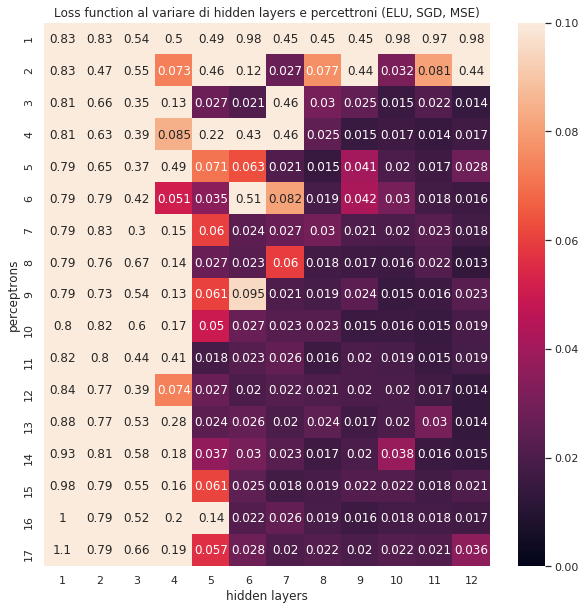

In [50]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(layers_neurons.T, annot=True,xticklabels=layers, yticklabels=neurons,vmin=0, vmax=0.1)
ax.set_title("Loss function al variare di hidden layers e percettroni (ELU, SGD, MSE)")
ax.set_xlabel("hidden layers")
ax.set_ylabel("perceptrons")
plt.show()

Dall'ultima analisi risulta come, aumentando il numero di layers e di percettroni, aumenti notevolmente l'accuratezza della rete, in quanto il valore del MSE diminuisce di un fattore 10 rispetto a quello precedentemente trovato. Al fine di alleggerire il più possibile la rete, sono scelti i valori $N_{HL}=11$ e $N_{p}=4$

Ricapitolando, i parametri scelti al fine di ottimizzare la rete neurale sono:
- activation function: ELU
- optimizer: SGD
- loss function: mean squared error
- $N_{HL}$: 11
- $N_{p}$: 4

Di seguit sono riportati i risultati ottenuti con la rete FFNN ottimizzata:

In [55]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = 4 -3* x_valid -2*x_valid*x_valid + 3*x_valid*x_valid*x_valid

sigma = 0.1 
y_train = np.random.normal(4 -3* x_train -2*x_train*x_train + 3*x_train*x_train*x_train, sigma) 
y_valid = np.random.normal(4 -3* x_valid -2*x_valid*x_valid + 3*x_valid*x_valid*x_valid, sigma)

model = tf.keras.Sequential()

for k in range(11):
    model.add(Dense(4, activation='elu'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, batch_size=30, epochs=90, shuffle=True, validation_data=(x_valid, y_valid))

score = model.evaluate(x_valid, y_valid, batch_size=30, verbose=1)
    

Epoch 1/90
17/17 [==============================] - 0s 10ms/step - loss: 9.2392 - mse: 9.2392 - val_loss: 5.3075 - val_mse: 5.3075
Epoch 2/90
17/17 [==============================] - 0s 2ms/step - loss: 2.6330 - mse: 2.6330 - val_loss: 1.1424 - val_mse: 1.1424
Epoch 3/90
17/17 [==============================] - 0s 3ms/step - loss: 1.1663 - mse: 1.1663 - val_loss: 1.0096 - val_mse: 1.0096
Epoch 4/90
17/17 [==============================] - 0s 3ms/step - loss: 1.1199 - mse: 1.1199 - val_loss: 0.9899 - val_mse: 0.9899
Epoch 5/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0876 - mse: 1.0876 - val_loss: 0.9810 - val_mse: 0.9810
Epoch 6/90
17/17 [==============================] - 0s 3ms/step - loss: 1.0586 - mse: 1.0586 - val_loss: 0.9711 - val_mse: 0.9711
Epoch 7/90
17/17 [==============================] - 0s 2ms/step - loss: 1.0339 - mse: 1.0339 - val_loss: 0.9437 - val_mse: 0.9437
Epoch 8/90
17/17 [==============================] - 0s 2ms/step - loss: 0.9956 - mse: 0.9

In [56]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 1ms/step - loss: 0.0220 - mse: 0.0220

Test loss: 0.021967511624097824
Test accuracy: 0.021967511624097824


Nel grafico successivo viene mostrata l'efficacia della FFNN ottimizzata sia dentro che fuori il range del dataset di training

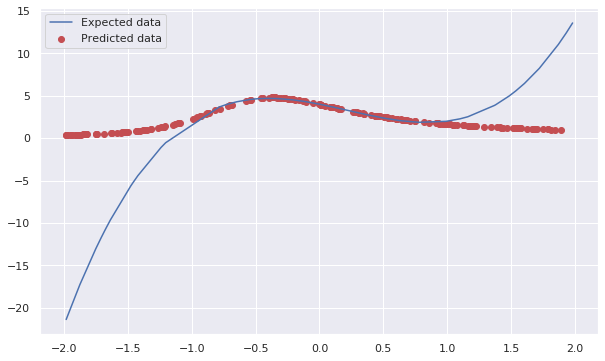

In [73]:
x_valid_out = np.random.uniform(-2, 2, 50)
x_valid_out.sort()
y_target_out = 4 -3* x_valid_out -2*x_valid_out*x_valid_out + 3*x_valid_out*x_valid_out*x_valid_out

x_out = np.random.uniform(-2, 2, 200)
y_out = model.predict(x_out)

plt.figure(figsize=(10,6))
plt.scatter(x_out, y_out[:,0],color='r',label='Predicted data')
plt.plot(x_valid_out, y_target_out, label='Expected data')
plt.grid(True)
plt.legend()
plt.show()

Dal grafico risulta chiaro come la rete neurale può fornire previsioni accurate per valori all'interno del range di training, mentre la sua precisione diminuisce considerevolmente al di fuori di tale range.

### Exercise 11.3

<span style="color:blue">
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.
</span>

I parametri utilizzati per la rete neurale (funzione di costo, funzione di attivazione e ottimizzatore) sono gli stessi trovati nel precedente esercizio, mentre $N_{HL}$ e $N_p$ vengono fatti variare al fine di minimizzare l'accuracy.

Il dataset di training e quello di validazione è organizzato in una matrice X contenente le coordinate x ed y di punti disposti random nel piano e di un vettore z di dati distribuiti gaussianamente attorno ai corrispettivi valori di $sin(x^2 +y^2)$ ($\sigma =0.1$)

In [71]:
x_train = np.random.rand(5000)*3-1.5
y_train = np.random.rand(5000)*3-1.5
X_tr = np.array([x_train, y_train])

x_valid = np.random.rand(500)*3-1.5
y_valid = np.random.rand(500)*3-1.5
X_va = np.array([x_valid, y_valid])

z_target = np.sin(x_valid**2 + y_valid**2)

sigma = 0.1 
z_train = np.random.normal(np.sin(x_train**2 + y_train**2), sigma) 
z_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma)

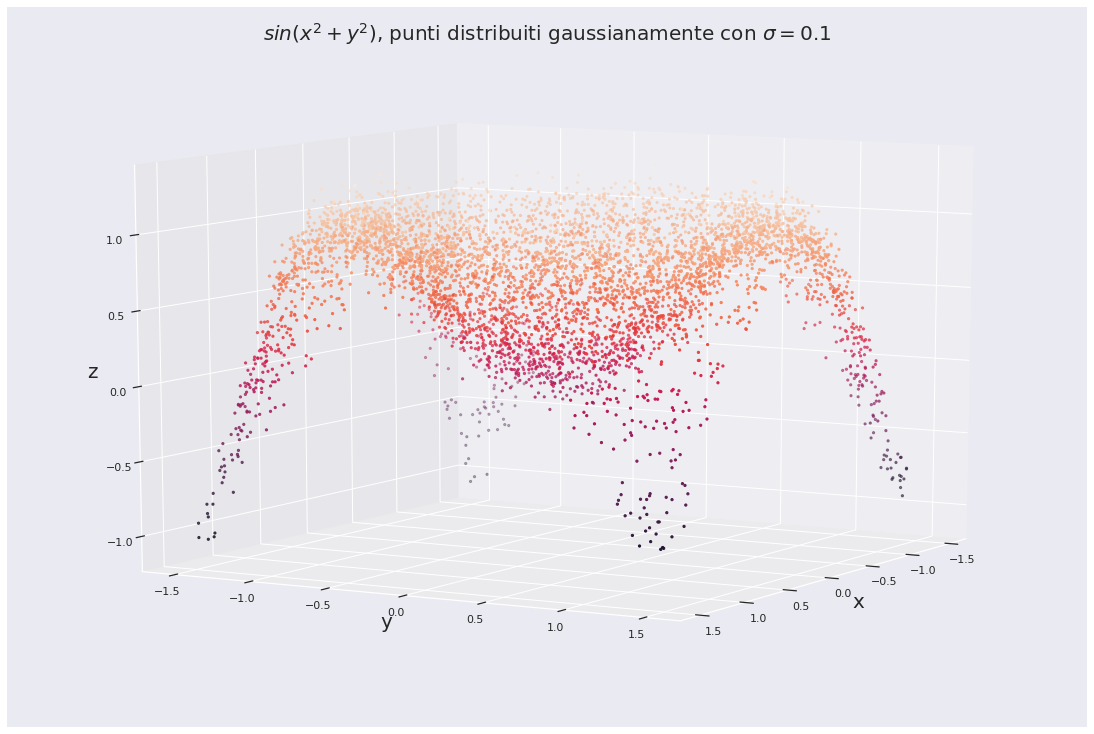

In [131]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
fig.suptitle('$sin(x^2+y^2)$, punti distribuiti gaussianamente con $\sigma=0.1$', fontsize=20)
ax = Axes3D(fig)
ax.scatter(x_train, y_train, z_train, c=z_train, marker='.')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
ax.view_init(10, 30)
plt.show()

Il numero di hidden layers $N_{HL}$ ed il numero di percettroni per layer $N_p$ sono stati fatti variare rispettivamente tra 5 e 40 e tra 5 e 30, entrambi a step di 5. Di seguito è riportata la tabella delle loss functions ottenute variando tali parametri

In [110]:
layers=np.linspace(1,8,8, dtype=int)
neurons=np.linspace(1,6,6, dtype=int)

print(layers*5)
print(neurons*5)

[ 5 10 15 20 25 30 35 40]
[ 5 10 15 20 25 30]


In [111]:
layers_neurons = np.zeros((8, 6))

for i in layers:
    for j in neurons:

        model = tf.keras.Sequential()
        for k in range(i*5):
            model.add(Dense(j*5, activation='elu'))


        model.compile(optimizer='SGD', loss='mse', metrics=['mse'])


        history = model.fit(X_tr.T, z_train, batch_size=30, epochs=90, shuffle=True, validation_data=(X_va.T, z_valid))


        score = model.evaluate(X_va.T, z_valid, batch_size=30)
        
        sns.set()
        layers_neurons[i-1][j-1] = score[0]

Epoch 1/90
167/167 [==============================] - 0s 2ms/step - loss: 0.3360 - mse: 0.3360 - val_loss: 0.2072 - val_mse: 0.2072
Epoch 2/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1766 - mse: 0.1766 - val_loss: 0.1705 - val_mse: 0.1705
Epoch 3/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1614 - mse: 0.1614 - val_loss: 0.1650 - val_mse: 0.1650
Epoch 4/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1581 - mse: 0.1581 - val_loss: 0.1628 - val_mse: 0.1628
Epoch 5/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1566 - mse: 0.1566 - val_loss: 0.1615 - val_mse: 0.1615
Epoch 6/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1557 - mse: 0.1557 - val_loss: 0.1608 - val_mse: 0.1608
Epoch 7/90
167/167 [==============================] - 0s 966us/step - loss: 0.1552 - mse: 0.1552 - val_loss: 0.1603 - val_mse: 0.1603
Epoch 8/90
167/167 [==============================] - 0s 1ms/step - loss: 

167/167 [==============================] - 0s 891us/step - loss: 0.1526 - mse: 0.1526 - val_loss: 0.1581 - val_mse: 0.1581
Epoch 63/90
167/167 [==============================] - 0s 853us/step - loss: 0.1525 - mse: 0.1525 - val_loss: 0.1581 - val_mse: 0.1581
Epoch 64/90
167/167 [==============================] - 0s 947us/step - loss: 0.1525 - mse: 0.1525 - val_loss: 0.1580 - val_mse: 0.1580
Epoch 65/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1525 - mse: 0.1525 - val_loss: 0.1581 - val_mse: 0.1581
Epoch 66/90
167/167 [==============================] - 0s 878us/step - loss: 0.1525 - mse: 0.1525 - val_loss: 0.1580 - val_mse: 0.1580
Epoch 67/90
167/167 [==============================] - 0s 916us/step - loss: 0.1525 - mse: 0.1525 - val_loss: 0.1581 - val_mse: 0.1581
Epoch 68/90
167/167 [==============================] - 0s 820us/step - loss: 0.1525 - mse: 0.1525 - val_loss: 0.1581 - val_mse: 0.1581
Epoch 69/90
167/167 [==============================] - 0s 826us/step 

167/167 [==============================] - 0s 811us/step - loss: 0.1537 - mse: 0.1537 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 33/90
167/167 [==============================] - 0s 868us/step - loss: 0.1536 - mse: 0.1536 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 34/90
167/167 [==============================] - 0s 813us/step - loss: 0.1536 - mse: 0.1536 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 35/90
167/167 [==============================] - 0s 806us/step - loss: 0.1536 - mse: 0.1536 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 36/90
167/167 [==============================] - 0s 951us/step - loss: 0.1535 - mse: 0.1535 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 37/90
167/167 [==============================] - 0s 830us/step - loss: 0.1535 - mse: 0.1535 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 38/90
167/167 [==============================] - 0s 810us/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 39/90
167/167 [==============================] - 0s 834us/ste

167/167 [==============================] - 0s 859us/step - loss: 0.2218 - mse: 0.2218 - val_loss: 0.1896 - val_mse: 0.1896
Epoch 3/90
167/167 [==============================] - 0s 850us/step - loss: 0.1732 - mse: 0.1732 - val_loss: 0.1707 - val_mse: 0.1707
Epoch 4/90
167/167 [==============================] - 0s 830us/step - loss: 0.1630 - mse: 0.1630 - val_loss: 0.1662 - val_mse: 0.1662
Epoch 5/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1602 - mse: 0.1602 - val_loss: 0.1645 - val_mse: 0.1645
Epoch 6/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1591 - mse: 0.1591 - val_loss: 0.1637 - val_mse: 0.1637
Epoch 7/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1584 - mse: 0.1584 - val_loss: 0.1632 - val_mse: 0.1632
Epoch 8/90
167/167 [==============================] - 0s 927us/step - loss: 0.1578 - mse: 0.1578 - val_loss: 0.1627 - val_mse: 0.1627
Epoch 9/90
167/167 [==============================] - 0s 835us/step - loss: 0.1

Epoch 63/90
167/167 [==============================] - 0s 835us/step - loss: 0.1501 - mse: 0.1501 - val_loss: 0.1560 - val_mse: 0.1560
Epoch 64/90
167/167 [==============================] - 0s 880us/step - loss: 0.1500 - mse: 0.1500 - val_loss: 0.1558 - val_mse: 0.1558
Epoch 65/90
167/167 [==============================] - 0s 934us/step - loss: 0.1498 - mse: 0.1498 - val_loss: 0.1557 - val_mse: 0.1557
Epoch 66/90
167/167 [==============================] - 0s 906us/step - loss: 0.1496 - mse: 0.1496 - val_loss: 0.1555 - val_mse: 0.1555
Epoch 67/90
167/167 [==============================] - 0s 816us/step - loss: 0.1495 - mse: 0.1495 - val_loss: 0.1553 - val_mse: 0.1553
Epoch 68/90
167/167 [==============================] - 0s 849us/step - loss: 0.1493 - mse: 0.1493 - val_loss: 0.1552 - val_mse: 0.1552
Epoch 69/90
167/167 [==============================] - 0s 835us/step - loss: 0.1491 - mse: 0.1491 - val_loss: 0.1550 - val_mse: 0.1550
Epoch 70/90
167/167 [==============================] - 

167/167 [==============================] - 0s 837us/step - loss: 0.1536 - mse: 0.1536 - val_loss: 0.1591 - val_mse: 0.1591
Epoch 34/90
167/167 [==============================] - 0s 833us/step - loss: 0.1536 - mse: 0.1536 - val_loss: 0.1591 - val_mse: 0.1591
Epoch 35/90
167/167 [==============================] - 0s 832us/step - loss: 0.1536 - mse: 0.1536 - val_loss: 0.1590 - val_mse: 0.1590
Epoch 36/90
167/167 [==============================] - 0s 833us/step - loss: 0.1535 - mse: 0.1535 - val_loss: 0.1590 - val_mse: 0.1590
Epoch 37/90
167/167 [==============================] - 0s 932us/step - loss: 0.1535 - mse: 0.1535 - val_loss: 0.1589 - val_mse: 0.1589
Epoch 38/90
167/167 [==============================] - 0s 844us/step - loss: 0.1535 - mse: 0.1535 - val_loss: 0.1589 - val_mse: 0.1589
Epoch 39/90
167/167 [==============================] - 0s 857us/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1589 - val_mse: 0.1589
Epoch 40/90
167/167 [==============================] - 0s 832us/ste

167/167 [==============================] - 0s 854us/step - loss: 0.1792 - mse: 0.1792 - val_loss: 0.1707 - val_mse: 0.1707
Epoch 4/90
167/167 [==============================] - 0s 857us/step - loss: 0.1614 - mse: 0.1614 - val_loss: 0.1636 - val_mse: 0.1636
Epoch 5/90
167/167 [==============================] - 0s 848us/step - loss: 0.1571 - mse: 0.1571 - val_loss: 0.1616 - val_mse: 0.1616
Epoch 6/90
167/167 [==============================] - 0s 840us/step - loss: 0.1558 - mse: 0.1558 - val_loss: 0.1610 - val_mse: 0.1610
Epoch 7/90
167/167 [==============================] - 0s 847us/step - loss: 0.1552 - mse: 0.1552 - val_loss: 0.1607 - val_mse: 0.1607
Epoch 8/90
167/167 [==============================] - 0s 881us/step - loss: 0.1549 - mse: 0.1549 - val_loss: 0.1604 - val_mse: 0.1604
Epoch 9/90
167/167 [==============================] - 0s 845us/step - loss: 0.1547 - mse: 0.1547 - val_loss: 0.1603 - val_mse: 0.1603
Epoch 10/90
167/167 [==============================] - 0s 851us/step - lo

Epoch 64/90
167/167 [==============================] - 0s 848us/step - loss: 0.1529 - mse: 0.1529 - val_loss: 0.1588 - val_mse: 0.1588
Epoch 65/90
167/167 [==============================] - 0s 851us/step - loss: 0.1529 - mse: 0.1529 - val_loss: 0.1588 - val_mse: 0.1588
Epoch 66/90
167/167 [==============================] - 0s 859us/step - loss: 0.1529 - mse: 0.1529 - val_loss: 0.1588 - val_mse: 0.1588
Epoch 67/90
167/167 [==============================] - 0s 851us/step - loss: 0.1528 - mse: 0.1528 - val_loss: 0.1589 - val_mse: 0.1589
Epoch 68/90
167/167 [==============================] - 0s 855us/step - loss: 0.1529 - mse: 0.1529 - val_loss: 0.1589 - val_mse: 0.1589
Epoch 69/90
167/167 [==============================] - 0s 871us/step - loss: 0.1528 - mse: 0.1528 - val_loss: 0.1588 - val_mse: 0.1588
Epoch 70/90
167/167 [==============================] - 0s 851us/step - loss: 0.1528 - mse: 0.1528 - val_loss: 0.1588 - val_mse: 0.1588
Epoch 71/90
167/167 [==============================] - 

167/167 [==============================] - 0s 922us/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1585 - val_mse: 0.1585
Epoch 35/90
167/167 [==============================] - 0s 882us/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1585 - val_mse: 0.1585
Epoch 36/90
167/167 [==============================] - 0s 873us/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1585 - val_mse: 0.1585
Epoch 37/90
167/167 [==============================] - 0s 871us/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 38/90
167/167 [==============================] - 0s 882us/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 39/90
167/167 [==============================] - 0s 876us/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1585 - val_mse: 0.1585
Epoch 40/90
167/167 [==============================] - 0s 911us/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1586 - val_mse: 0.1586
Epoch 41/90
167/167 [==============================] - 0s 879us/ste

167/167 [==============================] - 0s 903us/step - loss: 0.1545 - mse: 0.1545 - val_loss: 0.1593 - val_mse: 0.1593
Epoch 5/90
167/167 [==============================] - 0s 948us/step - loss: 0.1542 - mse: 0.1542 - val_loss: 0.1591 - val_mse: 0.1591
Epoch 6/90
167/167 [==============================] - 0s 910us/step - loss: 0.1541 - mse: 0.1541 - val_loss: 0.1591 - val_mse: 0.1591
Epoch 7/90
167/167 [==============================] - 0s 889us/step - loss: 0.1540 - mse: 0.1540 - val_loss: 0.1590 - val_mse: 0.1590
Epoch 8/90
167/167 [==============================] - 0s 891us/step - loss: 0.1539 - mse: 0.1539 - val_loss: 0.1589 - val_mse: 0.1589
Epoch 9/90
167/167 [==============================] - 0s 897us/step - loss: 0.1538 - mse: 0.1538 - val_loss: 0.1588 - val_mse: 0.1588
Epoch 10/90
167/167 [==============================] - 0s 894us/step - loss: 0.1538 - mse: 0.1538 - val_loss: 0.1587 - val_mse: 0.1587
Epoch 11/90
167/167 [==============================] - 0s 934us/step - l

Epoch 65/90
167/167 [==============================] - 0s 895us/step - loss: 0.1531 - mse: 0.1531 - val_loss: 0.1581 - val_mse: 0.1581
Epoch 66/90
167/167 [==============================] - 0s 911us/step - loss: 0.1531 - mse: 0.1531 - val_loss: 0.1581 - val_mse: 0.1581
Epoch 67/90
167/167 [==============================] - 0s 906us/step - loss: 0.1531 - mse: 0.1531 - val_loss: 0.1581 - val_mse: 0.1581
Epoch 68/90
167/167 [==============================] - 0s 904us/step - loss: 0.1531 - mse: 0.1531 - val_loss: 0.1580 - val_mse: 0.1580
Epoch 69/90
167/167 [==============================] - 0s 901us/step - loss: 0.1531 - mse: 0.1531 - val_loss: 0.1581 - val_mse: 0.1581
Epoch 70/90
167/167 [==============================] - 0s 930us/step - loss: 0.1531 - mse: 0.1531 - val_loss: 0.1580 - val_mse: 0.1580
Epoch 71/90
167/167 [==============================] - 0s 902us/step - loss: 0.1531 - mse: 0.1531 - val_loss: 0.1580 - val_mse: 0.1580
Epoch 72/90
167/167 [==============================] - 

167/167 [==============================] - 0s 933us/step - loss: 0.1052 - mse: 0.1052 - val_loss: 0.1137 - val_mse: 0.1137
Epoch 36/90
167/167 [==============================] - 0s 929us/step - loss: 0.1031 - mse: 0.1031 - val_loss: 0.1058 - val_mse: 0.1058
Epoch 37/90
167/167 [==============================] - 0s 915us/step - loss: 0.1002 - mse: 0.1002 - val_loss: 0.1024 - val_mse: 0.1024
Epoch 38/90
167/167 [==============================] - 0s 904us/step - loss: 0.0983 - mse: 0.0983 - val_loss: 0.1000 - val_mse: 0.1000
Epoch 39/90
167/167 [==============================] - 0s 952us/step - loss: 0.0951 - mse: 0.0951 - val_loss: 0.0958 - val_mse: 0.0958
Epoch 40/90
167/167 [==============================] - 0s 924us/step - loss: 0.0927 - mse: 0.0927 - val_loss: 0.1099 - val_mse: 0.1099
Epoch 41/90
167/167 [==============================] - 0s 907us/step - loss: 0.0904 - mse: 0.0904 - val_loss: 0.0901 - val_mse: 0.0901
Epoch 42/90
167/167 [==============================] - 0s 920us/ste

167/167 [==============================] - 0s 969us/step - loss: 0.1545 - mse: 0.1545 - val_loss: 0.1592 - val_mse: 0.1592
Epoch 6/90
167/167 [==============================] - 0s 964us/step - loss: 0.1541 - mse: 0.1541 - val_loss: 0.1589 - val_mse: 0.1589
Epoch 7/90
167/167 [==============================] - 0s 993us/step - loss: 0.1540 - mse: 0.1540 - val_loss: 0.1588 - val_mse: 0.1588
Epoch 8/90
167/167 [==============================] - 0s 966us/step - loss: 0.1539 - mse: 0.1539 - val_loss: 0.1587 - val_mse: 0.1587
Epoch 9/90
167/167 [==============================] - 0s 964us/step - loss: 0.1539 - mse: 0.1539 - val_loss: 0.1587 - val_mse: 0.1587
Epoch 10/90
167/167 [==============================] - 0s 967us/step - loss: 0.1538 - mse: 0.1538 - val_loss: 0.1586 - val_mse: 0.1586
Epoch 11/90
167/167 [==============================] - 0s 954us/step - loss: 0.1538 - mse: 0.1538 - val_loss: 0.1586 - val_mse: 0.1586
Epoch 12/90
167/167 [==============================] - 0s 951us/step - 

Epoch 66/90
167/167 [==============================] - 0s 962us/step - loss: 0.1529 - mse: 0.1529 - val_loss: 0.1575 - val_mse: 0.1575
Epoch 67/90
167/167 [==============================] - 0s 952us/step - loss: 0.1529 - mse: 0.1529 - val_loss: 0.1574 - val_mse: 0.1574
Epoch 68/90
167/167 [==============================] - 0s 987us/step - loss: 0.1528 - mse: 0.1528 - val_loss: 0.1575 - val_mse: 0.1575
Epoch 69/90
167/167 [==============================] - 0s 954us/step - loss: 0.1528 - mse: 0.1528 - val_loss: 0.1574 - val_mse: 0.1574
Epoch 70/90
167/167 [==============================] - 0s 968us/step - loss: 0.1528 - mse: 0.1528 - val_loss: 0.1574 - val_mse: 0.1574
Epoch 71/90
167/167 [==============================] - 0s 968us/step - loss: 0.1528 - mse: 0.1528 - val_loss: 0.1574 - val_mse: 0.1574
Epoch 72/90
167/167 [==============================] - 0s 970us/step - loss: 0.1528 - mse: 0.1528 - val_loss: 0.1573 - val_mse: 0.1573
Epoch 73/90
167/167 [==============================] - 

167/167 [==============================] - 0s 1ms/step - loss: 0.1528 - mse: 0.1528 - val_loss: 0.1571 - val_mse: 0.1571
Epoch 37/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1527 - mse: 0.1527 - val_loss: 0.1570 - val_mse: 0.1570
Epoch 38/90
167/167 [==============================] - 0s 993us/step - loss: 0.1527 - mse: 0.1527 - val_loss: 0.1569 - val_mse: 0.1569
Epoch 39/90
167/167 [==============================] - 0s 996us/step - loss: 0.1526 - mse: 0.1526 - val_loss: 0.1569 - val_mse: 0.1569
Epoch 40/90
167/167 [==============================] - 0s 991us/step - loss: 0.1526 - mse: 0.1526 - val_loss: 0.1569 - val_mse: 0.1569
Epoch 41/90
167/167 [==============================] - 0s 981us/step - loss: 0.1526 - mse: 0.1526 - val_loss: 0.1567 - val_mse: 0.1567
Epoch 42/90
167/167 [==============================] - 0s 996us/step - loss: 0.1525 - mse: 0.1525 - val_loss: 0.1567 - val_mse: 0.1567
Epoch 43/90
167/167 [==============================] - 0s 1ms/step - lo

167/167 [==============================] - 0s 1ms/step - loss: 0.1546 - mse: 0.1546 - val_loss: 0.1599 - val_mse: 0.1599
Epoch 7/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1544 - mse: 0.1544 - val_loss: 0.1597 - val_mse: 0.1597
Epoch 8/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1542 - mse: 0.1542 - val_loss: 0.1596 - val_mse: 0.1596
Epoch 9/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1541 - mse: 0.1541 - val_loss: 0.1594 - val_mse: 0.1594
Epoch 10/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1539 - mse: 0.1539 - val_loss: 0.1593 - val_mse: 0.1593
Epoch 11/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1538 - mse: 0.1538 - val_loss: 0.1593 - val_mse: 0.1593
Epoch 12/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1537 - mse: 0.1537 - val_loss: 0.1592 - val_mse: 0.1592
Epoch 13/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1536 - 

Epoch 68/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1044 - mse: 0.1044 - val_loss: 0.0919 - val_mse: 0.0919
Epoch 69/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0965 - mse: 0.0965 - val_loss: 0.0924 - val_mse: 0.0924
Epoch 70/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0956 - mse: 0.0956 - val_loss: 0.0958 - val_mse: 0.0958
Epoch 71/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0909 - mse: 0.0909 - val_loss: 0.1186 - val_mse: 0.1186
Epoch 72/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0832 - mse: 0.0832 - val_loss: 0.0808 - val_mse: 0.0808
Epoch 73/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0822 - mse: 0.0822 - val_loss: 0.0739 - val_mse: 0.0739
Epoch 74/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0786 - mse: 0.0786 - val_loss: 0.0888 - val_mse: 0.0888
Epoch 75/90
167/167 [==============================] - 0s 1ms/step - 

167/167 [==============================] - 0s 1ms/step - loss: 0.1513 - mse: 0.1513 - val_loss: 0.1552 - val_mse: 0.1552
Epoch 40/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1512 - mse: 0.1512 - val_loss: 0.1551 - val_mse: 0.1551
Epoch 41/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.1546 - val_mse: 0.1546
Epoch 42/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1506 - mse: 0.1506 - val_loss: 0.1544 - val_mse: 0.1544
Epoch 43/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1503 - mse: 0.1503 - val_loss: 0.1543 - val_mse: 0.1543
Epoch 44/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1500 - mse: 0.1500 - val_loss: 0.1543 - val_mse: 0.1543
Epoch 45/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1496 - mse: 0.1496 - val_loss: 0.1536 - val_mse: 0.1536
Epoch 46/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1493

167/167 [==============================] - 0s 990us/step - loss: 0.1465 - mse: 0.1465 - val_loss: 0.1456 - val_mse: 0.1456
Epoch 11/90
167/167 [==============================] - 0s 993us/step - loss: 0.1454 - mse: 0.1454 - val_loss: 0.1438 - val_mse: 0.1438
Epoch 12/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1446 - mse: 0.1446 - val_loss: 0.1429 - val_mse: 0.1429
Epoch 13/90
167/167 [==============================] - 0s 967us/step - loss: 0.1440 - mse: 0.1440 - val_loss: 0.1419 - val_mse: 0.1419
Epoch 14/90
167/167 [==============================] - 0s 987us/step - loss: 0.1433 - mse: 0.1433 - val_loss: 0.1414 - val_mse: 0.1414
Epoch 15/90
167/167 [==============================] - 0s 970us/step - loss: 0.1431 - mse: 0.1431 - val_loss: 0.1405 - val_mse: 0.1405
Epoch 16/90
167/167 [==============================] - 0s 988us/step - loss: 0.1421 - mse: 0.1421 - val_loss: 0.1421 - val_mse: 0.1421
Epoch 17/90
167/167 [==============================] - 0s 1ms/step - 

167/167 [==============================] - 0s 1ms/step - loss: 0.0848 - mse: 0.0848 - val_loss: 0.0855 - val_mse: 0.0855
Epoch 72/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0852 - mse: 0.0852 - val_loss: 0.0859 - val_mse: 0.0859
Epoch 73/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0848 - mse: 0.0848 - val_loss: 0.0889 - val_mse: 0.0889
Epoch 74/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0847 - mse: 0.0847 - val_loss: 0.0880 - val_mse: 0.0880
Epoch 75/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0845 - mse: 0.0845 - val_loss: 0.0866 - val_mse: 0.0866
Epoch 76/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0841 - mse: 0.0841 - val_loss: 0.0877 - val_mse: 0.0877
Epoch 77/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0845 - mse: 0.0845 - val_loss: 0.0868 - val_mse: 0.0868
Epoch 78/90
167/167 [==============================] - 0s 996us/step - loss: 0.08

167/167 [==============================] - 0s 1ms/step - loss: 0.1417 - mse: 0.1417 - val_loss: 0.1409 - val_mse: 0.1409
Epoch 43/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1394 - mse: 0.1394 - val_loss: 0.1392 - val_mse: 0.1392
Epoch 44/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1371 - mse: 0.1371 - val_loss: 0.1385 - val_mse: 0.1385
Epoch 45/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1346 - mse: 0.1346 - val_loss: 0.1335 - val_mse: 0.1335
Epoch 46/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1315 - mse: 0.1315 - val_loss: 0.1303 - val_mse: 0.1303
Epoch 47/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1280 - mse: 0.1280 - val_loss: 0.1283 - val_mse: 0.1283
Epoch 48/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1226 - mse: 0.1226 - val_loss: 0.1209 - val_mse: 0.1209
Epoch 49/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1152

167/167 [==============================] - 0s 1ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 14/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1585 - val_mse: 0.1585
Epoch 15/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1585 - val_mse: 0.1585
Epoch 16/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 17/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 18/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 19/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 20/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1534

Epoch 75/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0980 - mse: 0.0980 - val_loss: 0.1019 - val_mse: 0.1019
Epoch 76/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0943 - mse: 0.0943 - val_loss: 0.0966 - val_mse: 0.0966
Epoch 77/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0914 - mse: 0.0914 - val_loss: 0.0954 - val_mse: 0.0954
Epoch 78/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0891 - mse: 0.0891 - val_loss: 0.0904 - val_mse: 0.0904
Epoch 79/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0865 - mse: 0.0865 - val_loss: 0.0873 - val_mse: 0.0873
Epoch 80/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0839 - mse: 0.0839 - val_loss: 0.0860 - val_mse: 0.0860
Epoch 81/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0818 - mse: 0.0818 - val_loss: 0.0992 - val_mse: 0.0992
Epoch 82/90
167/167 [==============================] - 0s 1ms/step - 

167/167 [==============================] - 0s 1ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 47/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 48/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 49/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 50/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 51/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 52/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 53/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0171

167/167 [==============================] - 0s 1ms/step - loss: 0.1529 - mse: 0.1529 - val_loss: 0.1577 - val_mse: 0.1577
Epoch 18/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1528 - mse: 0.1528 - val_loss: 0.1576 - val_mse: 0.1576
Epoch 19/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1526 - mse: 0.1526 - val_loss: 0.1576 - val_mse: 0.1576
Epoch 20/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1526 - mse: 0.1526 - val_loss: 0.1573 - val_mse: 0.1573
Epoch 21/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1524 - mse: 0.1524 - val_loss: 0.1572 - val_mse: 0.1572
Epoch 22/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1523 - mse: 0.1523 - val_loss: 0.1570 - val_mse: 0.1570
Epoch 23/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1521 - mse: 0.1521 - val_loss: 0.1567 - val_mse: 0.1567
Epoch 24/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1518

Epoch 79/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 80/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 81/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 82/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 83/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 84/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 85/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 86/90
167/167 [==============================] - 0s 1ms/step - 

167/167 [==============================] - 0s 1ms/step - loss: 0.0770 - mse: 0.0770 - val_loss: 0.0752 - val_mse: 0.0752
Epoch 51/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0756 - mse: 0.0756 - val_loss: 0.0715 - val_mse: 0.0715
Epoch 52/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0733 - mse: 0.0733 - val_loss: 0.0737 - val_mse: 0.0737
Epoch 53/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0698 - mse: 0.0698 - val_loss: 0.0641 - val_mse: 0.0641
Epoch 54/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0654 - mse: 0.0654 - val_loss: 0.0593 - val_mse: 0.0593
Epoch 55/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0506 - val_mse: 0.0506
Epoch 56/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 57/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0236

167/167 [==============================] - 0s 1ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 22/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1589 - val_mse: 0.1589
Epoch 23/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 24/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 25/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 26/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1588 - val_mse: 0.1588
Epoch 27/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 28/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1533

Epoch 83/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 84/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1529 - mse: 0.1529 - val_loss: 0.1591 - val_mse: 0.1591
Epoch 85/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 86/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 87/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 88/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1531 - mse: 0.1531 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 89/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 90/90
17/17 [==============================] - 0s 854us/step - 

167/167 [==============================] - 0s 1ms/step - loss: 0.1193 - mse: 0.1193 - val_loss: 0.1207 - val_mse: 0.1207
Epoch 55/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1182 - mse: 0.1182 - val_loss: 0.1193 - val_mse: 0.1193
Epoch 56/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1169 - mse: 0.1169 - val_loss: 0.1174 - val_mse: 0.1174
Epoch 57/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1151 - mse: 0.1151 - val_loss: 0.1144 - val_mse: 0.1144
Epoch 58/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1125 - mse: 0.1125 - val_loss: 0.1109 - val_mse: 0.1109
Epoch 59/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1081 - mse: 0.1081 - val_loss: 0.1027 - val_mse: 0.1027
Epoch 60/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0982 - mse: 0.0982 - val_loss: 0.0891 - val_mse: 0.0891
Epoch 61/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0787

167/167 [==============================] - 0s 1ms/step - loss: 0.1332 - mse: 0.1332 - val_loss: 0.1340 - val_mse: 0.1340
Epoch 26/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1300 - mse: 0.1300 - val_loss: 0.1297 - val_mse: 0.1297
Epoch 27/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1246 - mse: 0.1246 - val_loss: 0.1207 - val_mse: 0.1207
Epoch 28/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1183 - mse: 0.1183 - val_loss: 0.1151 - val_mse: 0.1151
Epoch 29/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1118 - mse: 0.1118 - val_loss: 0.1223 - val_mse: 0.1223
Epoch 30/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1043 - mse: 0.1043 - val_loss: 0.0974 - val_mse: 0.0974
Epoch 31/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0997 - mse: 0.0997 - val_loss: 0.0919 - val_mse: 0.0919
Epoch 32/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0953

Epoch 87/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 88/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 89/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 90/90
17/17 [==============================] - 0s 752us/step - loss: 0.0138 - mse: 0.0138
Epoch 1/90
167/167 [==============================] - 0s 2ms/step - loss: 0.3686 - mse: 0.3686 - val_loss: 0.2513 - val_mse: 0.2513
Epoch 2/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1946 - mse: 0.1946 - val_loss: 0.1691 - val_mse: 0.1691
Epoch 3/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1578 - mse: 0.1578 - val_loss: 0.1599 - val_mse: 0.1599
Epoch 4/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1540 - mse: 0.1540 - val_loss: 0.

167/167 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.1190 - val_loss: 0.1234 - val_mse: 0.1234
Epoch 59/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1107 - mse: 0.1107 - val_loss: 0.1118 - val_mse: 0.1118
Epoch 60/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1021 - mse: 0.1021 - val_loss: 0.1073 - val_mse: 0.1073
Epoch 61/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0951 - mse: 0.0951 - val_loss: 0.0967 - val_mse: 0.0967
Epoch 62/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0911 - mse: 0.0911 - val_loss: 0.0945 - val_mse: 0.0945
Epoch 63/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0887 - mse: 0.0887 - val_loss: 0.0895 - val_mse: 0.0895
Epoch 64/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0863 - mse: 0.0863 - val_loss: 0.0914 - val_mse: 0.0914
Epoch 65/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0849

167/167 [==============================] - 0s 2ms/step - loss: 0.1238 - mse: 0.1238 - val_loss: 0.1215 - val_mse: 0.1215
Epoch 30/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1218 - mse: 0.1218 - val_loss: 0.1271 - val_mse: 0.1271
Epoch 31/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1204 - mse: 0.1204 - val_loss: 0.1255 - val_mse: 0.1255
Epoch 32/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1177 - mse: 0.1177 - val_loss: 0.1175 - val_mse: 0.1175
Epoch 33/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1160 - mse: 0.1160 - val_loss: 0.1349 - val_mse: 0.1349
Epoch 34/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1142 - mse: 0.1142 - val_loss: 0.1154 - val_mse: 0.1154
Epoch 35/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1108 - mse: 0.1108 - val_loss: 0.1347 - val_mse: 0.1347
Epoch 36/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1078

17/17 [==============================] - 0s 1ms/step - loss: 0.0175 - mse: 0.0175
Epoch 1/90
167/167 [==============================] - 1s 4ms/step - loss: 0.3880 - mse: 0.3880 - val_loss: 0.2761 - val_mse: 0.2761
Epoch 2/90
167/167 [==============================] - 0s 2ms/step - loss: 0.2142 - mse: 0.2142 - val_loss: 0.1786 - val_mse: 0.1786
Epoch 3/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1622 - mse: 0.1622 - val_loss: 0.1609 - val_mse: 0.1609
Epoch 4/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1546 - mse: 0.1546 - val_loss: 0.1591 - val_mse: 0.1591
Epoch 5/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1539 - mse: 0.1539 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 6/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1536 - mse: 0.1536 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 7/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1536 - mse: 0.1536 - val_loss: 0.1582 - val_mse: 0

167/167 [==============================] - 0s 2ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 63/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0518 - val_mse: 0.0518
Epoch 64/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 65/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 66/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 67/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 68/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 69/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0218

167/167 [==============================] - 0s 2ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 34/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 35/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 36/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 37/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 38/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 39/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1586 - val_mse: 0.1586
Epoch 40/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533

167/167 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1577 - val_mse: 0.1577
Epoch 5/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1530 - mse: 0.1530 - val_loss: 0.1574 - val_mse: 0.1574
Epoch 6/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1527 - mse: 0.1527 - val_loss: 0.1569 - val_mse: 0.1569
Epoch 7/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1523 - mse: 0.1523 - val_loss: 0.1559 - val_mse: 0.1559
Epoch 8/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1516 - mse: 0.1516 - val_loss: 0.1545 - val_mse: 0.1545
Epoch 9/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1507 - mse: 0.1507 - val_loss: 0.1529 - val_mse: 0.1529
Epoch 10/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1494 - mse: 0.1494 - val_loss: 0.1495 - val_mse: 0.1495
Epoch 11/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1470 - ms

Epoch 66/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0433 - mse: 0.0433 - val_loss: 0.0396 - val_mse: 0.0396
Epoch 67/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0437 - mse: 0.0437 - val_loss: 0.0500 - val_mse: 0.0500
Epoch 68/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0424 - mse: 0.0424 - val_loss: 0.0463 - val_mse: 0.0463
Epoch 69/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0529 - val_mse: 0.0529
Epoch 70/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0418 - mse: 0.0418 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 71/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0391 - mse: 0.0391 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 72/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0399 - mse: 0.0399 - val_loss: 0.0494 - val_mse: 0.0494
Epoch 73/90
167/167 [==============================] - 0s 2ms/step - 

167/167 [==============================] - 0s 2ms/step - loss: 0.0998 - mse: 0.0998 - val_loss: 0.2293 - val_mse: 0.2293
Epoch 38/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0990 - mse: 0.0990 - val_loss: 0.0928 - val_mse: 0.0928
Epoch 39/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0948 - mse: 0.0948 - val_loss: 0.0865 - val_mse: 0.0865
Epoch 40/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0893 - mse: 0.0893 - val_loss: 0.0818 - val_mse: 0.0818
Epoch 41/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0888 - mse: 0.0888 - val_loss: 0.1735 - val_mse: 0.1735
Epoch 42/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0754 - mse: 0.0754 - val_loss: 0.0761 - val_mse: 0.0761
Epoch 43/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0681 - mse: 0.0681 - val_loss: 0.1297 - val_mse: 0.1297
Epoch 44/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0622

167/167 [==============================] - 0s 2ms/step - loss: 0.1535 - mse: 0.1535 - val_loss: 0.1588 - val_mse: 0.1588
Epoch 9/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 10/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1535 - mse: 0.1535 - val_loss: 0.1585 - val_mse: 0.1585
Epoch 11/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 12/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1585 - val_mse: 0.1585
Epoch 13/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1589 - val_mse: 0.1589
Epoch 14/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 15/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532 

Epoch 70/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0895 - mse: 0.0895 - val_loss: 0.0916 - val_mse: 0.0916
Epoch 71/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0869 - mse: 0.0869 - val_loss: 0.0921 - val_mse: 0.0921
Epoch 72/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0822 - mse: 0.0822 - val_loss: 0.0781 - val_mse: 0.0781
Epoch 73/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0787 - mse: 0.0787 - val_loss: 0.1469 - val_mse: 0.1469
Epoch 74/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0761 - mse: 0.0761 - val_loss: 0.0936 - val_mse: 0.0936
Epoch 75/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0728 - mse: 0.0728 - val_loss: 0.0678 - val_mse: 0.0678
Epoch 76/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0677 - mse: 0.0677 - val_loss: 0.0675 - val_mse: 0.0675
Epoch 77/90
167/167 [==============================] - 0s 2ms/step - 

167/167 [==============================] - 1s 3ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 42/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 43/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 44/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 45/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 46/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 47/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 48/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0136

167/167 [==============================] - 0s 3ms/step - loss: 0.1531 - mse: 0.1531 - val_loss: 0.1585 - val_mse: 0.1585
Epoch 13/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1530 - mse: 0.1530 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 14/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1530 - mse: 0.1530 - val_loss: 0.1585 - val_mse: 0.1585
Epoch 15/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1530 - mse: 0.1530 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 16/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1529 - mse: 0.1529 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 17/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1527 - mse: 0.1527 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 18/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1527 - mse: 0.1527 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 19/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1525

Epoch 74/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 75/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 76/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 77/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 78/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 79/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 80/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 81/90
167/167 [==============================] - 0s 3ms/step - 

167/167 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 46/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 47/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 48/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 49/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 50/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 51/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 52/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532

167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 17/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 18/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 19/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 20/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 21/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 22/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 23/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532

Epoch 78/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1370 - mse: 0.1370 - val_loss: 0.1484 - val_mse: 0.1484
Epoch 79/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1368 - mse: 0.1368 - val_loss: 0.1474 - val_mse: 0.1474
Epoch 80/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1367 - mse: 0.1367 - val_loss: 0.1480 - val_mse: 0.1480
Epoch 81/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1365 - mse: 0.1365 - val_loss: 0.1473 - val_mse: 0.1473
Epoch 82/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1363 - mse: 0.1363 - val_loss: 0.1480 - val_mse: 0.1480
Epoch 83/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1357 - mse: 0.1357 - val_loss: 0.1481 - val_mse: 0.1481
Epoch 84/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1349 - mse: 0.1349 - val_loss: 0.1467 - val_mse: 0.1467
Epoch 85/90
167/167 [==============================] - 0s 2ms/step - 

167/167 [==============================] - 0s 3ms/step - loss: 0.0938 - mse: 0.0938 - val_loss: 0.0958 - val_mse: 0.0958
Epoch 50/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0925 - mse: 0.0925 - val_loss: 0.0973 - val_mse: 0.0973
Epoch 51/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0924 - mse: 0.0924 - val_loss: 0.0892 - val_mse: 0.0892
Epoch 52/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0913 - mse: 0.0913 - val_loss: 0.1030 - val_mse: 0.1030
Epoch 53/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0906 - mse: 0.0906 - val_loss: 0.0882 - val_mse: 0.0882
Epoch 54/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0893 - mse: 0.0893 - val_loss: 0.1560 - val_mse: 0.1560
Epoch 55/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0895 - mse: 0.0895 - val_loss: 0.1037 - val_mse: 0.1037
Epoch 56/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0874

167/167 [==============================] - 0s 3ms/step - loss: 0.1391 - mse: 0.1391 - val_loss: 0.1476 - val_mse: 0.1476
Epoch 21/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1394 - mse: 0.1394 - val_loss: 0.1456 - val_mse: 0.1456
Epoch 22/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1371 - mse: 0.1371 - val_loss: 0.1433 - val_mse: 0.1433
Epoch 23/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1355 - mse: 0.1355 - val_loss: 0.1410 - val_mse: 0.1410
Epoch 24/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1343 - mse: 0.1343 - val_loss: 0.1366 - val_mse: 0.1366
Epoch 25/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1318 - mse: 0.1318 - val_loss: 0.1351 - val_mse: 0.1351
Epoch 26/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1287 - mse: 0.1287 - val_loss: 0.1271 - val_mse: 0.1271
Epoch 27/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1238

Epoch 82/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 83/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 84/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 85/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 86/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 87/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 88/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 89/90
167/167 [==============================] - 0s 3ms/step - 

167/167 [==============================] - 0s 3ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 54/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 55/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 56/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 57/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 58/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 59/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 60/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0173

167/167 [==============================] - 0s 3ms/step - loss: 0.1245 - mse: 0.1245 - val_loss: 0.1228 - val_mse: 0.1228
Epoch 25/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1237 - mse: 0.1237 - val_loss: 0.1221 - val_mse: 0.1221
Epoch 26/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1228 - mse: 0.1228 - val_loss: 0.1212 - val_mse: 0.1212
Epoch 27/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1218 - mse: 0.1218 - val_loss: 0.1202 - val_mse: 0.1202
Epoch 28/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1206 - mse: 0.1206 - val_loss: 0.1181 - val_mse: 0.1181
Epoch 29/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1185 - mse: 0.1185 - val_loss: 0.1151 - val_mse: 0.1151
Epoch 30/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1142 - mse: 0.1142 - val_loss: 0.1091 - val_mse: 0.1091
Epoch 31/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1013

Epoch 86/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 87/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 88/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 89/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 90/90
17/17 [==============================] - 0s 2ms/step - loss: 0.0134 - mse: 0.0134
Epoch 1/90
167/167 [==============================] - 1s 4ms/step - loss: 0.2450 - mse: 0.2450 - val_loss: 0.1680 - val_mse: 0.1680
Epoch 2/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1566 - mse: 0.1566 - val_loss: 0.1588 - val_mse: 0.1588
Epoch 3/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1535 - mse: 0.1535 - val_loss: 0.1

167/167 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 58/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 59/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 60/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 61/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 62/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 63/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 64/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532

167/167 [==============================] - 0s 2ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1546 - val_mse: 0.1546
Epoch 29/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1505 - mse: 0.1505 - val_loss: 0.1542 - val_mse: 0.1542
Epoch 30/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1538 - val_mse: 0.1538
Epoch 31/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1502 - mse: 0.1502 - val_loss: 0.1534 - val_mse: 0.1534
Epoch 32/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1499 - mse: 0.1499 - val_loss: 0.1531 - val_mse: 0.1531
Epoch 33/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1497 - mse: 0.1497 - val_loss: 0.1525 - val_mse: 0.1525
Epoch 34/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1492 - mse: 0.1492 - val_loss: 0.1515 - val_mse: 0.1515
Epoch 35/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1482

Epoch 90/90
17/17 [==============================] - 0s 1ms/step - loss: 0.1344 - mse: 0.1344
Epoch 1/90
167/167 [==============================] - 1s 5ms/step - loss: 0.3806 - mse: 0.3806 - val_loss: 0.2795 - val_mse: 0.2795
Epoch 2/90
167/167 [==============================] - 0s 3ms/step - loss: 0.2164 - mse: 0.2164 - val_loss: 0.1798 - val_mse: 0.1798
Epoch 3/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1627 - mse: 0.1627 - val_loss: 0.1606 - val_mse: 0.1606
Epoch 4/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1542 - mse: 0.1542 - val_loss: 0.1586 - val_mse: 0.1586
Epoch 5/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 6/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 7/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1583 

167/167 [==============================] - 0s 3ms/step - loss: 0.1466 - mse: 0.1466 - val_loss: 0.1501 - val_mse: 0.1501
Epoch 62/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1438 - mse: 0.1438 - val_loss: 0.1410 - val_mse: 0.1410
Epoch 63/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1341 - mse: 0.1341 - val_loss: 0.1052 - val_mse: 0.1052
Epoch 64/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1039 - mse: 0.1039 - val_loss: 0.1078 - val_mse: 0.1078
Epoch 65/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0986 - mse: 0.0986 - val_loss: 0.1246 - val_mse: 0.1246
Epoch 66/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0746 - mse: 0.0746 - val_loss: 0.0886 - val_mse: 0.0886
Epoch 67/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0713 - mse: 0.0713 - val_loss: 0.0670 - val_mse: 0.0670
Epoch 68/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0688

167/167 [==============================] - 0s 3ms/step - loss: 0.1382 - mse: 0.1382 - val_loss: 0.1284 - val_mse: 0.1284
Epoch 33/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1264 - mse: 0.1264 - val_loss: 0.1240 - val_mse: 0.1240
Epoch 34/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1243 - mse: 0.1243 - val_loss: 0.1225 - val_mse: 0.1225
Epoch 35/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1231 - mse: 0.1231 - val_loss: 0.1211 - val_mse: 0.1211
Epoch 36/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1220 - mse: 0.1220 - val_loss: 0.1203 - val_mse: 0.1203
Epoch 37/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1210 - mse: 0.1210 - val_loss: 0.1186 - val_mse: 0.1186
Epoch 38/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1192 - mse: 0.1192 - val_loss: 0.1160 - val_mse: 0.1160
Epoch 39/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1155

167/167 [==============================] - 1s 3ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 4/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 5/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 6/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 7/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 8/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1589 - val_mse: 0.1589
Epoch 9/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 10/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1532 - mse

Epoch 65/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 66/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 67/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 68/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 69/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 70/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 71/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 72/90
167/167 [==============================] - 1s 3ms/step - 

167/167 [==============================] - 1s 3ms/step - loss: 0.1318 - mse: 0.1318 - val_loss: 0.1382 - val_mse: 0.1382
Epoch 37/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1238 - mse: 0.1238 - val_loss: 0.1223 - val_mse: 0.1223
Epoch 38/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1084 - mse: 0.1084 - val_loss: 0.1064 - val_mse: 0.1064
Epoch 39/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1011 - mse: 0.1011 - val_loss: 0.1129 - val_mse: 0.1129
Epoch 40/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0986 - mse: 0.0986 - val_loss: 0.0958 - val_mse: 0.0958
Epoch 41/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0967 - mse: 0.0967 - val_loss: 0.1022 - val_mse: 0.1022
Epoch 42/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0949 - mse: 0.0949 - val_loss: 0.0895 - val_mse: 0.0895
Epoch 43/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0927

167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 8/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1585 - val_mse: 0.1585
Epoch 9/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 10/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 11/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 12/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 13/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1584 - val_mse: 0.1584
Epoch 14/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 -

Epoch 69/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 70/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 71/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 72/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 73/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 74/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 75/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 76/90
167/167 [==============================] - 0s 3ms/step - 

167/167 [==============================] - 0s 3ms/step - loss: 0.1529 - mse: 0.1529 - val_loss: 0.1581 - val_mse: 0.1581
Epoch 41/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1528 - mse: 0.1528 - val_loss: 0.1581 - val_mse: 0.1581
Epoch 42/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1527 - mse: 0.1527 - val_loss: 0.1581 - val_mse: 0.1581
Epoch 43/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1527 - mse: 0.1527 - val_loss: 0.1580 - val_mse: 0.1580
Epoch 44/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1526 - mse: 0.1526 - val_loss: 0.1579 - val_mse: 0.1579
Epoch 45/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1525 - mse: 0.1525 - val_loss: 0.1579 - val_mse: 0.1579
Epoch 46/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1523 - mse: 0.1523 - val_loss: 0.1578 - val_mse: 0.1578
Epoch 47/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1522

167/167 [==============================] - 0s 3ms/step - loss: 0.1432 - mse: 0.1432 - val_loss: 0.1411 - val_mse: 0.1411
Epoch 12/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1343 - mse: 0.1343 - val_loss: 0.1317 - val_mse: 0.1317
Epoch 13/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1281 - mse: 0.1281 - val_loss: 0.1258 - val_mse: 0.1258
Epoch 14/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1247 - mse: 0.1247 - val_loss: 0.1230 - val_mse: 0.1230
Epoch 15/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1224 - mse: 0.1224 - val_loss: 0.1199 - val_mse: 0.1199
Epoch 16/90
167/167 [==============================] - 0s 3ms/step - loss: 0.1196 - mse: 0.1196 - val_loss: 0.1260 - val_mse: 0.1260
Epoch 17/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1113 - mse: 0.1113 - val_loss: 0.1059 - val_mse: 0.1059
Epoch 18/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0956

Epoch 73/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 74/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 75/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 76/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 77/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 78/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 79/90
167/167 [==============================] - 0s 3ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 80/90
167/167 [==============================] - 0s 3ms/step - 

167/167 [==============================] - 1s 3ms/step - loss: 0.1226 - mse: 0.1226 - val_loss: 0.1210 - val_mse: 0.1210
Epoch 45/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1222 - mse: 0.1222 - val_loss: 0.1204 - val_mse: 0.1204
Epoch 46/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1217 - mse: 0.1217 - val_loss: 0.1207 - val_mse: 0.1207
Epoch 47/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1215 - mse: 0.1215 - val_loss: 0.1196 - val_mse: 0.1196
Epoch 48/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1212 - mse: 0.1212 - val_loss: 0.1192 - val_mse: 0.1192
Epoch 49/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1208 - mse: 0.1208 - val_loss: 0.1198 - val_mse: 0.1198
Epoch 50/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1204 - mse: 0.1204 - val_loss: 0.1190 - val_mse: 0.1190
Epoch 51/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1199

167/167 [==============================] - 1s 3ms/step - loss: 0.1531 - mse: 0.1531 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 16/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1531 - mse: 0.1531 - val_loss: 0.1576 - val_mse: 0.1576
Epoch 17/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1527 - mse: 0.1527 - val_loss: 0.1566 - val_mse: 0.1566
Epoch 18/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1518 - mse: 0.1518 - val_loss: 0.1538 - val_mse: 0.1538
Epoch 19/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1482 - mse: 0.1482 - val_loss: 0.1424 - val_mse: 0.1424
Epoch 20/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1431 - mse: 0.1431 - val_loss: 0.1379 - val_mse: 0.1379
Epoch 21/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1408 - mse: 0.1408 - val_loss: 0.1331 - val_mse: 0.1331
Epoch 22/90
167/167 [==============================] - 1s 3ms/step - loss: 0.1341

Epoch 77/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 78/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 79/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 80/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 81/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 82/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 83/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 84/90
167/167 [==============================] - 1s 3ms/step - 

167/167 [==============================] - 1s 4ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 49/90
167/167 [==============================] - 1s 4ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 50/90
167/167 [==============================] - 1s 3ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 51/90
167/167 [==============================] - 1s 4ms/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 52/90
167/167 [==============================] - 1s 4ms/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 53/90
167/167 [==============================] - 1s 4ms/step - loss: 0.0301 - mse: 0.0301 - val_loss: 0.0520 - val_mse: 0.0520
Epoch 54/90
167/167 [==============================] - 1s 4ms/step - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 55/90
167/167 [==============================] - 1s 4ms/step - loss: 0.0263

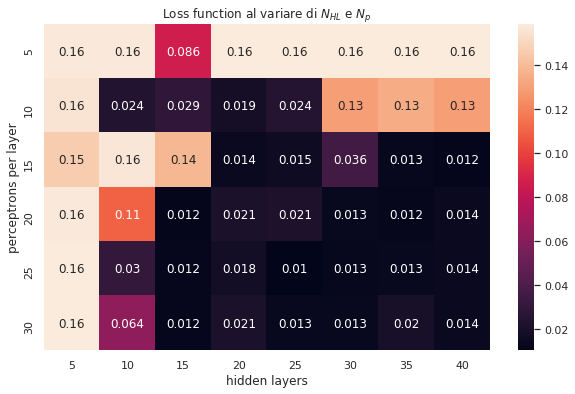

In [133]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(layers_neurons.T, annot=True,xticklabels=layers*5, yticklabels=neurons*5)
ax.set_title("Loss function al variare di $N_{HL}$ e $N_p$")
ax.set_xlabel("hidden layers")
ax.set_ylabel("perceptrons per layer")
plt.show()

Dalla tabella emerge come in reti di almeno 20 layers da almeno 15 percettroni il valore di loss function raggiunge un valore minimo pressocché costante intorno a 0.015. Sono quindi fissati $N_{HL}=20$ e $N_p=15$ e, con tali parametri, viene 'addestrata' la rete neurale

In [134]:
model = tf.keras.Sequential()

for k in range(20):
    model.add(Dense(15, activation='elu'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [135]:
history = model.fit(X_tr.T, z_train, batch_size=30, epochs=90, shuffle=True, validation_data=(X_va.T, z_valid))

Epoch 1/90
167/167 [==============================] - 0s 3ms/step - loss: 0.3121 - mse: 0.3121 - val_loss: 0.1958 - val_mse: 0.1958
Epoch 2/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1685 - mse: 0.1685 - val_loss: 0.1624 - val_mse: 0.1624
Epoch 3/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1553 - mse: 0.1553 - val_loss: 0.1588 - val_mse: 0.1588
Epoch 4/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1536 - mse: 0.1536 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 5/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 6/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 7/90
167/167 [==============================] - 0s 2ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 8/90
167/167 [==============================] - 0s 2ms/step - loss: 0.

167/167 [==============================] - 0s 1ms/step - loss: 0.1242 - mse: 0.1242 - val_loss: 0.1183 - val_mse: 0.1183
Epoch 63/90
167/167 [==============================] - 0s 1ms/step - loss: 0.1084 - mse: 0.1084 - val_loss: 0.0977 - val_mse: 0.0977
Epoch 64/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0844 - mse: 0.0844 - val_loss: 0.0804 - val_mse: 0.0804
Epoch 65/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0691 - mse: 0.0691 - val_loss: 0.0766 - val_mse: 0.0766
Epoch 66/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0623 - mse: 0.0623 - val_loss: 0.0641 - val_mse: 0.0641
Epoch 67/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0584 - mse: 0.0584 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 68/90
167/167 [==============================] - 0s 2ms/step - loss: 0.0562 - mse: 0.0562 - val_loss: 0.0585 - val_mse: 0.0585
Epoch 69/90
167/167 [==============================] - 0s 1ms/step - loss: 0.0538

In [136]:
score = model.evaluate(X_va.T, z_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 1ms/step - loss: 0.0156 - mse: 0.0156

Test loss: 0.015610587783157825
Test accuracy: 0.015610587783157825


Di seguito è infine mostrato lo scatterplot dei valori teorici ($sin(x^2 +y^2)$) e dei valori predetti dalla rete neurale per 5000 coppie $x$ e $y$ distribuite random nel range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$:

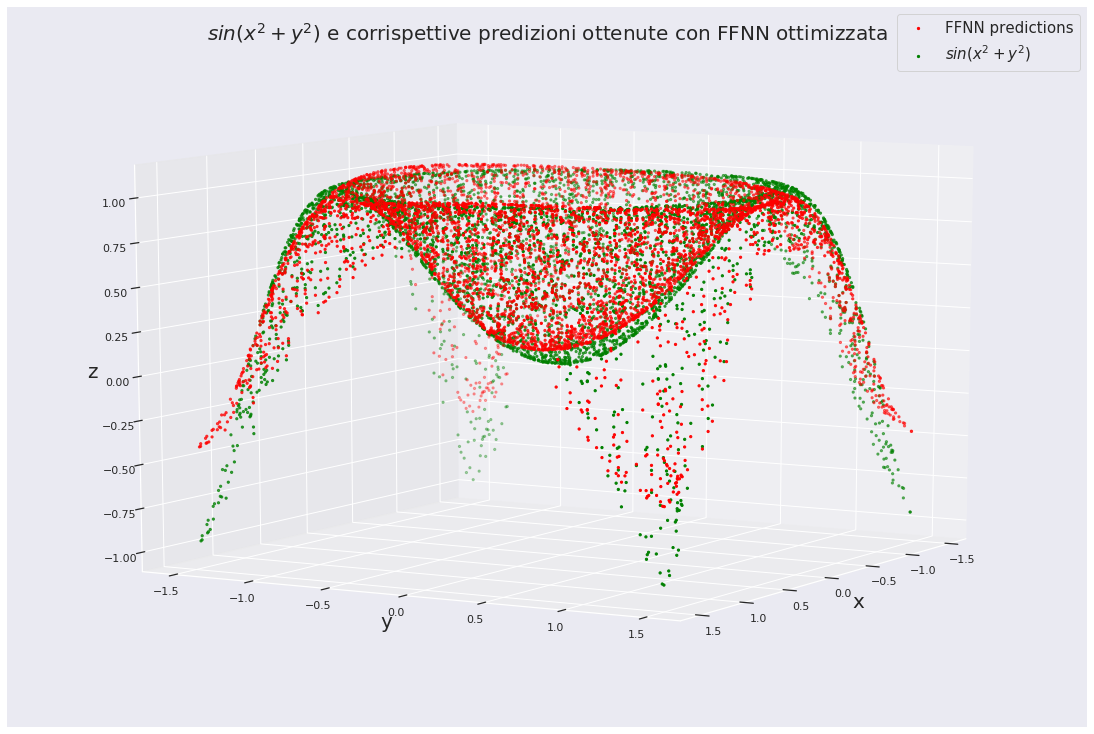

In [146]:
x_out = np.random.rand(5000)*3-1.5
y_out = np.random.rand(5000)*3-1.5
X_out = np.array([x_out, y_out])
z_out = model.predict(X_out.T)
z_target = np.sin(x_out**2 + y_out**2)


fig = plt.figure(figsize=(15,10))
fig.suptitle('$sin(x^2 +y^2)$ e corrispettive predizioni ottenute con FFNN ottimizzata', fontsize=20)
ax = Axes3D(fig)
ax.scatter(x_out, y_out, z_out[:,0], c='red', marker='.', label='FFNN predictions')
ax.scatter(x_out, y_out, z_target, c='green', marker='.', label='$sin(x^2 +y^2)$')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
ax.view_init(10, 30)
ax.legend(fontsize=15)
plt.show()